<a href="https://colab.research.google.com/github/ngolla/video-captioning/blob/master/preprocessing_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load data from link
# !wget http://www.cs.utexas.edu/users/ml/clamp/videoDescription/YouTubeClips.tar

In [ ]:
!pip install scikit-video
#video =skvideo.io.vread('YouTubeClips/-_aaMGK6GGw_57_61.avi')

     |████████████████████████████████| 2.3MB 2.7MB/s 


In [1]:
import math
import cv2
from pathlib import Path
from google.colab import drive
import numpy as np
#import skvideo.io 
import shutil
#from google.colab.patches import cv2_imshow
#list(pdir.glob('**/*.avi'))
from tqdm import tqdm
import os
import pandas as pd


In [3]:

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

ls: cannot access '/content/drive/My Drive': No such file or directory


In [5]:
drive_path=Path("/content/drive/My Drive")

In [8]:
list(drive_path.glob('*'))
vid_dim_path=drive_path.joinpath('VideoArrays-T')
#vid_dim_path.mkdir()

In [9]:
len(list(vid_dim_path.glob('*')))

1970

In [ ]:
filei=vid_dim_path.joinpath('ri5AyXzxb4o_201_215.npy')
numparray=np.load(str())
numparray.shape

Extract videos from the tar file

In [10]:
def tar_to_dir():
  !tar xf "/content/drive/My Drive/YouTubeClips.tar"

In [11]:
pdir=Path('YouTubeClips/')
if pdir.is_dir() and len(list(pdir.glob('*'))) >0 :
  vlen=len(list(pdir.glob('*')))
  print(str(pdir) + ' has all the video files ' + str(vlen))
else:
  tar_to_dir()
  print('Youtube video files created ', len(list(pdir.glob('*'))))

Youtube video files created  1970


In [12]:
#This is to count number of videos in the directory #https://devconnected.com/how-to-count-files-in-directory-on-linux/ reference
#!ls YouTubeClips/ | wc -l

#import os
#video_ids=list(os.listdir(path='YouTubeClips/'))
#print(len(video_ids))

len(list(pdir.glob('*')))

1970

In [ ]:
print('A video of videoID -_hbPLsZvvo* has ',len(list(pdir.glob('**/-_hbPLsZvvo*.avi'))),' chunks')
list(pdir.glob('**/-_hbPLsZvvo*.avi'))

A video of videoID -_hbPLsZvvo* has  11  chunks


[PosixPath('YouTubeClips/-_hbPLsZvvo_269_275.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_19_26.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_172_179.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_43_55.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_18_25.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_49_55.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_323_328.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_5_8.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_19_25.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_288_305.avi'),
 PosixPath('YouTubeClips/-_hbPLsZvvo_211_219.avi')]

In [13]:
#Path('frames').mkdir()
frame_dir=Path('frames')
len(list(frame_dir.glob('*')))
#frame_dir.rmdir()

0

#Remove frames directory, since numpy arrays are generated, frames are not necessary

In [14]:
from keras.applications.vgg16 import VGG16
from keras.models import Model 
import time
#Defining few variables
img_dim=224 # image height and width 224 by 224
channels=3 # three channesl RGB
batch_size=128 # batch normalization
frames_step=80 # select 80 frames

#load image adjust to the dimensions mentioned
def load_image(path):
    img = cv2.imread(str(path))
    img = cv2.resize(img,(img_dim,img_dim))
    return img

#Transfer learning  using vgg16
def model_cnn_load():
    model = VGG16(weights = "imagenet", include_top=True,input_shape = (img_dim,img_dim,channels))
    out = model.layers[-2].output
    model_final = Model(inputs=model.input,outputs=out)
    return model_final

In [15]:
##It is saving the last frame every second. 
#If frame rate is 30 fps and x = 30 (it is the 30th frame), 
#it saves the image, one second later after another 30 frames, 
#it will once again save the frame. If it were not conditional, 
#it would try to write as many files per second 
#as the stream's fps which generally would clog the pipeline and hurt throughput.
def extract_frames(video_path, v_dir):
    cap = cv2.VideoCapture(video_path)
    frameRate = cap.get(5) #frame rate
    print('frameRate ',frameRate)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        #print('frameId ',frameId)
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
          frame_path=v_dir.joinpath(str(int(frameId))+'.jpg')
          #frame_path.touch()
          cv2.imwrite(str(frame_path), frame)
    cap.release()
    cv2.destroyAllWindows()

In [16]:
def remove_dir(frame_dir):
  shutil.rmtree(frame_dir, ignore_errors=True)

In [20]:
#video_path=Path('/content/drive/My Drive/VideoArrays-T')
#len(list(video_path.glob('*')))
#import os
#list_files=sorted(video_path.iterdir(), key=lambda t: t.stat().st_mtime)[:834]
#names=[x.stem for x in list_files]

1970

In [ ]:
start_pc=time.perf_counter()
start_pt=time.process_time()

In [25]:
processed_files=[x.stem for x in vid_dim_path.glob('*')]
all_files=[x.stem for x in pdir.glob('*')]
unprocess_files=[item for item in all_files if item not in processed_files]

In [26]:
print(len(processed_files))
print(len(all_files))
print(len(unprocess_files))
#print(len(corpusVideoIds))

1970
1970
834


In [29]:
model=model_cnn_load()
def convert_vid_to_numpy(process_file):
  print('Processing video: '+str(item)+" - "+str(item.name) + " - "+ str(item.stem))
  videoName=item.stem
  v_dir=frame_dir.joinpath(item.stem)
  v_dir.mkdir(parents=True)
  extract_frames(str(item), v_dir)
  image_list=sorted(v_dir.glob('*.jpg')) #list of sorted key frames
  samples = np.round(np.linspace(0, len(image_list) - 1, frames_step)) #evenly spaced numbers
  image_list = [image_list[int(sample)] for sample in samples] #each sample of linspace
  images = np.zeros((len(image_list), img_dim, img_dim, channels)) # empty image array
  for i in range(len(image_list)):
    img = load_image(image_list[i]) # load immage
    images[i] = img  #save images as list
  images = np.array(images)#convert to array of images
  fc_feats = model.predict(images,batch_size) # predict dense features from model
  img_feats = np.array(fc_feats) # save feature as array
  outfile = vid_dim_path.joinpath(item.stem+'.npy')
  np.save(str(outfile), img_feats) #save as file
  remove_dir(v_dir) # remove video directory as we got numpy 


In [30]:
process_count=0
for item in tqdm(pdir.glob('**/*.avi')):
  if(item.stem in unprocess_files):
    convert_vid_to_numpy(item)
    process_count=process_count+1
#shutil.rmtree(frame_dir, ignore_errors=True)
print('Total number of videos processed '+str(process_count))

0it [00:00, ?it/s]

Processing video: YouTubeClips/vDhEpqfhVI0_0_8.avi - vDhEpqfhVI0_0_8.avi - vDhEpqfhVI0_0_8
frameRate  30.0


1it [00:42, 42.17s/it]

Processing video: YouTubeClips/39Ce7I6nXIw_96_104.avi - 39Ce7I6nXIw_96_104.avi - 39Ce7I6nXIw_96_104
frameRate  29.97002997002997


2it [01:23, 41.81s/it]

Processing video: YouTubeClips/9HDUADeA2xg_3_31.avi - 9HDUADeA2xg_3_31.avi - 9HDUADeA2xg_3_31
frameRate  29.916666666666668


6it [02:04, 32.38s/it]

Processing video: YouTubeClips/AGRFy5hDQiY_31_38.avi - AGRFy5hDQiY_31_38.avi - AGRFy5hDQiY_31_38
frameRate  30.0


7it [02:45, 34.80s/it]

Processing video: YouTubeClips/2xpIT0L4GqE_1_10.avi - 2xpIT0L4GqE_1_10.avi - 2xpIT0L4GqE_1_10
frameRate  30.0


9it [03:25, 30.45s/it]

Processing video: YouTubeClips/-8y1Q0rA3n8_95_102.avi - -8y1Q0rA3n8_95_102.avi - -8y1Q0rA3n8_95_102
frameRate  29.97002997002997


14it [04:08, 23.86s/it]

Processing video: YouTubeClips/W_iR4YVCxUY_8_15.avi - W_iR4YVCxUY_8_15.avi - W_iR4YVCxUY_8_15
frameRate  29.97002997002997


15it [04:49, 29.04s/it]

Processing video: YouTubeClips/KeSQ5Rv7eH8_73_79.avi - KeSQ5Rv7eH8_73_79.avi - KeSQ5Rv7eH8_73_79
frameRate  29.97002997002997


16it [05:29, 32.53s/it]

Processing video: YouTubeClips/6FmN22YcVVE_11_18.avi - 6FmN22YcVVE_11_18.avi - 6FmN22YcVVE_11_18
frameRate  30.0


18it [06:10, 28.87s/it]

Processing video: YouTubeClips/pRpeEdMmmQ0_1_18.avi - pRpeEdMmmQ0_1_18.avi - pRpeEdMmmQ0_1_18
frameRate  24.0


19it [06:58, 34.64s/it]

Processing video: YouTubeClips/JntMAcTlOF0_50_70.avi - JntMAcTlOF0_50_70.avi - JntMAcTlOF0_50_70
frameRate  25.0


20it [07:39, 36.65s/it]

Processing video: YouTubeClips/rQuNYxNmA6M_0_4.avi - rQuNYxNmA6M_0_4.avi - rQuNYxNmA6M_0_4
frameRate  29.97002997002997


23it [08:21, 29.83s/it]

Processing video: YouTubeClips/v7NpKUVqjpI_23_40.avi - v7NpKUVqjpI_23_40.avi - v7NpKUVqjpI_23_40
frameRate  30.0


26it [09:03, 25.05s/it]

Processing video: YouTubeClips/RMznbCn5sQs_0_10.avi - RMznbCn5sQs_0_10.avi - RMznbCn5sQs_0_10
frameRate  13.916666666666666


33it [09:44, 19.30s/it]

Processing video: YouTubeClips/Ffv7fhL1EDY_177_184.avi - Ffv7fhL1EDY_177_184.avi - Ffv7fhL1EDY_177_184
frameRate  23.976023976023978


36it [10:25, 17.57s/it]

Processing video: YouTubeClips/Sq7Vt6KC9Yg_17_35.avi - Sq7Vt6KC9Yg_17_35.avi - Sq7Vt6KC9Yg_17_35
frameRate  29.917


40it [11:09, 15.60s/it]

Processing video: YouTubeClips/hxZ-5wELSJM_0_12.avi - hxZ-5wELSJM_0_12.avi - hxZ-5wELSJM_0_12
frameRate  25.0


42it [11:49, 17.00s/it]

Processing video: YouTubeClips/oBt257I-pL0_0_10.avi - oBt257I-pL0_0_10.avi - oBt257I-pL0_0_10
frameRate  30.0


44it [12:29, 17.95s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_94_98.avi - WTf5EgVY5uU_94_98.avi - WTf5EgVY5uU_94_98
frameRate  29.916666666666668


47it [13:10, 16.60s/it]

Processing video: YouTubeClips/ItFqogTmAvQ_389_395.avi - ItFqogTmAvQ_389_395.avi - ItFqogTmAvQ_389_395
frameRate  25.0


48it [13:50, 23.76s/it]

Processing video: YouTubeClips/5zkCnHUnoYY_69_74.avi - 5zkCnHUnoYY_69_74.avi - 5zkCnHUnoYY_69_74
frameRate  23.976023976023978


49it [14:31, 28.69s/it]

Processing video: YouTubeClips/NaX51emUDn4_0_20.avi - NaX51emUDn4_0_20.avi - NaX51emUDn4_0_20
frameRate  30.0


52it [15:12, 24.19s/it]

Processing video: YouTubeClips/8e0yXMa708Y_24_33.avi - 8e0yXMa708Y_24_33.avi - 8e0yXMa708Y_24_33
frameRate  25.0


53it [15:52, 29.18s/it]

Processing video: YouTubeClips/zxB4dFJhHR8_1_9.avi - zxB4dFJhHR8_1_9.avi - zxB4dFJhHR8_1_9
frameRate  25.0


56it [16:33, 24.48s/it]

Processing video: YouTubeClips/kWLNZzuo3do_167_181.avi - kWLNZzuo3do_167_181.avi - kWLNZzuo3do_167_181
frameRate  59.916666666666664


57it [17:15, 29.64s/it]

Processing video: YouTubeClips/MWzeInQaUk4_12_20.avi - MWzeInQaUk4_12_20.avi - MWzeInQaUk4_12_20
frameRate  29.97002997002997


58it [17:56, 33.17s/it]

Processing video: YouTubeClips/m1NR0uNNs5Y_73_78.avi - m1NR0uNNs5Y_73_78.avi - m1NR0uNNs5Y_73_78
frameRate  30.0


59it [18:37, 35.55s/it]

Processing video: YouTubeClips/yYA7YXIKbg4_9_14.avi - yYA7YXIKbg4_9_14.avi - yYA7YXIKbg4_9_14
frameRate  29.916666666666668


61it [19:18, 30.97s/it]

Processing video: YouTubeClips/30GeJHYoerk_80_85.avi - 30GeJHYoerk_80_85.avi - 30GeJHYoerk_80_85
frameRate  25.0


63it [19:58, 27.74s/it]

Processing video: YouTubeClips/Je3V7U5Ctj4_956_961.avi - Je3V7U5Ctj4_956_961.avi - Je3V7U5Ctj4_956_961
frameRate  29.969


68it [20:40, 21.96s/it]

Processing video: YouTubeClips/g2IYQq7IkXc_124_132.avi - g2IYQq7IkXc_124_132.avi - g2IYQq7IkXc_124_132
frameRate  30.0


71it [21:21, 19.44s/it]

Processing video: YouTubeClips/sv5YlZspb30_10_20.avi - sv5YlZspb30_10_20.avi - sv5YlZspb30_10_20
frameRate  29.97002997002997


75it [22:03, 16.72s/it]

Processing video: YouTubeClips/ht2oIYBSoI0_9_21.avi - ht2oIYBSoI0_9_21.avi - ht2oIYBSoI0_9_21
frameRate  25.0


79it [22:44, 14.80s/it]

Processing video: YouTubeClips/jdAbpLooDgM_10_15.avi - jdAbpLooDgM_10_15.avi - jdAbpLooDgM_10_15
frameRate  29.916666666666668


80it [23:25, 22.65s/it]

Processing video: YouTubeClips/Sj6GSmDpNDw_0_12.avi - Sj6GSmDpNDw_0_12.avi - Sj6GSmDpNDw_0_12
frameRate  25.0


81it [24:06, 28.22s/it]

Processing video: YouTubeClips/W8_63NiTENw_23_30.avi - W8_63NiTENw_23_30.avi - W8_63NiTENw_23_30
frameRate  29.97002997002997


83it [24:47, 25.86s/it]

Processing video: YouTubeClips/8MVo7fje_oE_125_130.avi - 8MVo7fje_oE_125_130.avi - 8MVo7fje_oE_125_130
frameRate  29.97002997002997


88it [25:28, 20.55s/it]

Processing video: YouTubeClips/Hd-NeIhbYGc_28_31.avi - Hd-NeIhbYGc_28_31.avi - Hd-NeIhbYGc_28_31
frameRate  29.97002997002997


91it [26:09, 18.56s/it]

Processing video: YouTubeClips/81fABEiwcIM_31_45.avi - 81fABEiwcIM_31_45.avi - 81fABEiwcIM_31_45
frameRate  25.0


93it [26:50, 19.09s/it]

Processing video: YouTubeClips/4R-tumAGrtU_12_22.avi - 4R-tumAGrtU_12_22.avi - 4R-tumAGrtU_12_22
frameRate  29.97002997002997


98it [27:31, 15.84s/it]

Processing video: YouTubeClips/T6lPRKRpu9w_32_39.avi - T6lPRKRpu9w_32_39.avi - T6lPRKRpu9w_32_39
frameRate  23.975


100it [28:12, 17.21s/it]

Processing video: YouTubeClips/kWLNZzuo3do_152_164.avi - kWLNZzuo3do_152_164.avi - kWLNZzuo3do_152_164
frameRate  59.916666666666664


101it [28:54, 24.56s/it]

Processing video: YouTubeClips/SRzoLVNgHoI_56_66.avi - SRzoLVNgHoI_56_66.avi - SRzoLVNgHoI_56_66
frameRate  29.97002997002997


104it [29:35, 21.31s/it]

Processing video: YouTubeClips/GWQTAe64m-0_160_166.avi - GWQTAe64m-0_160_166.avi - GWQTAe64m-0_160_166
frameRate  29.97002997002997


105it [30:15, 27.00s/it]

Processing video: YouTubeClips/x_7BrCQdVUs_172_177.avi - x_7BrCQdVUs_172_177.avi - x_7BrCQdVUs_172_177
frameRate  30.0


106it [30:56, 31.16s/it]

Processing video: YouTubeClips/-Cv5LsqKUXc_71_76.avi - -Cv5LsqKUXc_71_76.avi - -Cv5LsqKUXc_71_76
frameRate  59.916666666666664


110it [31:37, 24.89s/it]

Processing video: YouTubeClips/qIk_Dz5XE5E_104_109.avi - qIk_Dz5XE5E_104_109.avi - qIk_Dz5XE5E_104_109
frameRate  29.97002997002997


112it [32:18, 23.56s/it]

Processing video: YouTubeClips/nBFhvrAOFqY_89_103.avi - nBFhvrAOFqY_89_103.avi - nBFhvrAOFqY_89_103
frameRate  29.97002997002997


114it [32:59, 22.63s/it]

Processing video: YouTubeClips/Qjbcibrv3L0_26_32.avi - Qjbcibrv3L0_26_32.avi - Qjbcibrv3L0_26_32
frameRate  59.916666666666664


115it [33:40, 28.17s/it]

Processing video: YouTubeClips/JAFGw0WRHHU_108_116.avi - JAFGw0WRHHU_108_116.avi - JAFGw0WRHHU_108_116
frameRate  30.0


117it [34:21, 25.87s/it]

Processing video: YouTubeClips/HAjwXjwN9-A_16_24.avi - HAjwXjwN9-A_16_24.avi - HAjwXjwN9-A_16_24
frameRate  29.97002997002997


118it [35:02, 30.22s/it]

Processing video: YouTubeClips/x8Ul09tk6zk_0_8.avi - x8Ul09tk6zk_0_8.avi - x8Ul09tk6zk_0_8
frameRate  29.97002997002997


120it [35:43, 27.32s/it]

Processing video: YouTubeClips/tZmDWltBziM_42_47.avi - tZmDWltBziM_42_47.avi - tZmDWltBziM_42_47
frameRate  30.0


127it [36:23, 20.85s/it]

Processing video: YouTubeClips/fjDvKHkmxs0_119_126.avi - fjDvKHkmxs0_119_126.avi - fjDvKHkmxs0_119_126
frameRate  29.97002997002997


129it [37:04, 20.68s/it]

Processing video: YouTubeClips/toE0QYZzJKE_1_8.avi - toE0QYZzJKE_1_8.avi - toE0QYZzJKE_1_8
frameRate  29.97002997002997


130it [37:45, 26.94s/it]

Processing video: YouTubeClips/g36ho6UrBz0_5_20.avi - g36ho6UrBz0_5_20.avi - g36ho6UrBz0_5_20
frameRate  24.0


132it [38:29, 25.37s/it]

Processing video: YouTubeClips/po2tcrG6KzM_2_8.avi - po2tcrG6KzM_2_8.avi - po2tcrG6KzM_2_8
frameRate  29.916666666666668


134it [39:10, 23.91s/it]

Processing video: YouTubeClips/YXixZrSxefk_49_59.avi - YXixZrSxefk_49_59.avi - YXixZrSxefk_49_59
frameRate  29.97002997002997


137it [39:51, 20.87s/it]

Processing video: YouTubeClips/MWvCcwTw7Ac_78_86.avi - MWvCcwTw7Ac_78_86.avi - MWvCcwTw7Ac_78_86
frameRate  25.0


140it [40:31, 18.65s/it]

Processing video: YouTubeClips/cCmnN96zIeQ_14_24.avi - cCmnN96zIeQ_14_24.avi - cCmnN96zIeQ_14_24
frameRate  14.985014985014985


144it [41:12, 16.08s/it]

Processing video: YouTubeClips/IpHJffM3G1c_412_418.avi - IpHJffM3G1c_412_418.avi - IpHJffM3G1c_412_418
frameRate  29.968


147it [41:54, 15.47s/it]

Processing video: YouTubeClips/NVGGgncVq-4_111_117.avi - NVGGgncVq-4_111_117.avi - NVGGgncVq-4_111_117
frameRate  25.0


148it [42:38, 24.03s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_124_128.avi - WTf5EgVY5uU_124_128.avi - WTf5EgVY5uU_124_128
frameRate  29.916666666666668


150it [43:18, 22.86s/it]

Processing video: YouTubeClips/Xh6rdpJNaf0_0_15.avi - Xh6rdpJNaf0_0_15.avi - Xh6rdpJNaf0_0_15
frameRate  14.932


155it [43:59, 18.43s/it]

Processing video: YouTubeClips/kBjUDCyDCuI_20_26.avi - kBjUDCyDCuI_20_26.avi - kBjUDCyDCuI_20_26
frameRate  29.97002997002997


156it [44:39, 25.07s/it]

Processing video: YouTubeClips/nZSFn51l3hc_480_485.avi - nZSFn51l3hc_480_485.avi - nZSFn51l3hc_480_485
frameRate  29.97002997002997


159it [45:21, 21.77s/it]

Processing video: YouTubeClips/88p7U5CnoYU_1_10.avi - 88p7U5CnoYU_1_10.avi - 88p7U5CnoYU_1_10
frameRate  59.916666666666664


165it [46:02, 17.28s/it]

Processing video: YouTubeClips/3eqFFRSXwGE_84_96.avi - 3eqFFRSXwGE_84_96.avi - 3eqFFRSXwGE_84_96
frameRate  15.0


166it [46:42, 24.19s/it]

Processing video: YouTubeClips/NNYLo1OeZ-Q_48_54.avi - NNYLo1OeZ-Q_48_54.avi - NNYLo1OeZ-Q_48_54
frameRate  23.976023976023978


167it [47:23, 29.14s/it]

Processing video: YouTubeClips/pGCRurvXQGM_45_56.avi - pGCRurvXQGM_45_56.avi - pGCRurvXQGM_45_56
frameRate  29.97002997002997


170it [48:04, 24.53s/it]

Processing video: YouTubeClips/qeKX-N1nKiM_123_130.avi - qeKX-N1nKiM_123_130.avi - qeKX-N1nKiM_123_130
frameRate  29.97002997002997


172it [48:45, 23.25s/it]

Processing video: YouTubeClips/YmXCfQm0_CA_68_75.avi - YmXCfQm0_CA_68_75.avi - YmXCfQm0_CA_68_75
frameRate  59.916666666666664


173it [49:27, 28.84s/it]

Processing video: YouTubeClips/6sKdTbRkahM_6_12.avi - 6sKdTbRkahM_6_12.avi - 6sKdTbRkahM_6_12
frameRate  25.0


174it [50:08, 32.45s/it]

Processing video: YouTubeClips/xkNDE1JL6Z8_50_59.avi - xkNDE1JL6Z8_50_59.avi - xkNDE1JL6Z8_50_59
frameRate  29.97002997002997


178it [50:49, 25.79s/it]

Processing video: YouTubeClips/Yh2N6ZtRBdU_110_120.avi - Yh2N6ZtRBdU_110_120.avi - Yh2N6ZtRBdU_110_120
frameRate  30.0


180it [51:29, 24.14s/it]

Processing video: YouTubeClips/zWVQImPY2Cc_27_44.avi - zWVQImPY2Cc_27_44.avi - zWVQImPY2Cc_27_44
frameRate  29.97002997002997


181it [52:11, 29.34s/it]

Processing video: YouTubeClips/47D9-U8hn5I_11_16.avi - 47D9-U8hn5I_11_16.avi - 47D9-U8hn5I_11_16
frameRate  30.0


185it [52:53, 23.71s/it]

Processing video: YouTubeClips/tn-Hoz4KbkE_89_93.avi - tn-Hoz4KbkE_89_93.avi - tn-Hoz4KbkE_89_93
frameRate  29.97002997002997


187it [53:34, 22.65s/it]

Processing video: YouTubeClips/E61HNXjgyqA_22_32.avi - E61HNXjgyqA_22_32.avi - E61HNXjgyqA_22_32
frameRate  29.97002997002997


188it [54:14, 28.06s/it]

Processing video: YouTubeClips/hSgGBHbJrmE_0_17.avi - hSgGBHbJrmE_0_17.avi - hSgGBHbJrmE_0_17
frameRate  29.97002997002997


189it [54:55, 31.90s/it]

Processing video: YouTubeClips/D2FbgK_kkE8_121_151.avi - D2FbgK_kkE8_121_151.avi - D2FbgK_kkE8_121_151
frameRate  59.916666666666664


190it [55:36, 34.69s/it]

Processing video: YouTubeClips/hJFBXHtxKIc_163_168.avi - hJFBXHtxKIc_163_168.avi - hJFBXHtxKIc_163_168
frameRate  29.97002997002997


202it [56:17, 25.31s/it]

Processing video: YouTubeClips/qvg9eM4Hmzk_4_10.avi - qvg9eM4Hmzk_4_10.avi - qvg9eM4Hmzk_4_10
frameRate  15.0


204it [56:58, 23.79s/it]

Processing video: YouTubeClips/eZLxohGP4IE_190_201.avi - eZLxohGP4IE_190_201.avi - eZLxohGP4IE_190_201
frameRate  29.97002997002997


205it [57:41, 29.54s/it]

Processing video: YouTubeClips/o4pL7FObqds_137_147.avi - o4pL7FObqds_137_147.avi - o4pL7FObqds_137_147
frameRate  30.0


208it [58:21, 24.71s/it]

Processing video: YouTubeClips/6ZhKOK08tgM_45_49.avi - 6ZhKOK08tgM_45_49.avi - 6ZhKOK08tgM_45_49
frameRate  29.97002997002997


211it [59:02, 21.36s/it]

Processing video: YouTubeClips/kWLNZzuo3do_206_213.avi - kWLNZzuo3do_206_213.avi - kWLNZzuo3do_206_213
frameRate  59.916666666666664


214it [59:43, 19.06s/it]

Processing video: YouTubeClips/O_NWtDShLeg_21_25.avi - O_NWtDShLeg_21_25.avi - O_NWtDShLeg_21_25
frameRate  29.97002997002997


215it [1:00:23, 25.44s/it]

Processing video: YouTubeClips/CBD9h0jUq3w_1_7.avi - CBD9h0jUq3w_1_7.avi - CBD9h0jUq3w_1_7
frameRate  25.0


219it [1:01:04, 20.86s/it]

Processing video: YouTubeClips/hW8TKz2Aea4_5_12.avi - hW8TKz2Aea4_5_12.avi - hW8TKz2Aea4_5_12
frameRate  14.985014985014985


220it [1:01:44, 26.73s/it]

Processing video: YouTubeClips/AjZ-R3LFMzo_24_38.avi - AjZ-R3LFMzo_24_38.avi - AjZ-R3LFMzo_24_38
frameRate  25.0


222it [1:02:25, 24.81s/it]

Processing video: YouTubeClips/iEW-EkPQywU_61_83.avi - iEW-EkPQywU_61_83.avi - iEW-EkPQywU_61_83
frameRate  29.97002997002997


224it [1:03:05, 23.44s/it]

Processing video: YouTubeClips/0lh_UWF9ZP4_174_178.avi - 0lh_UWF9ZP4_174_178.avi - 0lh_UWF9ZP4_174_178
frameRate  29.916666666666668


230it [1:03:46, 18.43s/it]

Processing video: YouTubeClips/2YhDTpzxd3c_115_120.avi - 2YhDTpzxd3c_115_120.avi - 2YhDTpzxd3c_115_120
frameRate  29.97002997002997


231it [1:04:26, 25.02s/it]

Processing video: YouTubeClips/hksxtbcS780_7_14.avi - hksxtbcS780_7_14.avi - hksxtbcS780_7_14
frameRate  25.0


234it [1:05:07, 21.57s/it]

Processing video: YouTubeClips/VyBXcQ1v_cw_7_15.avi - VyBXcQ1v_cw_7_15.avi - VyBXcQ1v_cw_7_15
frameRate  7.5


235it [1:05:47, 27.12s/it]

Processing video: YouTubeClips/1mIyMRPV8kg_9_17.avi - 1mIyMRPV8kg_9_17.avi - 1mIyMRPV8kg_9_17
frameRate  15.0


236it [1:06:27, 31.09s/it]

Processing video: YouTubeClips/qzQzooI4BqU_5_15.avi - qzQzooI4BqU_5_15.avi - qzQzooI4BqU_5_15
frameRate  25.0


238it [1:07:08, 27.91s/it]

Processing video: YouTubeClips/lsanQj2yacs_102_108.avi - lsanQj2yacs_102_108.avi - lsanQj2yacs_102_108
frameRate  29.97002997002997


239it [1:07:50, 32.21s/it]

Processing video: YouTubeClips/DlOhXqKcLXk_7_14.avi - DlOhXqKcLXk_7_14.avi - DlOhXqKcLXk_7_14
frameRate  29.97002997002997


240it [1:08:33, 35.31s/it]

Processing video: YouTubeClips/QqYWLR47eLI_10_18.avi - QqYWLR47eLI_10_18.avi - QqYWLR47eLI_10_18
frameRate  29.97002997002997


249it [1:09:13, 26.07s/it]

Processing video: YouTubeClips/EiylMb_mWk4_2_20.avi - EiylMb_mWk4_2_20.avi - EiylMb_mWk4_2_20
frameRate  15.0


250it [1:09:54, 30.47s/it]

Processing video: YouTubeClips/8BL9qmFRbd4_6_13.avi - 8BL9qmFRbd4_6_13.avi - 8BL9qmFRbd4_6_13
frameRate  25.0


252it [1:10:35, 27.40s/it]

Processing video: YouTubeClips/tYh4iDFgmEE_10_14.avi - tYh4iDFgmEE_10_14.avi - tYh4iDFgmEE_10_14
frameRate  29.97002997002997


253it [1:11:15, 31.30s/it]

Processing video: YouTubeClips/77iDIp40m9E_119_123.avi - 77iDIp40m9E_119_123.avi - 77iDIp40m9E_119_123
frameRate  25.0


257it [1:11:56, 24.98s/it]

Processing video: YouTubeClips/OBLIjdMIIt8_54_61.avi - OBLIjdMIIt8_54_61.avi - OBLIjdMIIt8_54_61
frameRate  30.0


259it [1:12:38, 23.86s/it]

Processing video: YouTubeClips/CwPfvoqmV1Q_58_61.avi - CwPfvoqmV1Q_58_61.avi - CwPfvoqmV1Q_58_61
frameRate  25.0


261it [1:13:19, 22.73s/it]

Processing video: YouTubeClips/G6w6kO8UPyg_31_41.avi - G6w6kO8UPyg_31_41.avi - G6w6kO8UPyg_31_41
frameRate  14.985014985014985


263it [1:13:59, 21.97s/it]

Processing video: YouTubeClips/n_Z0-giaspE_62_78.avi - n_Z0-giaspE_62_78.avi - n_Z0-giaspE_62_78
frameRate  15.0


264it [1:14:39, 27.48s/it]

Processing video: YouTubeClips/LQ-jv8g1YVI_1_6.avi - LQ-jv8g1YVI_1_6.avi - LQ-jv8g1YVI_1_6
frameRate  25.0


266it [1:15:20, 25.35s/it]

Processing video: YouTubeClips/zTn-nNj5Bng_8_19.avi - zTn-nNj5Bng_8_19.avi - zTn-nNj5Bng_8_19
frameRate  25.0


267it [1:16:01, 30.09s/it]

Processing video: YouTubeClips/g9aZcaEg7iY_0_9.avi - g9aZcaEg7iY_0_9.avi - g9aZcaEg7iY_0_9
frameRate  15.0


270it [1:16:42, 25.09s/it]

Processing video: YouTubeClips/fX5G_JwPlLo_640_660.avi - fX5G_JwPlLo_640_660.avi - fX5G_JwPlLo_640_660
frameRate  29.97002997002997


272it [1:17:22, 23.71s/it]

Processing video: YouTubeClips/77iDIp40m9E_126_131.avi - 77iDIp40m9E_126_131.avi - 77iDIp40m9E_126_131
frameRate  25.0


274it [1:18:03, 22.69s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_364_370.avi - 0hyZ__3YhZc_364_370.avi - 0hyZ__3YhZc_364_370
frameRate  29.97002997002997


276it [1:18:45, 22.21s/it]

Processing video: YouTubeClips/ysTmUTQ5wZE_17_45.avi - ysTmUTQ5wZE_17_45.avi - ysTmUTQ5wZE_17_45
frameRate  30.0


277it [1:19:27, 28.02s/it]

Processing video: YouTubeClips/hW8TKz2Aea4_40_50.avi - hW8TKz2Aea4_40_50.avi - hW8TKz2Aea4_40_50
frameRate  14.985014985014985


279it [1:20:07, 25.70s/it]

Processing video: YouTubeClips/FA3OfhJK0mI_195_203.avi - FA3OfhJK0mI_195_203.avi - FA3OfhJK0mI_195_203
frameRate  29.97002997002997


282it [1:20:48, 22.03s/it]

Processing video: YouTubeClips/C2rDp6FnbP0_10_17.avi - C2rDp6FnbP0_10_17.avi - C2rDp6FnbP0_10_17
frameRate  29.916666666666668


284it [1:21:29, 21.57s/it]

Processing video: YouTubeClips/IiIiY6o-C9k_59_64.avi - IiIiY6o-C9k_59_64.avi - IiIiY6o-C9k_59_64
frameRate  29.97002997002997


288it [1:22:11, 18.24s/it]

Processing video: YouTubeClips/98Alrg4pFXs_148_153.avi - 98Alrg4pFXs_148_153.avi - 98Alrg4pFXs_148_153
frameRate  29.916666666666668


289it [1:22:52, 25.01s/it]

Processing video: YouTubeClips/fd7Ky1lEPT8_40_50.avi - fd7Ky1lEPT8_40_50.avi - fd7Ky1lEPT8_40_50
frameRate  29.917


290it [1:23:34, 30.25s/it]

Processing video: YouTubeClips/cUW_bXll6YM_390_395.avi - cUW_bXll6YM_390_395.avi - cUW_bXll6YM_390_395
frameRate  29.968


291it [1:24:17, 33.96s/it]

Processing video: YouTubeClips/4D1o4FC8YbA_207_216.avi - 4D1o4FC8YbA_207_216.avi - 4D1o4FC8YbA_207_216
frameRate  59.916666666666664


292it [1:24:57, 35.88s/it]

Processing video: YouTubeClips/rwHT2SuNOi8_240_255.avi - rwHT2SuNOi8_240_255.avi - rwHT2SuNOi8_240_255
frameRate  30.0


293it [1:25:40, 38.15s/it]

Processing video: YouTubeClips/IhwPQL9dFYc_153_170.avi - IhwPQL9dFYc_153_170.avi - IhwPQL9dFYc_153_170
frameRate  29.916666666666668


295it [1:26:22, 32.88s/it]

Processing video: YouTubeClips/_WRC7HXBJpU_386_391.avi - _WRC7HXBJpU_386_391.avi - _WRC7HXBJpU_386_391
frameRate  29.97002997002997


296it [1:27:04, 35.62s/it]

Processing video: YouTubeClips/ZvJvNcukZ4w_0_10.avi - ZvJvNcukZ4w_0_10.avi - ZvJvNcukZ4w_0_10
frameRate  15.0


297it [1:27:44, 37.07s/it]

Processing video: YouTubeClips/_xf24TYgbuY_14_20.avi - _xf24TYgbuY_14_20.avi - _xf24TYgbuY_14_20
frameRate  29.97002997002997


298it [1:28:25, 38.20s/it]

Processing video: YouTubeClips/ifS2nXfCyYo_4_34.avi - ifS2nXfCyYo_4_34.avi - ifS2nXfCyYo_4_34
frameRate  29.97002997002997


300it [1:29:07, 33.07s/it]

Processing video: YouTubeClips/RSx5G0_xH48_12_17.avi - RSx5G0_xH48_12_17.avi - RSx5G0_xH48_12_17
frameRate  30.0


303it [1:29:48, 27.23s/it]

Processing video: YouTubeClips/cSDkshD2ME0_11_14.avi - cSDkshD2ME0_11_14.avi - cSDkshD2ME0_11_14
frameRate  29.97002997002997


306it [1:30:29, 23.12s/it]

Processing video: YouTubeClips/5-8z5U-o4O4_0_3.avi - 5-8z5U-o4O4_0_3.avi - 5-8z5U-o4O4_0_3
frameRate  29.97002997002997


307it [1:31:09, 28.21s/it]

Processing video: YouTubeClips/HPFLN5azwtA_56_63.avi - HPFLN5azwtA_56_63.avi - HPFLN5azwtA_56_63
frameRate  30.0


308it [1:31:49, 31.96s/it]

Processing video: YouTubeClips/RiglOfJon8I_3_18.avi - RiglOfJon8I_3_18.avi - RiglOfJon8I_3_18
frameRate  29.97002997002997


309it [1:32:30, 34.50s/it]

Processing video: YouTubeClips/sRKQfxxEP4M_117_125.avi - sRKQfxxEP4M_117_125.avi - sRKQfxxEP4M_117_125
frameRate  29.97002997002997


311it [1:33:11, 30.30s/it]

Processing video: YouTubeClips/eiyuac7hA4A_4_47.avi - eiyuac7hA4A_4_47.avi - eiyuac7hA4A_4_47
frameRate  30.0


314it [1:33:52, 25.30s/it]

Processing video: YouTubeClips/2YhDTpzxd3c_174_180.avi - 2YhDTpzxd3c_174_180.avi - 2YhDTpzxd3c_174_180
frameRate  29.97002997002997


315it [1:34:32, 29.90s/it]

Processing video: YouTubeClips/Kxa0mnDj0bs_113_124.avi - Kxa0mnDj0bs_113_124.avi - Kxa0mnDj0bs_113_124
frameRate  29.97002997002997


317it [1:35:13, 26.97s/it]

Processing video: YouTubeClips/-DKuLXYoY3g_14_20.avi - -DKuLXYoY3g_14_20.avi - -DKuLXYoY3g_14_20
frameRate  59.916666666666664


318it [1:35:53, 31.06s/it]

Processing video: YouTubeClips/-DRy7rBg0IQ_31_37.avi - -DRy7rBg0IQ_31_37.avi - -DRy7rBg0IQ_31_37
frameRate  30.0


320it [1:36:34, 27.80s/it]

Processing video: YouTubeClips/e-j59PqJjSM_264_277.avi - e-j59PqJjSM_264_277.avi - e-j59PqJjSM_264_277
frameRate  30.0


321it [1:37:14, 31.59s/it]

Processing video: YouTubeClips/lGk1MA6YP-M_36_48.avi - lGk1MA6YP-M_36_48.avi - lGk1MA6YP-M_36_48
frameRate  11.988011988011989


322it [1:37:54, 34.24s/it]

Processing video: YouTubeClips/f9_bP219ehQ_63_70.avi - f9_bP219ehQ_63_70.avi - f9_bP219ehQ_63_70
frameRate  30.0


325it [1:38:39, 28.45s/it]

Processing video: YouTubeClips/-_hbPLsZvvo_19_26.avi - -_hbPLsZvvo_19_26.avi - -_hbPLsZvvo_19_26
frameRate  59.916666666666664


327it [1:39:21, 26.11s/it]

Processing video: YouTubeClips/fVWUaH2mCt4_1_7.avi - fVWUaH2mCt4_1_7.avi - fVWUaH2mCt4_1_7
frameRate  25.0


331it [1:40:01, 21.31s/it]

Processing video: YouTubeClips/ACOmKiJDkA4_47_54.avi - ACOmKiJDkA4_47_54.avi - ACOmKiJDkA4_47_54
frameRate  29.97002997002997


333it [1:40:42, 21.02s/it]

Processing video: YouTubeClips/kWLNZzuo3do_25_32.avi - kWLNZzuo3do_25_32.avi - kWLNZzuo3do_25_32
frameRate  59.916666666666664


334it [1:41:23, 26.97s/it]

Processing video: YouTubeClips/rlQ2kW-FvMk_66_79.avi - rlQ2kW-FvMk_66_79.avi - rlQ2kW-FvMk_66_79
frameRate  29.97002997002997


335it [1:42:04, 31.23s/it]

Processing video: YouTubeClips/Lt1JijkvSKk_0_10.avi - Lt1JijkvSKk_0_10.avi - Lt1JijkvSKk_0_10
frameRate  14.985014985014985


336it [1:42:44, 33.95s/it]

Processing video: YouTubeClips/D1tTBncIsm8_681_688.avi - D1tTBncIsm8_681_688.avi - D1tTBncIsm8_681_688
frameRate  25.0


338it [1:43:29, 30.45s/it]

Processing video: YouTubeClips/LSuVRWPoHr0_0_37.avi - LSuVRWPoHr0_0_37.avi - LSuVRWPoHr0_0_37
frameRate  29.97002997002997


339it [1:44:09, 33.48s/it]

Processing video: YouTubeClips/Xxcv5jvRmcg_39_46.avi - Xxcv5jvRmcg_39_46.avi - Xxcv5jvRmcg_39_46
frameRate  29.97002997002997


340it [1:44:50, 35.60s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_598_603.avi - 0hyZ__3YhZc_598_603.avi - 0hyZ__3YhZc_598_603
frameRate  29.97002997002997


341it [1:45:32, 37.46s/it]

Processing video: YouTubeClips/kquB3rIgfGk_197_202.avi - kquB3rIgfGk_197_202.avi - kquB3rIgfGk_197_202
frameRate  29.97002997002997


344it [1:46:13, 30.42s/it]

Processing video: YouTubeClips/E4k0Aylzdyo_97_104.avi - E4k0Aylzdyo_97_104.avi - E4k0Aylzdyo_97_104
frameRate  24.0


347it [1:46:58, 25.77s/it]

Processing video: YouTubeClips/hFERWnoc-nU_0_12.avi - hFERWnoc-nU_0_12.avi - hFERWnoc-nU_0_12
frameRate  25.0


351it [1:47:39, 21.06s/it]

Processing video: YouTubeClips/p7IAuvd87hQ_12_19.avi - p7IAuvd87hQ_12_19.avi - p7IAuvd87hQ_12_19
frameRate  12.583333333333334


358it [1:48:20, 16.52s/it]

Processing video: YouTubeClips/GnwKcpfr_ng_47_57.avi - GnwKcpfr_ng_47_57.avi - GnwKcpfr_ng_47_57
frameRate  29.916666666666668


359it [1:49:01, 23.94s/it]

Processing video: YouTubeClips/4zPSShqsq-o_3_16.avi - 4zPSShqsq-o_3_16.avi - 4zPSShqsq-o_3_16
frameRate  29.958


361it [1:49:42, 22.89s/it]

Processing video: YouTubeClips/giLxPCgLLqg_9_19.avi - giLxPCgLLqg_9_19.avi - giLxPCgLLqg_9_19
frameRate  25.0


362it [1:50:23, 28.40s/it]

Processing video: YouTubeClips/sJSmRik2c-c_1_7.avi - sJSmRik2c-c_1_7.avi - sJSmRik2c-c_1_7
frameRate  29.97002997002997


363it [1:51:04, 32.01s/it]

Processing video: YouTubeClips/iCiGjZEV7VI_65_75.avi - iCiGjZEV7VI_65_75.avi - iCiGjZEV7VI_65_75
frameRate  25.0


374it [1:51:46, 23.57s/it]

Processing video: YouTubeClips/BOLKaQeB6j0_101_111.avi - BOLKaQeB6j0_101_111.avi - BOLKaQeB6j0_101_111
frameRate  29.97002997002997


376it [1:52:27, 22.61s/it]

Processing video: YouTubeClips/-_hbPLsZvvo_172_179.avi - -_hbPLsZvvo_172_179.avi - -_hbPLsZvvo_172_179
frameRate  59.916666666666664


382it [1:53:08, 17.88s/it]

Processing video: YouTubeClips/YwmUgVrUJ4I_0_15.avi - YwmUgVrUJ4I_0_15.avi - YwmUgVrUJ4I_0_15
frameRate  29.97002997002997


383it [1:53:49, 24.87s/it]

Processing video: YouTubeClips/jPBxl9gFqNY_110_117.avi - jPBxl9gFqNY_110_117.avi - jPBxl9gFqNY_110_117
frameRate  29.97002997002997


385it [1:54:29, 23.43s/it]

Processing video: YouTubeClips/fF89MasBFLw_321_326.avi - fF89MasBFLw_321_326.avi - fF89MasBFLw_321_326
frameRate  29.968


387it [1:55:12, 22.81s/it]

Processing video: YouTubeClips/htWPOGTagec_2_18.avi - htWPOGTagec_2_18.avi - htWPOGTagec_2_18
frameRate  58.916666666666664


388it [1:55:54, 28.51s/it]

Processing video: YouTubeClips/ri5AyXzxb4o_201_215.avi - ri5AyXzxb4o_201_215.avi - ri5AyXzxb4o_201_215
frameRate  30.0


390it [1:56:35, 26.14s/it]

Processing video: YouTubeClips/UXs3eq68ZjE_250_255.avi - UXs3eq68ZjE_250_255.avi - UXs3eq68ZjE_250_255
frameRate  29.968


391it [1:57:17, 30.85s/it]

Processing video: YouTubeClips/C1MNCR1o9lU_0_7.avi - C1MNCR1o9lU_0_7.avi - C1MNCR1o9lU_0_7
frameRate  29.97002997002997


392it [1:57:58, 33.83s/it]

Processing video: YouTubeClips/O9cOSO9L8Zs_1_16.avi - O9cOSO9L8Zs_1_16.avi - O9cOSO9L8Zs_1_16
frameRate  25.0


393it [1:58:39, 36.05s/it]

Processing video: YouTubeClips/hXn7D6-AAMA_0_9.avi - hXn7D6-AAMA_0_9.avi - hXn7D6-AAMA_0_9
frameRate  15.0


394it [1:59:19, 37.37s/it]

Processing video: YouTubeClips/M_TP6UTrh30_343_358.avi - M_TP6UTrh30_343_358.avi - M_TP6UTrh30_343_358
frameRate  29.995


396it [2:00:03, 32.63s/it]

Processing video: YouTubeClips/YmXCfQm0_CA_140_156.avi - YmXCfQm0_CA_140_156.avi - YmXCfQm0_CA_140_156
frameRate  59.916666666666664


397it [2:00:45, 35.46s/it]

Processing video: YouTubeClips/7ZE2OzguWHo_28_38.avi - 7ZE2OzguWHo_28_38.avi - 7ZE2OzguWHo_28_38
frameRate  30.0


398it [2:01:26, 37.16s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_41_44.avi - xxHx6s_DbUo_41_44.avi - xxHx6s_DbUo_41_44
frameRate  23.976023976023978


399it [2:02:06, 38.11s/it]

Processing video: YouTubeClips/ScdUht-pM6s_53_63.avi - ScdUht-pM6s_53_63.avi - ScdUht-pM6s_53_63
frameRate  59.916666666666664


400it [2:02:47, 38.85s/it]

Processing video: YouTubeClips/NZWiKMZS_k8_39_48.avi - NZWiKMZS_k8_39_48.avi - NZWiKMZS_k8_39_48
frameRate  29.97002997002997


404it [2:03:27, 30.22s/it]

Processing video: YouTubeClips/CgWYN5e9K10_30_62.avi - CgWYN5e9K10_30_62.avi - CgWYN5e9K10_30_62
frameRate  14.985014985014985


407it [2:04:08, 25.23s/it]

Processing video: YouTubeClips/IHIa75B9AhI_2_26.avi - IHIa75B9AhI_2_26.avi - IHIa75B9AhI_2_26
frameRate  15.0


408it [2:04:49, 29.94s/it]

Processing video: YouTubeClips/7M-jsjLB20Y_11_30.avi - 7M-jsjLB20Y_11_30.avi - 7M-jsjLB20Y_11_30
frameRate  25.0


414it [2:05:30, 23.01s/it]

Processing video: YouTubeClips/FwCmcZpkk-k_22_32.avi - FwCmcZpkk-k_22_32.avi - FwCmcZpkk-k_22_32
frameRate  30.0


415it [2:06:10, 28.22s/it]

Processing video: YouTubeClips/b24_bb57PPk_631_637.avi - b24_bb57PPk_631_637.avi - b24_bb57PPk_631_637
frameRate  29.97002997002997


416it [2:06:50, 31.89s/it]

Processing video: YouTubeClips/kWLNZzuo3do_217_222.avi - kWLNZzuo3do_217_222.avi - kWLNZzuo3do_217_222
frameRate  59.916666666666664


417it [2:07:31, 34.57s/it]

Processing video: YouTubeClips/ao-9B8IV9_E_87_95.avi - ao-9B8IV9_E_87_95.avi - ao-9B8IV9_E_87_95
frameRate  25.0


420it [2:08:12, 28.28s/it]

Processing video: YouTubeClips/m1NR0uNNs5Y_57_64.avi - m1NR0uNNs5Y_57_64.avi - m1NR0uNNs5Y_57_64
frameRate  30.0


422it [2:08:53, 25.92s/it]

Processing video: YouTubeClips/AjZ-R3LFMzo_18_23.avi - AjZ-R3LFMzo_18_23.avi - AjZ-R3LFMzo_18_23
frameRate  25.0


427it [2:09:33, 20.57s/it]

Processing video: YouTubeClips/pW9DFPqoIsI_26_50.avi - pW9DFPqoIsI_26_50.avi - pW9DFPqoIsI_26_50
frameRate  25.0


429it [2:10:14, 20.54s/it]

Processing video: YouTubeClips/RvJH_POzxmc_10_25.avi - RvJH_POzxmc_10_25.avi - RvJH_POzxmc_10_25
frameRate  25.0


430it [2:10:55, 26.53s/it]

Processing video: YouTubeClips/BtQEY2SL4g4_126_132.avi - BtQEY2SL4g4_126_132.avi - BtQEY2SL4g4_126_132
frameRate  25.0


431it [2:11:35, 30.69s/it]

Processing video: YouTubeClips/mCrRHP4LFmo_24_40.avi - mCrRHP4LFmo_24_40.avi - mCrRHP4LFmo_24_40
frameRate  30.0


434it [2:12:16, 25.53s/it]

Processing video: YouTubeClips/IpHJffM3G1c_464_470.avi - IpHJffM3G1c_464_470.avi - IpHJffM3G1c_464_470
frameRate  29.968


435it [2:12:58, 30.47s/it]

Processing video: YouTubeClips/shPymuahrsc_5_12.avi - shPymuahrsc_5_12.avi - shPymuahrsc_5_12
frameRate  24.0


438it [2:13:40, 25.55s/it]

Processing video: YouTubeClips/a1i6T160REQ_5_18.avi - a1i6T160REQ_5_18.avi - a1i6T160REQ_5_18
frameRate  25.002


441it [2:14:20, 21.92s/it]

Processing video: YouTubeClips/lvFYUmDSOvU_34_38.avi - lvFYUmDSOvU_34_38.avi - lvFYUmDSOvU_34_38
frameRate  29.97002997002997


443it [2:15:01, 21.46s/it]

Processing video: YouTubeClips/KPPCwmU5OHQ_56_62.avi - KPPCwmU5OHQ_56_62.avi - KPPCwmU5OHQ_56_62
frameRate  29.97002997002997


444it [2:15:43, 27.62s/it]

Processing video: YouTubeClips/6sYmDT5et00_301_339.avi - 6sYmDT5et00_301_339.avi - 6sYmDT5et00_301_339
frameRate  25.0


445it [2:16:24, 31.55s/it]

Processing video: YouTubeClips/nS6oQxX_Qi8_2_12.avi - nS6oQxX_Qi8_2_12.avi - nS6oQxX_Qi8_2_12
frameRate  29.97002997002997


446it [2:17:04, 34.22s/it]

Processing video: YouTubeClips/fMXfphSi6Yw_7_12.avi - fMXfphSi6Yw_7_12.avi - fMXfphSi6Yw_7_12
frameRate  29.97002997002997


448it [2:17:45, 30.02s/it]

Processing video: YouTubeClips/tYQ7O6V0Fvk_20_55.avi - tYQ7O6V0Fvk_20_55.avi - tYQ7O6V0Fvk_20_55
frameRate  24.0


449it [2:18:26, 33.39s/it]

Processing video: YouTubeClips/FoL7aWvpvNs_199_204.avi - FoL7aWvpvNs_199_204.avi - FoL7aWvpvNs_199_204
frameRate  15.0


457it [2:19:06, 24.88s/it]

Processing video: YouTubeClips/6ZhKOK08tgM_225_233.avi - 6ZhKOK08tgM_225_233.avi - 6ZhKOK08tgM_225_233
frameRate  29.97002997002997


459it [2:19:47, 23.54s/it]

Processing video: YouTubeClips/3n_Kqak2JdA_48_71.avi - 3n_Kqak2JdA_48_71.avi - 3n_Kqak2JdA_48_71
frameRate  30.0


460it [2:20:28, 28.68s/it]

Processing video: YouTubeClips/0k1Ak8aTMVI_4_12.avi - 0k1Ak8aTMVI_4_12.avi - 0k1Ak8aTMVI_4_12
frameRate  15.0


464it [2:21:08, 23.09s/it]

Processing video: YouTubeClips/ghynaoVNwZc_1_20.avi - ghynaoVNwZc_1_20.avi - ghynaoVNwZc_1_20
frameRate  58.25


465it [2:21:49, 28.58s/it]

Processing video: YouTubeClips/GopEjCCu2jo_2_9.avi - GopEjCCu2jo_2_9.avi - GopEjCCu2jo_2_9
frameRate  30.0


470it [2:22:29, 22.42s/it]

Processing video: YouTubeClips/lm0z7eLsbbw_9_23.avi - lm0z7eLsbbw_9_23.avi - lm0z7eLsbbw_9_23
frameRate  30.0


477it [2:23:10, 17.44s/it]

Processing video: YouTubeClips/Je3V7U5Ctj4_760_765.avi - Je3V7U5Ctj4_760_765.avi - Je3V7U5Ctj4_760_765
frameRate  29.969


480it [2:23:52, 16.44s/it]

Processing video: YouTubeClips/WPG-BIWOrG4_683_689.avi - WPG-BIWOrG4_683_689.avi - WPG-BIWOrG4_683_689
frameRate  29.969


483it [2:24:35, 15.72s/it]

Processing video: YouTubeClips/Rf0TUCA3XNs_3_16.avi - Rf0TUCA3XNs_3_16.avi - Rf0TUCA3XNs_3_16
frameRate  30.0


484it [2:25:15, 23.27s/it]

Processing video: YouTubeClips/SzEbtbNSg04_70_85.avi - SzEbtbNSg04_70_85.avi - SzEbtbNSg04_70_85
frameRate  25.0


485it [2:25:56, 28.57s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_158_161.avi - xxHx6s_DbUo_158_161.avi - xxHx6s_DbUo_158_161
frameRate  23.976023976023978


489it [2:26:37, 23.03s/it]

Processing video: YouTubeClips/Y4gaJn0wlDE_0_10.avi - Y4gaJn0wlDE_0_10.avi - Y4gaJn0wlDE_0_10
frameRate  15.0


490it [2:27:17, 28.17s/it]

Processing video: YouTubeClips/p69Q8lTkZTc_21_29.avi - p69Q8lTkZTc_21_29.avi - p69Q8lTkZTc_21_29
frameRate  23.976023976023978


491it [2:27:58, 31.88s/it]

Processing video: YouTubeClips/y8SDRc4IOjs_94_99.avi - y8SDRc4IOjs_94_99.avi - y8SDRc4IOjs_94_99
frameRate  29.97002997002997


492it [2:28:38, 34.48s/it]

Processing video: YouTubeClips/3qqEKTPxLNs_1_15.avi - 3qqEKTPxLNs_1_15.avi - 3qqEKTPxLNs_1_15
frameRate  30.0


494it [2:29:19, 30.29s/it]

Processing video: YouTubeClips/fcvW1vr8hAs_96_102.avi - fcvW1vr8hAs_96_102.avi - fcvW1vr8hAs_96_102
frameRate  30.0


495it [2:29:59, 33.32s/it]

Processing video: YouTubeClips/rw9h_574HxE_251_254.avi - rw9h_574HxE_251_254.avi - rw9h_574HxE_251_254
frameRate  25.0


496it [2:30:40, 35.38s/it]

Processing video: YouTubeClips/YmXCfQm0_CA_109_120.avi - YmXCfQm0_CA_109_120.avi - YmXCfQm0_CA_109_120
frameRate  59.916666666666664


498it [2:31:21, 31.02s/it]

Processing video: YouTubeClips/9QI8cgBSGo8_28_41.avi - 9QI8cgBSGo8_28_41.avi - 9QI8cgBSGo8_28_41
frameRate  25.000999000999002


499it [2:32:02, 33.93s/it]

Processing video: YouTubeClips/0lh_UWF9ZP4_62_69.avi - 0lh_UWF9ZP4_62_69.avi - 0lh_UWF9ZP4_62_69
frameRate  29.916666666666668


500it [2:32:42, 35.86s/it]

Processing video: YouTubeClips/4Hhdr1IPOGs_1_10.avi - 4Hhdr1IPOGs_1_10.avi - 4Hhdr1IPOGs_1_10
frameRate  29.97002997002997


501it [2:33:23, 37.25s/it]

Processing video: YouTubeClips/YmXCfQm0_CA_277_284.avi - YmXCfQm0_CA_277_284.avi - YmXCfQm0_CA_277_284
frameRate  59.916666666666664


507it [2:34:04, 28.15s/it]

Processing video: YouTubeClips/q-JHcsqJXWY_0_8.avi - q-JHcsqJXWY_0_8.avi - q-JHcsqJXWY_0_8
frameRate  30.0


508it [2:34:45, 31.92s/it]

Processing video: YouTubeClips/00jrXRMlZOY_0_10.avi - 00jrXRMlZOY_0_10.avi - 00jrXRMlZOY_0_10
frameRate  28.0


510it [2:35:26, 28.50s/it]

Processing video: YouTubeClips/gXVaC3gBWbc_22_30.avi - gXVaC3gBWbc_22_30.avi - gXVaC3gBWbc_22_30
frameRate  29.97002997002997


512it [2:36:09, 26.35s/it]

Processing video: YouTubeClips/nPj6EcVGoUY_7_15.avi - nPj6EcVGoUY_7_15.avi - nPj6EcVGoUY_7_15
frameRate  15.0


513it [2:36:49, 30.60s/it]

Processing video: YouTubeClips/ZbtpcGi2DWY_56_62.avi - ZbtpcGi2DWY_56_62.avi - ZbtpcGi2DWY_56_62
frameRate  29.97002997002997


514it [2:37:30, 33.56s/it]

Processing video: YouTubeClips/0GXq1An3yHI_22_35.avi - 0GXq1An3yHI_22_35.avi - 0GXq1An3yHI_22_35
frameRate  29.965


517it [2:38:13, 27.85s/it]

Processing video: YouTubeClips/AjZ-R3LFMzo_5_10.avi - AjZ-R3LFMzo_5_10.avi - AjZ-R3LFMzo_5_10
frameRate  25.0


519it [2:38:54, 25.54s/it]

Processing video: YouTubeClips/KIEWo_xJ5nU_0_7.avi - KIEWo_xJ5nU_0_7.avi - KIEWo_xJ5nU_0_7
frameRate  29.97002997002997


520it [2:39:34, 30.12s/it]

Processing video: YouTubeClips/UdcObAQ5OOM_15_30.avi - UdcObAQ5OOM_15_30.avi - UdcObAQ5OOM_15_30
frameRate  23.976023976023978


521it [2:40:16, 33.53s/it]

Processing video: YouTubeClips/ok4cM6WTA5E_120_133.avi - ok4cM6WTA5E_120_133.avi - ok4cM6WTA5E_120_133
frameRate  29.97002997002997


522it [2:40:57, 35.91s/it]

Processing video: YouTubeClips/GEXqMH8I3_w_14_18.avi - GEXqMH8I3_w_14_18.avi - GEXqMH8I3_w_14_18
frameRate  15.0


525it [2:41:38, 29.18s/it]

Processing video: YouTubeClips/wLUH7qA_6sA_90_115.avi - wLUH7qA_6sA_90_115.avi - wLUH7qA_6sA_90_115
frameRate  25.0


527it [2:42:19, 26.65s/it]

Processing video: YouTubeClips/PeUHy0A1GF0_114_121.avi - PeUHy0A1GF0_114_121.avi - PeUHy0A1GF0_114_121
frameRate  29.916666666666668


530it [2:43:00, 22.70s/it]

Processing video: YouTubeClips/yyxtyCaEVqk_321_328.avi - yyxtyCaEVqk_321_328.avi - yyxtyCaEVqk_321_328
frameRate  29.97002997002997


532it [2:43:42, 22.22s/it]

Processing video: YouTubeClips/otLEUwHao_E_140_151.avi - otLEUwHao_E_140_151.avi - otLEUwHao_E_140_151
frameRate  29.97002997002997


534it [2:44:22, 21.64s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_18_23.avi - WTf5EgVY5uU_18_23.avi - WTf5EgVY5uU_18_23
frameRate  29.916666666666668


536it [2:45:03, 21.20s/it]

Processing video: YouTubeClips/b_BuSVZwq6M_1_9.avi - b_BuSVZwq6M_1_9.avi - b_BuSVZwq6M_1_9
frameRate  30.0


537it [2:45:44, 27.06s/it]

Processing video: YouTubeClips/aN0WsBcja_E_0_15.avi - aN0WsBcja_E_0_15.avi - aN0WsBcja_E_0_15
frameRate  24.0


538it [2:46:27, 31.93s/it]

Processing video: YouTubeClips/MrQd1zUVRUM_103_110.avi - MrQd1zUVRUM_103_110.avi - MrQd1zUVRUM_103_110
frameRate  29.97002997002997


539it [2:47:08, 34.61s/it]

Processing video: YouTubeClips/9gbUM9oHBNI_557_563.avi - 9gbUM9oHBNI_557_563.avi - 9gbUM9oHBNI_557_563
frameRate  29.97002997002997


541it [2:47:50, 30.54s/it]

Processing video: YouTubeClips/_O9kWD8nuRU_77_81.avi - _O9kWD8nuRU_77_81.avi - _O9kWD8nuRU_77_81
frameRate  59.916666666666664


542it [2:48:31, 33.67s/it]

Processing video: YouTubeClips/q7pOFn8s4zc_27_36.avi - q7pOFn8s4zc_27_36.avi - q7pOFn8s4zc_27_36
frameRate  30.0


543it [2:49:11, 35.67s/it]

Processing video: YouTubeClips/fJr2evLANsE_0_10.avi - fJr2evLANsE_0_10.avi - fJr2evLANsE_0_10
frameRate  25.0


544it [2:49:52, 37.19s/it]

Processing video: YouTubeClips/W1052h2rzoA_91_98.avi - W1052h2rzoA_91_98.avi - W1052h2rzoA_91_98
frameRate  25.0


549it [2:50:32, 28.46s/it]

Processing video: YouTubeClips/c_XV7nPoRg8_2_12.avi - c_XV7nPoRg8_2_12.avi - c_XV7nPoRg8_2_12
frameRate  25.0


550it [2:51:13, 32.07s/it]

Processing video: YouTubeClips/yC4eEuURH8c_19_28.avi - yC4eEuURH8c_19_28.avi - yC4eEuURH8c_19_28
frameRate  15.0


551it [2:51:53, 34.65s/it]

Processing video: YouTubeClips/_o1UXSxTjfo_68_80.avi - _o1UXSxTjfo_68_80.avi - _o1UXSxTjfo_68_80
frameRate  25.0


552it [2:52:34, 36.46s/it]

Processing video: YouTubeClips/aGUx0QOKWXw_7_12.avi - aGUx0QOKWXw_7_12.avi - aGUx0QOKWXw_7_12
frameRate  29.916666666666668


554it [2:53:15, 31.65s/it]

Processing video: YouTubeClips/wSwwS_0MKEc_68_78.avi - wSwwS_0MKEc_68_78.avi - wSwwS_0MKEc_68_78
frameRate  23.976023976023978


555it [2:53:56, 34.43s/it]

Processing video: YouTubeClips/-_hbPLsZvvo_43_55.avi - -_hbPLsZvvo_43_55.avi - -_hbPLsZvvo_43_55
frameRate  59.916666666666664


558it [2:54:37, 28.26s/it]

Processing video: YouTubeClips/992zi9V3oiQ_15_17.avi - 992zi9V3oiQ_15_17.avi - 992zi9V3oiQ_15_17
frameRate  29.916666666666668


559it [2:55:18, 31.95s/it]

Processing video: YouTubeClips/g8LUhxR-6Wg_0_8.avi - g8LUhxR-6Wg_0_8.avi - g8LUhxR-6Wg_0_8
frameRate  29.97002997002997


566it [2:56:01, 24.20s/it]

Processing video: YouTubeClips/mF6ijhSrbBQ_32_40.avi - mF6ijhSrbBQ_32_40.avi - mF6ijhSrbBQ_32_40
frameRate  29.97002997002997


571it [2:56:42, 19.40s/it]

Processing video: YouTubeClips/edqyq4Q-7uU_103_109.avi - edqyq4Q-7uU_103_109.avi - edqyq4Q-7uU_103_109
frameRate  25.0


574it [2:57:22, 17.63s/it]

Processing video: YouTubeClips/bL_Kijz9IN4_0_15.avi - bL_Kijz9IN4_0_15.avi - bL_Kijz9IN4_0_15
frameRate  29.97002997002997


577it [2:58:03, 16.39s/it]

Processing video: YouTubeClips/73vUksucPz8_12_20.avi - 73vUksucPz8_12_20.avi - 73vUksucPz8_12_20
frameRate  25.0


578it [2:58:43, 23.62s/it]

Processing video: YouTubeClips/AEKPjVHSVZc_0_12.avi - AEKPjVHSVZc_0_12.avi - AEKPjVHSVZc_0_12
frameRate  15.0


580it [2:59:24, 22.68s/it]

Processing video: YouTubeClips/lfGlDg47How_361_367.avi - lfGlDg47How_361_367.avi - lfGlDg47How_361_367
frameRate  29.968


581it [3:00:06, 28.53s/it]

Processing video: YouTubeClips/J3_hkgu6MGc_43_52.avi - J3_hkgu6MGc_43_52.avi - J3_hkgu6MGc_43_52
frameRate  29.916666666666668


582it [3:00:47, 32.10s/it]

Processing video: YouTubeClips/aQWCKcg0VRU_321_339.avi - aQWCKcg0VRU_321_339.avi - aQWCKcg0VRU_321_339
frameRate  14.985014985014985


583it [3:01:28, 34.79s/it]

Processing video: YouTubeClips/rNSAmHPYHjA_60_73.avi - rNSAmHPYHjA_60_73.avi - rNSAmHPYHjA_60_73
frameRate  29.97002997002997


585it [3:02:11, 30.81s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_418_424.avi - 0hyZ__3YhZc_418_424.avi - 0hyZ__3YhZc_418_424
frameRate  29.97002997002997


591it [3:02:53, 23.67s/it]

Processing video: YouTubeClips/ruNrdmjcNTc_0_5.avi - ruNrdmjcNTc_0_5.avi - ruNrdmjcNTc_0_5
frameRate  59.916666666666664


593it [3:03:34, 22.73s/it]

Processing video: YouTubeClips/tZmDWltBziM_70_80.avi - tZmDWltBziM_70_80.avi - tZmDWltBziM_70_80
frameRate  30.0


595it [3:04:15, 21.97s/it]

Processing video: YouTubeClips/05Gtb7_9tLU_0_9.avi - 05Gtb7_9tLU_0_9.avi - 05Gtb7_9tLU_0_9
frameRate  15.0


596it [3:04:55, 27.51s/it]

Processing video: YouTubeClips/PmrTDZy3f2M_35_39.avi - PmrTDZy3f2M_35_39.avi - PmrTDZy3f2M_35_39
frameRate  29.97002997002997


602it [3:05:36, 21.29s/it]

Processing video: YouTubeClips/30GeJHYoerk_63_75.avi - 30GeJHYoerk_63_75.avi - 30GeJHYoerk_63_75
frameRate  25.0


605it [3:06:16, 18.96s/it]

Processing video: YouTubeClips/6JnGBs88sL0_4_10.avi - 6JnGBs88sL0_4_10.avi - 6JnGBs88sL0_4_10
frameRate  23.976023976023978


607it [3:06:58, 19.48s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_36_40.avi - xxHx6s_DbUo_36_40.avi - xxHx6s_DbUo_36_40
frameRate  23.976023976023978


608it [3:07:38, 25.81s/it]

Processing video: YouTubeClips/UbmZAe5u5FI_60_70.avi - UbmZAe5u5FI_60_70.avi - UbmZAe5u5FI_60_70
frameRate  29.97002997002997


609it [3:08:19, 30.40s/it]

Processing video: YouTubeClips/8yoUaH6wGLs_22_30.avi - 8yoUaH6wGLs_22_30.avi - 8yoUaH6wGLs_22_30
frameRate  30.0


621it [3:09:00, 22.29s/it]

Processing video: YouTubeClips/MJNStEgDKXU_3_10.avi - MJNStEgDKXU_3_10.avi - MJNStEgDKXU_3_10
frameRate  29.97002997002997


623it [3:09:41, 21.76s/it]

Processing video: YouTubeClips/BefkDBj5gSw_104_109.avi - BefkDBj5gSw_104_109.avi - BefkDBj5gSw_104_109
frameRate  25.0


624it [3:10:21, 27.39s/it]

Processing video: YouTubeClips/9HTUcMjWB3g_143_151.avi - 9HTUcMjWB3g_143_151.avi - 9HTUcMjWB3g_143_151
frameRate  29.917


625it [3:11:04, 31.96s/it]

Processing video: YouTubeClips/LEz0puaKNTk_38_48.avi - LEz0puaKNTk_38_48.avi - LEz0puaKNTk_38_48
frameRate  12.0


632it [3:11:44, 24.11s/it]

Processing video: YouTubeClips/7OGizkf_JEo_191_194.avi - 7OGizkf_JEo_191_194.avi - 7OGizkf_JEo_191_194
frameRate  29.97002997002997


634it [3:12:25, 22.94s/it]

Processing video: YouTubeClips/6Lzq1HN33lE_5_15.avi - 6Lzq1HN33lE_5_15.avi - 6Lzq1HN33lE_5_15
frameRate  25.0


636it [3:13:05, 22.12s/it]

Processing video: YouTubeClips/q9ew_nITQWY_54_62.avi - q9ew_nITQWY_54_62.avi - q9ew_nITQWY_54_62
frameRate  25.0


638it [3:13:46, 21.53s/it]

Processing video: YouTubeClips/gHzws6FpuNE_10_12.avi - gHzws6FpuNE_10_12.avi - gHzws6FpuNE_10_12
frameRate  25.0


639it [3:14:28, 27.69s/it]

Processing video: YouTubeClips/bb6V0Grtub4_174_185.avi - bb6V0Grtub4_174_185.avi - bb6V0Grtub4_174_185
frameRate  29.97002997002997


641it [3:15:08, 25.48s/it]

Processing video: YouTubeClips/I_-Nb_0RxpM_1_15.avi - I_-Nb_0RxpM_1_15.avi - I_-Nb_0RxpM_1_15
frameRate  15.0


644it [3:15:49, 21.86s/it]

Processing video: YouTubeClips/k8l4ETsylVY_9_18.avi - k8l4ETsylVY_9_18.avi - k8l4ETsylVY_9_18
frameRate  30.083333333333332


646it [3:16:29, 21.32s/it]

Processing video: YouTubeClips/z0Si1XxMibg_0_30.avi - z0Si1XxMibg_0_30.avi - z0Si1XxMibg_0_30
frameRate  15.0


649it [3:17:09, 18.95s/it]

Processing video: YouTubeClips/Cjf21Y19aUQ_82_86.avi - Cjf21Y19aUQ_82_86.avi - Cjf21Y19aUQ_82_86
frameRate  25.0


653it [3:17:49, 16.29s/it]

Processing video: YouTubeClips/_QJbjKkfdcs_52_57.avi - _QJbjKkfdcs_52_57.avi - _QJbjKkfdcs_52_57
frameRate  25.0


656it [3:18:30, 15.44s/it]

Processing video: YouTubeClips/ACOmKiJDkA4_57_65.avi - ACOmKiJDkA4_57_65.avi - ACOmKiJDkA4_57_65
frameRate  29.97002997002997


657it [3:19:10, 22.89s/it]

Processing video: YouTubeClips/zzit5b_-ukg_5_20.avi - zzit5b_-ukg_5_20.avi - zzit5b_-ukg_5_20
frameRate  29.583333333333332


658it [3:19:51, 28.46s/it]

Processing video: YouTubeClips/nhm_APPwhWk_6_12.avi - nhm_APPwhWk_6_12.avi - nhm_APPwhWk_6_12
frameRate  30.0


660it [3:20:32, 25.95s/it]

Processing video: YouTubeClips/j2Dhf-xFUxU_20_29.avi - j2Dhf-xFUxU_20_29.avi - j2Dhf-xFUxU_20_29
frameRate  15.0


661it [3:21:12, 30.23s/it]

Processing video: YouTubeClips/jsEUFYhiqxU_121_128.avi - jsEUFYhiqxU_121_128.avi - jsEUFYhiqxU_121_128
frameRate  29.97002997002997


662it [3:21:52, 33.38s/it]

Processing video: YouTubeClips/zFIn8DeV5PM_20_33.avi - zFIn8DeV5PM_20_33.avi - zFIn8DeV5PM_20_33
frameRate  29.97002997002997


667it [3:22:34, 25.86s/it]

Processing video: YouTubeClips/ACOmKiJDkA4_23_30.avi - ACOmKiJDkA4_23_30.avi - ACOmKiJDkA4_23_30
frameRate  29.97002997002997


669it [3:23:14, 24.15s/it]

Processing video: YouTubeClips/eKtsMfmQ_0s_61_68.avi - eKtsMfmQ_0s_61_68.avi - eKtsMfmQ_0s_61_68
frameRate  30.0


672it [3:23:55, 20.96s/it]

Processing video: YouTubeClips/s7znbqra118_91_97.avi - s7znbqra118_91_97.avi - s7znbqra118_91_97
frameRate  15.0


673it [3:24:35, 26.80s/it]

Processing video: YouTubeClips/jLgmCY1fEE8_16_26.avi - jLgmCY1fEE8_16_26.avi - jLgmCY1fEE8_16_26
frameRate  29.97002997002997


676it [3:25:16, 22.87s/it]

Processing video: YouTubeClips/_WRC7HXBJpU_395_401.avi - _WRC7HXBJpU_395_401.avi - _WRC7HXBJpU_395_401
frameRate  29.97002997002997


677it [3:25:59, 28.67s/it]

Processing video: YouTubeClips/88DOMJ11q2M_84_87.avi - 88DOMJ11q2M_84_87.avi - 88DOMJ11q2M_84_87
frameRate  29.97002997002997


679it [3:26:40, 26.21s/it]

Processing video: YouTubeClips/KPPCwmU5OHQ_480_486.avi - KPPCwmU5OHQ_480_486.avi - KPPCwmU5OHQ_480_486
frameRate  29.97002997002997


681it [3:27:22, 24.68s/it]

Processing video: YouTubeClips/_pj2Nutu5v8_1_8.avi - _pj2Nutu5v8_1_8.avi - _pj2Nutu5v8_1_8
frameRate  29.97002997002997


682it [3:28:02, 29.38s/it]

Processing video: YouTubeClips/Q-soOsOLIGQ_0_22.avi - Q-soOsOLIGQ_0_22.avi - Q-soOsOLIGQ_0_22
frameRate  25.0


684it [3:28:43, 26.73s/it]

Processing video: YouTubeClips/IhwPQL9dFYc_130_136.avi - IhwPQL9dFYc_130_136.avi - IhwPQL9dFYc_130_136
frameRate  29.916666666666668


685it [3:29:24, 30.95s/it]

Processing video: YouTubeClips/MwOEK-KXSPc_1_10.avi - MwOEK-KXSPc_1_10.avi - MwOEK-KXSPc_1_10
frameRate  29.93


688it [3:30:04, 25.70s/it]

Processing video: YouTubeClips/1qV4wfjTYIo_151_164.avi - 1qV4wfjTYIo_151_164.avi - 1qV4wfjTYIo_151_164
frameRate  29.97002997002997


689it [3:30:45, 30.23s/it]

Processing video: YouTubeClips/0IDJG0q9j_k_1_24.avi - 0IDJG0q9j_k_1_24.avi - 0IDJG0q9j_k_1_24
frameRate  29.933


691it [3:31:26, 27.25s/it]

Processing video: YouTubeClips/Zoz0HcCB1vU_0_10.avi - Zoz0HcCB1vU_0_10.avi - Zoz0HcCB1vU_0_10
frameRate  29.916666666666668


693it [3:32:07, 25.27s/it]

Processing video: YouTubeClips/JIoiUNOXGaI_34_41.avi - JIoiUNOXGaI_34_41.avi - JIoiUNOXGaI_34_41
frameRate  20.0


702it [3:32:48, 19.05s/it]

Processing video: YouTubeClips/fkONJEgTNJY_25_35.avi - fkONJEgTNJY_25_35.avi - fkONJEgTNJY_25_35
frameRate  58.083333333333336


704it [3:33:30, 19.64s/it]

Processing video: YouTubeClips/OpR1Er5o6IY_209_217.avi - OpR1Er5o6IY_209_217.avi - OpR1Er5o6IY_209_217
frameRate  25.0


708it [3:34:11, 16.82s/it]

Processing video: YouTubeClips/6t0BpjwYKco_53_59.avi - 6t0BpjwYKco_53_59.avi - 6t0BpjwYKco_53_59
frameRate  29.916666666666668


709it [3:34:51, 23.84s/it]

Processing video: YouTubeClips/Z8rTzW9Gb6Y_116_123.avi - Z8rTzW9Gb6Y_116_123.avi - Z8rTzW9Gb6Y_116_123
frameRate  23.976023976023978


710it [3:35:32, 28.87s/it]

Processing video: YouTubeClips/BApIQn69EVE_10_16.avi - BApIQn69EVE_10_16.avi - BApIQn69EVE_10_16
frameRate  29.97002997002997


711it [3:36:12, 32.39s/it]

Processing video: YouTubeClips/V--abChiVVc_30_40.avi - V--abChiVVc_30_40.avi - V--abChiVVc_30_40
frameRate  23.976023976023978


713it [3:36:53, 28.77s/it]

Processing video: YouTubeClips/bkazguPsusc_74_85.avi - bkazguPsusc_74_85.avi - bkazguPsusc_74_85
frameRate  29.97002997002997


714it [3:37:34, 32.41s/it]

Processing video: YouTubeClips/SZP3Jpbbwj0_52_59.avi - SZP3Jpbbwj0_52_59.avi - SZP3Jpbbwj0_52_59
frameRate  29.97002997002997


720it [3:38:15, 24.73s/it]

Processing video: YouTubeClips/9VG7Elw9TDA_85_91.avi - 9VG7Elw9TDA_85_91.avi - 9VG7Elw9TDA_85_91
frameRate  29.97002997002997


721it [3:38:55, 29.38s/it]

Processing video: YouTubeClips/nLvX-erABqY_67_72.avi - nLvX-erABqY_67_72.avi - nLvX-erABqY_67_72
frameRate  23.976023976023978


724it [3:39:35, 24.62s/it]

Processing video: YouTubeClips/Vg1jyL3cr60_163_186.avi - Vg1jyL3cr60_163_186.avi - Vg1jyL3cr60_163_186
frameRate  23.976023976023978


729it [3:40:16, 19.69s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_562_568.avi - 0hyZ__3YhZc_562_568.avi - 0hyZ__3YhZc_562_568
frameRate  29.97002997002997


730it [3:40:59, 26.53s/it]

Processing video: YouTubeClips/w9mqbwOIkVg_6_12.avi - w9mqbwOIkVg_6_12.avi - w9mqbwOIkVg_6_12
frameRate  14.985014985014985


731it [3:41:39, 30.70s/it]

Processing video: YouTubeClips/TdYN7cePiRI_6_13.avi - TdYN7cePiRI_6_13.avi - TdYN7cePiRI_6_13
frameRate  29.97002997002997


732it [3:42:20, 33.79s/it]

Processing video: YouTubeClips/IWhrWLOAin0_1_4.avi - IWhrWLOAin0_1_4.avi - IWhrWLOAin0_1_4
frameRate  29.97002997002997


734it [3:43:00, 29.68s/it]

Processing video: YouTubeClips/jZ8X8e7eRVk_24_27.avi - jZ8X8e7eRVk_24_27.avi - jZ8X8e7eRVk_24_27
frameRate  29.97002997002997


739it [3:43:42, 23.27s/it]

Processing video: YouTubeClips/_JVxurtGIhI_32_42.avi - _JVxurtGIhI_32_42.avi - _JVxurtGIhI_32_42
frameRate  30.0


742it [3:44:22, 20.31s/it]

Processing video: YouTubeClips/zv2RIbUsnSw_335_341.avi - zv2RIbUsnSw_335_341.avi - zv2RIbUsnSw_335_341
frameRate  29.97002997002997


743it [3:45:04, 26.84s/it]

Processing video: YouTubeClips/PeUHy0A1GF0_51_55.avi - PeUHy0A1GF0_51_55.avi - PeUHy0A1GF0_51_55
frameRate  29.916666666666668


746it [3:45:45, 22.82s/it]

Processing video: YouTubeClips/BtQEY2SL4g4_11_16.avi - BtQEY2SL4g4_11_16.avi - BtQEY2SL4g4_11_16
frameRate  25.0


747it [3:46:25, 28.05s/it]

Processing video: YouTubeClips/zH4v_DClIoc_3_28.avi - zH4v_DClIoc_3_28.avi - zH4v_DClIoc_3_28
frameRate  29.97002997002997


750it [3:47:07, 23.84s/it]

Processing video: YouTubeClips/bAYIIlX-WWw_5_15.avi - bAYIIlX-WWw_5_15.avi - bAYIIlX-WWw_5_15
frameRate  30.0


752it [3:47:48, 22.81s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_58_76.avi - WTf5EgVY5uU_58_76.avi - WTf5EgVY5uU_58_76
frameRate  29.916666666666668


753it [3:48:28, 28.15s/it]

Processing video: YouTubeClips/m1NR0uNNs5Y_192_198.avi - m1NR0uNNs5Y_192_198.avi - m1NR0uNNs5Y_192_198
frameRate  30.0


754it [3:49:09, 31.96s/it]

Processing video: YouTubeClips/wzfkC2TjdeQ_0_31.avi - wzfkC2TjdeQ_0_31.avi - wzfkC2TjdeQ_0_31
frameRate  29.97002997002997


756it [3:49:51, 28.64s/it]

Processing video: YouTubeClips/labytsb3gfI_146_154.avi - labytsb3gfI_146_154.avi - labytsb3gfI_146_154
frameRate  29.0


757it [3:50:31, 32.14s/it]

Processing video: YouTubeClips/nq4hG6qgyPs_240_251.avi - nq4hG6qgyPs_240_251.avi - nq4hG6qgyPs_240_251
frameRate  29.97002997002997


758it [3:51:14, 35.35s/it]

Processing video: YouTubeClips/kNHivduxQWg_0_14.avi - kNHivduxQWg_0_14.avi - kNHivduxQWg_0_14
frameRate  57.166666666666664


759it [3:51:56, 37.28s/it]

Processing video: YouTubeClips/nb12bAaKzvA_0_10.avi - nb12bAaKzvA_0_10.avi - nb12bAaKzvA_0_10
frameRate  30.0


760it [3:52:37, 38.29s/it]

Processing video: YouTubeClips/z2kUc8wp9l8_40_46.avi - z2kUc8wp9l8_40_46.avi - z2kUc8wp9l8_40_46
frameRate  25.0


765it [3:53:17, 29.25s/it]

Processing video: YouTubeClips/2R_OAYQIkXM_14_22.avi - 2R_OAYQIkXM_14_22.avi - 2R_OAYQIkXM_14_22
frameRate  29.97002997002997


766it [3:53:58, 32.56s/it]

Processing video: YouTubeClips/OfgSCMxttCc_86_92.avi - OfgSCMxttCc_86_92.avi - OfgSCMxttCc_86_92
frameRate  29.97002997002997


769it [3:54:40, 27.01s/it]

Processing video: YouTubeClips/sXyjCgR0rAc_0_11.avi - sXyjCgR0rAc_0_11.avi - sXyjCgR0rAc_0_11
frameRate  29.97002997002997


774it [3:55:20, 21.34s/it]

Processing video: YouTubeClips/8yS2wqwActs_2_14.avi - 8yS2wqwActs_2_14.avi - 8yS2wqwActs_2_14
frameRate  29.97002997002997


778it [3:56:03, 18.14s/it]

Processing video: YouTubeClips/0wutCy2ZGOQ_4_10.avi - 0wutCy2ZGOQ_4_10.avi - 0wutCy2ZGOQ_4_10
frameRate  29.97002997002997


785it [3:56:44, 14.47s/it]

Processing video: YouTubeClips/16iNk1hLJt4_37_40.avi - 16iNk1hLJt4_37_40.avi - 16iNk1hLJt4_37_40
frameRate  29.97002997002997


787it [3:57:25, 16.18s/it]

Processing video: YouTubeClips/PHDmVhShE80_20_29.avi - PHDmVhShE80_20_29.avi - PHDmVhShE80_20_29
frameRate  29.97002997002997


791it [3:58:06, 14.38s/it]

Processing video: YouTubeClips/Vn0Xv0fb1z4_18_30.avi - Vn0Xv0fb1z4_18_30.avi - Vn0Xv0fb1z4_18_30
frameRate  30.0


793it [3:58:46, 16.15s/it]

Processing video: YouTubeClips/WV9K6MbLjHA_106_116.avi - WV9K6MbLjHA_106_116.avi - WV9K6MbLjHA_106_116
frameRate  25.0


795it [3:59:27, 17.46s/it]

Processing video: YouTubeClips/B7mP4zoDMwM_0_17.avi - B7mP4zoDMwM_0_17.avi - B7mP4zoDMwM_0_17
frameRate  29.97002997002997


796it [4:00:15, 26.58s/it]

Processing video: YouTubeClips/P4IjNV3lZkQ_136_144.avi - P4IjNV3lZkQ_136_144.avi - P4IjNV3lZkQ_136_144
frameRate  30.0


797it [4:00:56, 30.94s/it]

Processing video: YouTubeClips/n016q1w8Q30_2_11.avi - n016q1w8Q30_2_11.avi - n016q1w8Q30_2_11
frameRate  29.97002997002997


805it [4:01:37, 23.21s/it]

Processing video: YouTubeClips/-_hbPLsZvvo_269_275.avi - -_hbPLsZvvo_269_275.avi - -_hbPLsZvvo_269_275
frameRate  59.916666666666664


806it [4:02:18, 28.54s/it]

Processing video: YouTubeClips/aRo8x3xXeEA_3_8.avi - aRo8x3xXeEA_3_8.avi - aRo8x3xXeEA_3_8
frameRate  24.833333333333332


808it [4:02:59, 26.04s/it]

Processing video: YouTubeClips/itxzpFW1z7E_22_36.avi - itxzpFW1z7E_22_36.avi - itxzpFW1z7E_22_36
frameRate  29.916666666666668


811it [4:03:40, 22.39s/it]

Processing video: YouTubeClips/cFzSEIGrEfA_0_24.avi - cFzSEIGrEfA_0_24.avi - cFzSEIGrEfA_0_24
frameRate  15.0


812it [4:04:21, 27.83s/it]

Processing video: YouTubeClips/m1NR0uNNs5Y_104_110.avi - m1NR0uNNs5Y_104_110.avi - m1NR0uNNs5Y_104_110
frameRate  30.0


814it [4:05:02, 25.59s/it]

Processing video: YouTubeClips/9W6aQNcU3PA_92_103.avi - 9W6aQNcU3PA_92_103.avi - 9W6aQNcU3PA_92_103
frameRate  29.97002997002997


815it [4:05:43, 30.19s/it]

Processing video: YouTubeClips/yyxtyCaEVqk_250_264.avi - yyxtyCaEVqk_250_264.avi - yyxtyCaEVqk_250_264
frameRate  29.97002997002997


817it [4:06:26, 27.61s/it]

Processing video: YouTubeClips/XdB0pVjFYoU_1_8.avi - XdB0pVjFYoU_1_8.avi - XdB0pVjFYoU_1_8
frameRate  29.97002997002997


819it [4:07:06, 25.41s/it]

Processing video: YouTubeClips/04Gt01vatkk_248_265.avi - 04Gt01vatkk_248_265.avi - 04Gt01vatkk_248_265
frameRate  30.0


820it [4:07:47, 30.09s/it]

Processing video: YouTubeClips/PuQVs2Ch1LY_5_15.avi - PuQVs2Ch1LY_5_15.avi - PuQVs2Ch1LY_5_15
frameRate  25.0


821it [4:08:28, 33.22s/it]

Processing video: YouTubeClips/LwicaralvS0_90_104.avi - LwicaralvS0_90_104.avi - LwicaralvS0_90_104
frameRate  25.0


826it [4:09:09, 25.70s/it]

Processing video: YouTubeClips/PCXHuseKwDc_68_76.avi - PCXHuseKwDc_68_76.avi - PCXHuseKwDc_68_76
frameRate  29.97002997002997


829it [4:09:50, 22.10s/it]

Processing video: YouTubeClips/yd8jh9QYfEs_4_10.avi - yd8jh9QYfEs_4_10.avi - yd8jh9QYfEs_4_10
frameRate  30.0


830it [4:10:31, 27.72s/it]

Processing video: YouTubeClips/rl1rVk_xIOs_1_16.avi - rl1rVk_xIOs_1_16.avi - rl1rVk_xIOs_1_16
frameRate  29.97002997002997


831it [4:11:11, 31.55s/it]

Processing video: YouTubeClips/z9qbQX4J_2g_0_14.avi - z9qbQX4J_2g_0_14.avi - z9qbQX4J_2g_0_14
frameRate  24.0


833it [4:11:52, 28.23s/it]

Processing video: YouTubeClips/HBCJYhUjVf0_0_9.avi - HBCJYhUjVf0_0_9.avi - HBCJYhUjVf0_0_9
frameRate  29.833333333333332


834it [4:12:32, 31.88s/it]

Processing video: YouTubeClips/Je3V7U5Ctj4_582_587.avi - Je3V7U5Ctj4_582_587.avi - Je3V7U5Ctj4_582_587
frameRate  29.969


836it [4:13:15, 28.66s/it]

Processing video: YouTubeClips/5OvgDatToBU_0_8.avi - 5OvgDatToBU_0_8.avi - 5OvgDatToBU_0_8
frameRate  29.97002997002997


841it [4:13:57, 22.61s/it]

Processing video: YouTubeClips/6eokrw6_bjU_1_9.avi - 6eokrw6_bjU_1_9.avi - 6eokrw6_bjU_1_9
frameRate  25.0


842it [4:14:38, 28.02s/it]

Processing video: YouTubeClips/yU5sxW9bErQ_0_17.avi - yU5sxW9bErQ_0_17.avi - yU5sxW9bErQ_0_17
frameRate  25.0


843it [4:15:18, 31.77s/it]

Processing video: YouTubeClips/UbmZAe5u5FI_101_110.avi - UbmZAe5u5FI_101_110.avi - UbmZAe5u5FI_101_110
frameRate  29.97002997002997


845it [4:15:59, 28.36s/it]

Processing video: YouTubeClips/3chNlP5TeO8_0_10.avi - 3chNlP5TeO8_0_10.avi - 3chNlP5TeO8_0_10
frameRate  29.916666666666668


846it [4:16:40, 31.96s/it]

Processing video: YouTubeClips/s80J2dAUUyI_33_43.avi - s80J2dAUUyI_33_43.avi - s80J2dAUUyI_33_43
frameRate  29.97002997002997


848it [4:17:20, 28.42s/it]

Processing video: YouTubeClips/5YJaS2Eswg0_22_26.avi - 5YJaS2Eswg0_22_26.avi - 5YJaS2Eswg0_22_26
frameRate  30.0


854it [4:18:01, 21.94s/it]

Processing video: YouTubeClips/xlPyHMkpaQY_1_7.avi - xlPyHMkpaQY_1_7.avi - xlPyHMkpaQY_1_7
frameRate  29.083333333333332


855it [4:18:41, 27.46s/it]

Processing video: YouTubeClips/XZ0Ch_ClBfo_120_127.avi - XZ0Ch_ClBfo_120_127.avi - XZ0Ch_ClBfo_120_127
frameRate  29.97002997002997


860it [4:19:22, 21.66s/it]

Processing video: YouTubeClips/dmyz_f8Sx14_56_66.avi - dmyz_f8Sx14_56_66.avi - dmyz_f8Sx14_56_66
frameRate  25.0


862it [4:20:03, 21.26s/it]

Processing video: YouTubeClips/pfQPRXcihkI_160_184.avi - pfQPRXcihkI_160_184.avi - pfQPRXcihkI_160_184
frameRate  30.0


863it [4:20:44, 27.34s/it]

Processing video: YouTubeClips/_WRC7HXBJpU_451_464.avi - _WRC7HXBJpU_451_464.avi - _WRC7HXBJpU_451_464
frameRate  29.97002997002997


864it [4:21:27, 32.14s/it]

Processing video: YouTubeClips/IhwPQL9dFYc_61_75.avi - IhwPQL9dFYc_61_75.avi - IhwPQL9dFYc_61_75
frameRate  29.916666666666668


866it [4:22:08, 28.64s/it]

Processing video: YouTubeClips/kRNHJSc4AXE_220_228.avi - kRNHJSc4AXE_220_228.avi - kRNHJSc4AXE_220_228
frameRate  25.0


868it [4:22:49, 26.11s/it]

Processing video: YouTubeClips/q6vz80UkVtw_0_7.avi - q6vz80UkVtw_0_7.avi - q6vz80UkVtw_0_7
frameRate  29.97002997002997


869it [4:23:30, 30.51s/it]

Processing video: YouTubeClips/SaOqf2d-y30_22_27.avi - SaOqf2d-y30_22_27.avi - SaOqf2d-y30_22_27
frameRate  14.985014985014985


874it [4:24:10, 23.78s/it]

Processing video: YouTubeClips/30GeJHYoerk_121_126.avi - 30GeJHYoerk_121_126.avi - 30GeJHYoerk_121_126
frameRate  25.0


877it [4:24:50, 20.68s/it]

Processing video: YouTubeClips/PHDmVhShE80_78_82.avi - PHDmVhShE80_78_82.avi - PHDmVhShE80_78_82
frameRate  29.97002997002997


878it [4:25:31, 26.58s/it]

Processing video: YouTubeClips/1qU-kF-km1Q_6_16.avi - 1qU-kF-km1Q_6_16.avi - 1qU-kF-km1Q_6_16
frameRate  14.985014985014985


879it [4:26:11, 30.68s/it]

Processing video: YouTubeClips/ao-9B8IV9_E_37_44.avi - ao-9B8IV9_E_37_44.avi - ao-9B8IV9_E_37_44
frameRate  25.0


881it [4:26:52, 27.60s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_410_417.avi - 0hyZ__3YhZc_410_417.avi - 0hyZ__3YhZc_410_417
frameRate  29.97002997002997


882it [4:27:34, 32.04s/it]

Processing video: YouTubeClips/tYh4iDFgmEE_50_54.avi - tYh4iDFgmEE_50_54.avi - tYh4iDFgmEE_50_54
frameRate  29.97002997002997


883it [4:28:15, 34.58s/it]

Processing video: YouTubeClips/Je3V7U5Ctj4_997_1004.avi - Je3V7U5Ctj4_997_1004.avi - Je3V7U5Ctj4_997_1004
frameRate  29.969


884it [4:28:57, 36.91s/it]

Processing video: YouTubeClips/oDcd2JbOyzg_38_55.avi - oDcd2JbOyzg_38_55.avi - oDcd2JbOyzg_38_55
frameRate  25.0


885it [4:29:38, 38.11s/it]

Processing video: YouTubeClips/xpOYXbMDDBY_1_20.avi - xpOYXbMDDBY_1_20.avi - xpOYXbMDDBY_1_20
frameRate  24.996


886it [4:30:22, 39.84s/it]

Processing video: YouTubeClips/m1NR0uNNs5Y_88_94.avi - m1NR0uNNs5Y_88_94.avi - m1NR0uNNs5Y_88_94
frameRate  30.0


890it [4:31:02, 30.95s/it]

Processing video: YouTubeClips/dMH0bHeiRNg_3_14.avi - dMH0bHeiRNg_3_14.avi - dMH0bHeiRNg_3_14
frameRate  14.985014985014985


892it [4:31:43, 27.73s/it]

Processing video: YouTubeClips/suj4VNfZz5E_33_50.avi - suj4VNfZz5E_33_50.avi - suj4VNfZz5E_33_50
frameRate  25.0


896it [4:32:25, 22.53s/it]

Processing video: YouTubeClips/gIvetX_oXeI_85_90.avi - gIvetX_oXeI_85_90.avi - gIvetX_oXeI_85_90
frameRate  30.0


899it [4:33:05, 19.82s/it]

Processing video: YouTubeClips/2I20ZTFHheg_96_104.avi - 2I20ZTFHheg_96_104.avi - 2I20ZTFHheg_96_104
frameRate  29.97002997002997


901it [4:33:46, 20.05s/it]

Processing video: YouTubeClips/kquB3rIgfGk_640_645.avi - kquB3rIgfGk_640_645.avi - kquB3rIgfGk_640_645
frameRate  29.97002997002997


902it [4:34:28, 26.62s/it]

Processing video: YouTubeClips/1dA1RQgPN3c_72_82.avi - 1dA1RQgPN3c_72_82.avi - 1dA1RQgPN3c_72_82
frameRate  29.97002997002997


904it [4:35:09, 24.76s/it]

Processing video: YouTubeClips/qvg9eM4Hmzk_1_9.avi - qvg9eM4Hmzk_1_9.avi - qvg9eM4Hmzk_1_9
frameRate  15.0


906it [4:35:49, 23.41s/it]

Processing video: YouTubeClips/PeUHy0A1GF0_122_127.avi - PeUHy0A1GF0_122_127.avi - PeUHy0A1GF0_122_127
frameRate  29.916666666666668


909it [4:36:30, 20.42s/it]

Processing video: YouTubeClips/dP15zlyra3c_0_10.avi - dP15zlyra3c_0_10.avi - dP15zlyra3c_0_10
frameRate  24.983


910it [4:37:15, 27.92s/it]

Processing video: YouTubeClips/c2a0GcoJAjw_107_129.avi - c2a0GcoJAjw_107_129.avi - c2a0GcoJAjw_107_129
frameRate  23.833333333333332


912it [4:37:56, 25.66s/it]

Processing video: YouTubeClips/_O9kWD8nuRU_16_23.avi - _O9kWD8nuRU_16_23.avi - _O9kWD8nuRU_16_23
frameRate  59.916666666666664


914it [4:38:37, 24.12s/it]

Processing video: YouTubeClips/sZf3VDsdDPM_107_114.avi - sZf3VDsdDPM_107_114.avi - sZf3VDsdDPM_107_114
frameRate  23.0


916it [4:39:18, 22.98s/it]

Processing video: YouTubeClips/cLNrpO6wBk4_37_47.avi - cLNrpO6wBk4_37_47.avi - cLNrpO6wBk4_37_47
frameRate  24.0


917it [4:39:59, 28.38s/it]

Processing video: YouTubeClips/UoPU8F9mus8_258_262.avi - UoPU8F9mus8_258_262.avi - UoPU8F9mus8_258_262
frameRate  29.97002997002997


923it [4:40:40, 21.96s/it]

Processing video: YouTubeClips/Nd45qJn61Dw_0_10.avi - Nd45qJn61Dw_0_10.avi - Nd45qJn61Dw_0_10
frameRate  29.97002997002997


928it [4:41:24, 17.96s/it]

Processing video: YouTubeClips/clpgffj3sUw_1_12.avi - clpgffj3sUw_1_12.avi - clpgffj3sUw_1_12
frameRate  15.0


929it [4:42:04, 24.69s/it]

Processing video: YouTubeClips/C9LHk0AJI7U_196_205.avi - C9LHk0AJI7U_196_205.avi - C9LHk0AJI7U_196_205
frameRate  29.97002997002997


933it [4:42:45, 20.35s/it]

Processing video: YouTubeClips/cSDkshD2ME0_12_15.avi - cSDkshD2ME0_12_15.avi - cSDkshD2ME0_12_15
frameRate  29.97002997002997


936it [4:43:26, 18.31s/it]

Processing video: YouTubeClips/BVy9SQI5R68_0_7.avi - BVy9SQI5R68_0_7.avi - BVy9SQI5R68_0_7
frameRate  46.416666666666664


937it [4:44:07, 25.13s/it]

Processing video: YouTubeClips/fr9H1WLcF1A_256_261.avi - fr9H1WLcF1A_256_261.avi - fr9H1WLcF1A_256_261
frameRate  29.97002997002997


938it [4:44:47, 29.83s/it]

Processing video: YouTubeClips/4t5POXt2e68_5_11.avi - 4t5POXt2e68_5_11.avi - 4t5POXt2e68_5_11
frameRate  30.0


939it [4:45:28, 33.12s/it]

Processing video: YouTubeClips/u9prcUCHlqM_235_241.avi - u9prcUCHlqM_235_241.avi - u9prcUCHlqM_235_241
frameRate  24.998


940it [4:46:10, 35.77s/it]

Processing video: YouTubeClips/e-j59PqJjSM_163_173.avi - e-j59PqJjSM_163_173.avi - e-j59PqJjSM_163_173
frameRate  30.0


942it [4:46:51, 31.11s/it]

Processing video: YouTubeClips/ecm9gf2Pgkc_1_24.avi - ecm9gf2Pgkc_1_24.avi - ecm9gf2Pgkc_1_24
frameRate  29.97002997002997


959it [4:47:31, 22.50s/it]

Processing video: YouTubeClips/F2Ny7rq9RKs_139_148.avi - F2Ny7rq9RKs_139_148.avi - F2Ny7rq9RKs_139_148
frameRate  30.0


961it [4:48:13, 21.97s/it]

Processing video: YouTubeClips/LYSPQqUvNO0_43_57.avi - LYSPQqUvNO0_43_57.avi - LYSPQqUvNO0_43_57
frameRate  14.985014985014985


965it [4:48:53, 18.42s/it]

Processing video: YouTubeClips/akXjIEoecNs_2_12.avi - akXjIEoecNs_2_12.avi - akXjIEoecNs_2_12
frameRate  29.97002997002997


970it [4:49:34, 15.32s/it]

Processing video: YouTubeClips/2YhDTpzxd3c_240_245.avi - 2YhDTpzxd3c_240_245.avi - 2YhDTpzxd3c_240_245
frameRate  29.97002997002997


973it [4:50:15, 14.80s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_162_165.avi - xxHx6s_DbUo_162_165.avi - xxHx6s_DbUo_162_165
frameRate  23.976023976023978


974it [4:50:55, 22.50s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_98_101.avi - xxHx6s_DbUo_98_101.avi - xxHx6s_DbUo_98_101
frameRate  23.976023976023978


975it [4:51:36, 27.91s/it]

Processing video: YouTubeClips/4Tn5S48sCwg_110_118.avi - 4Tn5S48sCwg_110_118.avi - 4Tn5S48sCwg_110_118
frameRate  23.976023976023978


976it [4:52:17, 31.85s/it]

Processing video: YouTubeClips/v-9Gx0gJmfo_91_99.avi - v-9Gx0gJmfo_91_99.avi - v-9Gx0gJmfo_91_99
frameRate  30.0


979it [4:52:57, 26.37s/it]

Processing video: YouTubeClips/_O9kWD8nuRU_37_43.avi - _O9kWD8nuRU_37_43.avi - _O9kWD8nuRU_37_43
frameRate  59.916666666666664


980it [4:53:38, 30.77s/it]

Processing video: YouTubeClips/Okg8QYhdtvU_73_92.avi - Okg8QYhdtvU_73_92.avi - Okg8QYhdtvU_73_92
frameRate  15.0


981it [4:54:19, 33.69s/it]

Processing video: YouTubeClips/IhwPQL9dFYc_50_59.avi - IhwPQL9dFYc_50_59.avi - IhwPQL9dFYc_50_59
frameRate  29.916666666666668


984it [4:55:00, 27.67s/it]

Processing video: YouTubeClips/-wa0umYJVGg_100_115.avi - -wa0umYJVGg_100_115.avi - -wa0umYJVGg_100_115
frameRate  29.916666666666668


986it [4:55:41, 25.48s/it]

Processing video: YouTubeClips/Zg0p5TXi_Cc_30_46.avi - Zg0p5TXi_Cc_30_46.avi - Zg0p5TXi_Cc_30_46
frameRate  25.0


987it [4:56:22, 30.25s/it]

Processing video: YouTubeClips/qeKX-N1nKiM_133_142.avi - qeKX-N1nKiM_133_142.avi - qeKX-N1nKiM_133_142
frameRate  29.97002997002997


988it [4:57:02, 33.33s/it]

Processing video: YouTubeClips/yFPHhRat6bc_160_210.avi - yFPHhRat6bc_160_210.avi - yFPHhRat6bc_160_210
frameRate  30.0


990it [4:57:44, 29.54s/it]

Processing video: YouTubeClips/dQmaVQZz7EE_1_18.avi - dQmaVQZz7EE_1_18.avi - dQmaVQZz7EE_1_18
frameRate  32.416666666666664


992it [4:58:24, 26.72s/it]

Processing video: YouTubeClips/UDwvax7K57c_28_35.avi - UDwvax7K57c_28_35.avi - UDwvax7K57c_28_35
frameRate  29.97002997002997


993it [4:59:05, 30.99s/it]

Processing video: YouTubeClips/3OPQqH3YlHA_50_54.avi - 3OPQqH3YlHA_50_54.avi - 3OPQqH3YlHA_50_54
frameRate  14.985014985014985


995it [4:59:46, 27.77s/it]

Processing video: YouTubeClips/veE0E79dEEc_18_45.avi - veE0E79dEEc_18_45.avi - veE0E79dEEc_18_45
frameRate  29.97002997002997


1003it [5:00:27, 21.00s/it]

Processing video: YouTubeClips/wX-Bl25Htag_104_115.avi - wX-Bl25Htag_104_115.avi - wX-Bl25Htag_104_115
frameRate  29.97002997002997


1004it [5:01:09, 27.12s/it]

Processing video: YouTubeClips/IEQyCcageGg_99_126.avi - IEQyCcageGg_99_126.avi - IEQyCcageGg_99_126
frameRate  15.0


1007it [5:01:49, 23.04s/it]

Processing video: YouTubeClips/f9Won2JpOEU_60_80.avi - f9Won2JpOEU_60_80.avi - f9Won2JpOEU_60_80
frameRate  29.97002997002997


1011it [5:02:31, 19.23s/it]

Processing video: YouTubeClips/pcjuCotJYj8_50_62.avi - pcjuCotJYj8_50_62.avi - pcjuCotJYj8_50_62
frameRate  25.0


1013it [5:03:11, 19.53s/it]

Processing video: YouTubeClips/6QbhfbLUtQs_13_23.avi - 6QbhfbLUtQs_13_23.avi - 6QbhfbLUtQs_13_23
frameRate  29.97002997002997


1014it [5:03:52, 25.99s/it]

Processing video: YouTubeClips/K-czl524zxk_6_15.avi - K-czl524zxk_6_15.avi - K-czl524zxk_6_15
frameRate  29.97002997002997


1016it [5:04:33, 24.36s/it]

Processing video: YouTubeClips/GEXqMH8I3_w_63_68.avi - GEXqMH8I3_w_63_68.avi - GEXqMH8I3_w_63_68
frameRate  15.0


1017it [5:05:13, 29.14s/it]

Processing video: YouTubeClips/WTx-K045yQM_85_98.avi - WTx-K045yQM_85_98.avi - WTx-K045yQM_85_98
frameRate  59.916666666666664


1019it [5:05:54, 26.54s/it]

Processing video: YouTubeClips/MHIVmf42Ao4_31_36.avi - MHIVmf42Ao4_31_36.avi - MHIVmf42Ao4_31_36
frameRate  25.0


1024it [5:06:35, 21.01s/it]

Processing video: YouTubeClips/6GJ1DNOGDAM_223_233.avi - 6GJ1DNOGDAM_223_233.avi - 6GJ1DNOGDAM_223_233
frameRate  30.0


1026it [5:07:16, 20.89s/it]

Processing video: YouTubeClips/bmvD4HlPFxg_20_27.avi - bmvD4HlPFxg_20_27.avi - bmvD4HlPFxg_20_27
frameRate  59.916666666666664


1028it [5:07:57, 20.71s/it]

Processing video: YouTubeClips/0RWJEOScToE_414_421.avi - 0RWJEOScToE_414_421.avi - 0RWJEOScToE_414_421
frameRate  29.97002997002997


1037it [5:08:39, 15.91s/it]

Processing video: YouTubeClips/XtQdAPV2UZs_4_11.avi - XtQdAPV2UZs_4_11.avi - XtQdAPV2UZs_4_11
frameRate  15.0


1042it [5:09:20, 13.55s/it]

Processing video: YouTubeClips/Aa7yf9XtcJM_45_50.avi - Aa7yf9XtcJM_45_50.avi - Aa7yf9XtcJM_45_50
frameRate  29.97002997002997


1044it [5:10:00, 15.55s/it]

Processing video: YouTubeClips/C_DDjCRxTxQ_1_4.avi - C_DDjCRxTxQ_1_4.avi - C_DDjCRxTxQ_1_4
frameRate  29.97002997002997


1045it [5:10:41, 23.05s/it]

Processing video: YouTubeClips/2FLsMPsywRc_45_63.avi - 2FLsMPsywRc_45_63.avi - 2FLsMPsywRc_45_63
frameRate  30.0


1046it [5:11:21, 28.28s/it]

Processing video: YouTubeClips/QHkvBU8diwU_1_18.avi - QHkvBU8diwU_1_18.avi - QHkvBU8diwU_1_18
frameRate  24.648


1047it [5:12:01, 31.94s/it]

Processing video: YouTubeClips/zkTn5Ef1Oig_71_75.avi - zkTn5Ef1Oig_71_75.avi - zkTn5Ef1Oig_71_75
frameRate  24.25


1052it [5:12:42, 24.80s/it]

Processing video: YouTubeClips/_7nP9z6T9m8_11_17.avi - _7nP9z6T9m8_11_17.avi - _7nP9z6T9m8_11_17
frameRate  30.0


1054it [5:13:23, 23.49s/it]

Processing video: YouTubeClips/bmOy6p87TWI_26_35.avi - bmOy6p87TWI_26_35.avi - bmOy6p87TWI_26_35
frameRate  25.0


1055it [5:14:03, 28.58s/it]

Processing video: YouTubeClips/J7zb8YXrmIA_93_99.avi - J7zb8YXrmIA_93_99.avi - J7zb8YXrmIA_93_99
frameRate  14.985014985014985


1056it [5:14:44, 32.17s/it]

Processing video: YouTubeClips/ljGcQocjSs4_38_60.avi - ljGcQocjSs4_38_60.avi - ljGcQocjSs4_38_60
frameRate  30.0


1058it [5:15:25, 28.70s/it]

Processing video: YouTubeClips/UXs3eq68ZjE_209_214.avi - UXs3eq68ZjE_209_214.avi - UXs3eq68ZjE_209_214
frameRate  29.968


1059it [5:16:07, 32.71s/it]

Processing video: YouTubeClips/tIMDKdMnNYM_266_273.avi - tIMDKdMnNYM_266_273.avi - tIMDKdMnNYM_266_273
frameRate  29.97002997002997


1063it [5:16:48, 25.98s/it]

Processing video: YouTubeClips/wNv74rvkAw8_30_40.avi - wNv74rvkAw8_30_40.avi - wNv74rvkAw8_30_40
frameRate  23.976023976023978


1068it [5:17:30, 20.69s/it]

Processing video: YouTubeClips/h0JvF9vpqx8_213_223.avi - h0JvF9vpqx8_213_223.avi - h0JvF9vpqx8_213_223
frameRate  30.0


1070it [5:18:11, 20.66s/it]

Processing video: YouTubeClips/UgUFP5baQ9Y_0_10.avi - UgUFP5baQ9Y_0_10.avi - UgUFP5baQ9Y_0_10
frameRate  49.916666666666664


1071it [5:18:53, 26.92s/it]

Processing video: YouTubeClips/l57mQZvDaL4_10_30.avi - l57mQZvDaL4_10_30.avi - l57mQZvDaL4_10_30
frameRate  15.0


1073it [5:19:34, 24.98s/it]

Processing video: YouTubeClips/cwkjJrGpoaU_30_41.avi - cwkjJrGpoaU_30_41.avi - cwkjJrGpoaU_30_41
frameRate  14.981


1076it [5:20:14, 21.52s/it]

Processing video: YouTubeClips/SzEbtbNSg04_28_48.avi - SzEbtbNSg04_28_48.avi - SzEbtbNSg04_28_48
frameRate  25.0


1082it [5:20:56, 17.14s/it]

Processing video: YouTubeClips/PeUHy0A1GF0_68_73.avi - PeUHy0A1GF0_68_73.avi - PeUHy0A1GF0_68_73
frameRate  29.916666666666668


1092it [5:21:36, 13.21s/it]

Processing video: YouTubeClips/DIToA1dDwGQ_32_42.avi - DIToA1dDwGQ_32_42.avi - DIToA1dDwGQ_32_42
frameRate  29.97002997002997


1096it [5:22:17, 12.29s/it]

Processing video: YouTubeClips/LqPIBHAmt4E_22_30.avi - LqPIBHAmt4E_22_30.avi - LqPIBHAmt4E_22_30
frameRate  20.0


1099it [5:22:57, 12.64s/it]

Processing video: YouTubeClips/YUlG_PKzpvc_0_8.avi - YUlG_PKzpvc_0_8.avi - YUlG_PKzpvc_0_8
frameRate  29.97002997002997


1100it [5:23:38, 21.27s/it]

Processing video: YouTubeClips/gHyXstpe_N8_95_100.avi - gHyXstpe_N8_95_100.avi - gHyXstpe_N8_95_100
frameRate  29.966


1102it [5:24:20, 21.21s/it]

Processing video: YouTubeClips/1dfR0A_BXjw_545_560.avi - 1dfR0A_BXjw_545_560.avi - 1dfR0A_BXjw_545_560
frameRate  29.97002997002997


1103it [5:25:04, 27.92s/it]

Processing video: YouTubeClips/d1zdJO3CqVw_1_35.avi - d1zdJO3CqVw_1_35.avi - d1zdJO3CqVw_1_35
frameRate  30.0


1104it [5:25:46, 32.09s/it]

Processing video: YouTubeClips/JnNe61UZsdM_42_51.avi - JnNe61UZsdM_42_51.avi - JnNe61UZsdM_42_51
frameRate  23.976023976023978


1106it [5:26:26, 28.52s/it]

Processing video: YouTubeClips/klFyrnrUSck_79_85.avi - klFyrnrUSck_79_85.avi - klFyrnrUSck_79_85
frameRate  29.97002997002997


1108it [5:27:07, 26.03s/it]

Processing video: YouTubeClips/VahnQw2gTQY_274_280.avi - VahnQw2gTQY_274_280.avi - VahnQw2gTQY_274_280
frameRate  29.916666666666668


1109it [5:27:47, 30.45s/it]

Processing video: YouTubeClips/VU4qLrk5axA_40_58.avi - VU4qLrk5axA_40_58.avi - VU4qLrk5axA_40_58
frameRate  29.97002997002997


1110it [5:28:30, 33.98s/it]

Processing video: YouTubeClips/dtwXtwJByYk_5_14.avi - dtwXtwJByYk_5_14.avi - dtwXtwJByYk_5_14
frameRate  25.0


1115it [5:29:10, 26.23s/it]

Processing video: YouTubeClips/4kQnrKvOTNg_15_24.avi - 4kQnrKvOTNg_15_24.avi - 4kQnrKvOTNg_15_24
frameRate  25.0


1120it [5:29:52, 20.84s/it]

Processing video: YouTubeClips/l5JJ2n2ggiQ_319_327.avi - l5JJ2n2ggiQ_319_327.avi - l5JJ2n2ggiQ_319_327
frameRate  30.0


1121it [5:30:32, 26.72s/it]

Processing video: YouTubeClips/Ar70p1_LcfM_2_20.avi - Ar70p1_LcfM_2_20.avi - Ar70p1_LcfM_2_20
frameRate  14.993


1124it [5:31:13, 22.76s/it]

Processing video: YouTubeClips/r4qv_BNlQNk_93_98.avi - r4qv_BNlQNk_93_98.avi - r4qv_BNlQNk_93_98
frameRate  29.97002997002997


1125it [5:31:53, 28.17s/it]

Processing video: YouTubeClips/mv89psg6zh4_33_46.avi - mv89psg6zh4_33_46.avi - mv89psg6zh4_33_46
frameRate  25.0


1128it [5:32:34, 23.80s/it]

Processing video: YouTubeClips/xBW_uR3kGr4_42_55.avi - xBW_uR3kGr4_42_55.avi - xBW_uR3kGr4_42_55
frameRate  29.97002997002997


1130it [5:33:15, 22.75s/it]

Processing video: YouTubeClips/VahnQw2gTQY_298_305.avi - VahnQw2gTQY_298_305.avi - VahnQw2gTQY_298_305
frameRate  29.916666666666668


1131it [5:33:56, 28.20s/it]

Processing video: YouTubeClips/yOnRm3TP6hM_0_12.avi - yOnRm3TP6hM_0_12.avi - yOnRm3TP6hM_0_12
frameRate  30.083333333333332


1132it [5:34:36, 31.89s/it]

Processing video: YouTubeClips/FTh5zPk34bQ_16_30.avi - FTh5zPk34bQ_16_30.avi - FTh5zPk34bQ_16_30
frameRate  25.0


1134it [5:35:17, 28.45s/it]

Processing video: YouTubeClips/-wa0umYJVGg_168_176.avi - -wa0umYJVGg_168_176.avi - -wa0umYJVGg_168_176
frameRate  29.916666666666668


1135it [5:35:58, 32.10s/it]

Processing video: YouTubeClips/zYcY4mjLpxU_45_55.avi - zYcY4mjLpxU_45_55.avi - zYcY4mjLpxU_45_55
frameRate  25.0


1139it [5:36:40, 25.67s/it]

Processing video: YouTubeClips/TvBsaMgqh5s_61_68.avi - TvBsaMgqh5s_61_68.avi - TvBsaMgqh5s_61_68
frameRate  20.0


1141it [5:37:21, 24.05s/it]

Processing video: YouTubeClips/Ms3QdGIzltU_10_20.avi - Ms3QdGIzltU_10_20.avi - Ms3QdGIzltU_10_20
frameRate  23.976023976023978


1142it [5:38:02, 29.09s/it]

Processing video: YouTubeClips/NVGGgncVq-4_12_20.avi - NVGGgncVq-4_12_20.avi - NVGGgncVq-4_12_20
frameRate  25.0


1143it [5:38:46, 33.74s/it]

Processing video: YouTubeClips/WEJfT-oB4v4_20_35.avi - WEJfT-oB4v4_20_35.avi - WEJfT-oB4v4_20_35
frameRate  30.0


1144it [5:39:28, 35.94s/it]

Processing video: YouTubeClips/BVjvRpmHg0w_47_51.avi - BVjvRpmHg0w_47_51.avi - BVjvRpmHg0w_47_51
frameRate  30.0


1147it [5:40:08, 29.20s/it]

Processing video: YouTubeClips/rKF0ZW34FRk_41_54.avi - rKF0ZW34FRk_41_54.avi - rKF0ZW34FRk_41_54
frameRate  25.0


1159it [5:40:49, 21.46s/it]

Processing video: YouTubeClips/9LSuyLyuUiM_3_6.avi - 9LSuyLyuUiM_3_6.avi - 9LSuyLyuUiM_3_6
frameRate  29.97002997002997


1165it [5:41:29, 17.05s/it]

Processing video: YouTubeClips/504gE1DA_4g_1_6.avi - 504gE1DA_4g_1_6.avi - 504gE1DA_4g_1_6
frameRate  30.0


1166it [5:42:10, 24.14s/it]

Processing video: YouTubeClips/PCXHuseKwDc_17_20.avi - PCXHuseKwDc_17_20.avi - PCXHuseKwDc_17_20
frameRate  29.97002997002997


1167it [5:42:51, 29.12s/it]

Processing video: YouTubeClips/Td29-SApubM_48_57.avi - Td29-SApubM_48_57.avi - Td29-SApubM_48_57
frameRate  29.97002997002997


1168it [5:43:31, 32.58s/it]

Processing video: YouTubeClips/5K7Ru5s6YIw_8_11.avi - 5K7Ru5s6YIw_8_11.avi - 5K7Ru5s6YIw_8_11
frameRate  29.97002997002997


1169it [5:44:12, 34.97s/it]

Processing video: YouTubeClips/qNjeEx92rTA_281_299.avi - qNjeEx92rTA_281_299.avi - qNjeEx92rTA_281_299
frameRate  30.0


1171it [5:44:53, 30.72s/it]

Processing video: YouTubeClips/fnpp8v9NbmY_181_188.avi - fnpp8v9NbmY_181_188.avi - fnpp8v9NbmY_181_188
frameRate  30.0


1172it [5:45:34, 33.67s/it]

Processing video: YouTubeClips/uGDuIyfJXXg_23_33.avi - uGDuIyfJXXg_23_33.avi - uGDuIyfJXXg_23_33
frameRate  14.985


1176it [5:46:14, 26.60s/it]

Processing video: YouTubeClips/1Sp2__RCT0c_11_15.avi - 1Sp2__RCT0c_11_15.avi - 1Sp2__RCT0c_11_15
frameRate  29.97002997002997


1178it [5:46:55, 24.68s/it]

Processing video: YouTubeClips/G_hxdUG6QXE_23_28.avi - G_hxdUG6QXE_23_28.avi - G_hxdUG6QXE_23_28
frameRate  29.97002997002997


1179it [5:47:36, 29.57s/it]

Processing video: YouTubeClips/EqOGzNkekMk_5_15.avi - EqOGzNkekMk_5_15.avi - EqOGzNkekMk_5_15
frameRate  30.0


1183it [5:48:16, 23.74s/it]

Processing video: YouTubeClips/-vKO3uSG6Do_3_14.avi - -vKO3uSG6Do_3_14.avi - -vKO3uSG6Do_3_14
frameRate  29.97002997002997


1185it [5:48:58, 22.80s/it]

Processing video: YouTubeClips/4_WZN7uW0NY_140_145.avi - 4_WZN7uW0NY_140_145.avi - 4_WZN7uW0NY_140_145
frameRate  29.97002997002997


1187it [5:49:38, 22.10s/it]

Processing video: YouTubeClips/Ixw6wmoC_xg_60_70.avi - Ixw6wmoC_xg_60_70.avi - Ixw6wmoC_xg_60_70
frameRate  29.959


1188it [5:50:21, 28.33s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_485_490.avi - 0hyZ__3YhZc_485_490.avi - 0hyZ__3YhZc_485_490
frameRate  29.97002997002997


1192it [5:51:03, 22.99s/it]

Processing video: YouTubeClips/oFUsn1owAbs_158_168.avi - oFUsn1owAbs_158_168.avi - oFUsn1owAbs_158_168
frameRate  29.97002997002997


1195it [5:51:44, 20.15s/it]

Processing video: YouTubeClips/ZYaxg5NZW_g_21_27.avi - ZYaxg5NZW_g_21_27.avi - ZYaxg5NZW_g_21_27
frameRate  29.97002997002997


1199it [5:52:25, 17.17s/it]

Processing video: YouTubeClips/E6sqA9QtV5I_195_201.avi - E6sqA9QtV5I_195_201.avi - E6sqA9QtV5I_195_201
frameRate  23.976023976023978


1200it [5:53:06, 24.43s/it]

Processing video: YouTubeClips/xtbsD3PUua4_84_94.avi - xtbsD3PUua4_84_94.avi - xtbsD3PUua4_84_94
frameRate  30.0


1202it [5:53:47, 23.22s/it]

Processing video: YouTubeClips/qeKX-N1nKiM_37_43.avi - qeKX-N1nKiM_37_43.avi - qeKX-N1nKiM_37_43
frameRate  29.97002997002997


1204it [5:54:28, 22.33s/it]

Processing video: YouTubeClips/_pBeOAMjGm8_1_18.avi - _pBeOAMjGm8_1_18.avi - _pBeOAMjGm8_1_18
frameRate  14.973


1205it [5:55:08, 27.79s/it]

Processing video: YouTubeClips/_KMoC6ZdeXs_10_16.avi - _KMoC6ZdeXs_10_16.avi - _KMoC6ZdeXs_10_16
frameRate  30.0


1208it [5:55:49, 23.54s/it]

Processing video: YouTubeClips/xb-Nacm-pKc_78_82.avi - xb-Nacm-pKc_78_82.avi - xb-Nacm-pKc_78_82
frameRate  25.0


1210it [5:56:30, 22.61s/it]

Processing video: YouTubeClips/jlahRlo4jlU_30_36.avi - jlahRlo4jlU_30_36.avi - jlahRlo4jlU_30_36
frameRate  25.0


1211it [5:57:10, 27.99s/it]

Processing video: YouTubeClips/JK1R9k1WDpc_6_15.avi - JK1R9k1WDpc_6_15.avi - JK1R9k1WDpc_6_15
frameRate  30.0


1212it [5:57:51, 31.72s/it]

Processing video: YouTubeClips/nBJV56WUDng_38_47.avi - nBJV56WUDng_38_47.avi - nBJV56WUDng_38_47
frameRate  30.0


1213it [5:58:32, 34.56s/it]

Processing video: YouTubeClips/W20Btaww6zc_134_139.avi - W20Btaww6zc_134_139.avi - W20Btaww6zc_134_139
frameRate  25.0


1217it [5:59:13, 27.26s/it]

Processing video: YouTubeClips/Ayh26v6Nies_17_22.avi - Ayh26v6Nies_17_22.avi - Ayh26v6Nies_17_22
frameRate  30.0


1221it [5:59:53, 22.12s/it]

Processing video: YouTubeClips/o4OsYxsNGMI_77_82.avi - o4OsYxsNGMI_77_82.avi - o4OsYxsNGMI_77_82
frameRate  25.0


1227it [6:00:34, 17.51s/it]

Processing video: YouTubeClips/hJFBXHtxKIc_118_123.avi - hJFBXHtxKIc_118_123.avi - hJFBXHtxKIc_118_123
frameRate  29.97002997002997


1230it [6:01:15, 16.38s/it]

Processing video: YouTubeClips/aC-KOYQsIvU_25_31.avi - aC-KOYQsIvU_25_31.avi - aC-KOYQsIvU_25_31
frameRate  30.0


1233it [6:01:56, 15.52s/it]

Processing video: YouTubeClips/kk3TIio1-Uw_5_14.avi - kk3TIio1-Uw_5_14.avi - kk3TIio1-Uw_5_14
frameRate  29.916666666666668


1237it [6:02:40, 14.22s/it]

Processing video: YouTubeClips/qBFSt85-xqk_15_20.avi - qBFSt85-xqk_15_20.avi - qBFSt85-xqk_15_20
frameRate  29.97002997002997


1238it [6:03:21, 22.24s/it]

Processing video: YouTubeClips/kWLNZzuo3do_48_53.avi - kWLNZzuo3do_48_53.avi - kWLNZzuo3do_48_53
frameRate  59.916666666666664


1243it [6:04:03, 18.04s/it]

Processing video: YouTubeClips/OCcy9TDRGKo_118_127.avi - OCcy9TDRGKo_118_127.avi - OCcy9TDRGKo_118_127
frameRate  29.97002997002997


1245it [6:04:45, 19.03s/it]

Processing video: YouTubeClips/nTUONeDqhdk_10_15.avi - nTUONeDqhdk_10_15.avi - nTUONeDqhdk_10_15
frameRate  25.0


1250it [6:05:26, 15.75s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_130_135.avi - WTf5EgVY5uU_130_135.avi - WTf5EgVY5uU_130_135
frameRate  29.916666666666668


1251it [6:06:06, 23.17s/it]

Processing video: YouTubeClips/9LHg5RUGukI_58_63.avi - 9LHg5RUGukI_58_63.avi - 9LHg5RUGukI_58_63
frameRate  29.97002997002997


1252it [6:06:47, 28.44s/it]

Processing video: YouTubeClips/IhzXQ-gc9IQ_125_129.avi - IhzXQ-gc9IQ_125_129.avi - IhzXQ-gc9IQ_125_129
frameRate  29.97002997002997


1253it [6:07:29, 32.58s/it]

Processing video: YouTubeClips/L9wD3kw-8FE_65_73.avi - L9wD3kw-8FE_65_73.avi - L9wD3kw-8FE_65_73
frameRate  29.97002997002997


1261it [6:08:12, 24.41s/it]

Processing video: YouTubeClips/WqQonRVs7WA_0_10.avi - WqQonRVs7WA_0_10.avi - WqQonRVs7WA_0_10
frameRate  29.97002997002997


1264it [6:08:54, 21.24s/it]

Processing video: YouTubeClips/kWLNZzuo3do_222_227.avi - kWLNZzuo3do_222_227.avi - kWLNZzuo3do_222_227
frameRate  59.916666666666664


1265it [6:09:35, 27.22s/it]

Processing video: YouTubeClips/TIubRrkku-4_1_10.avi - TIubRrkku-4_1_10.avi - TIubRrkku-4_1_10
frameRate  29.97002997002997


1267it [6:10:16, 25.15s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_173_177.avi - xxHx6s_DbUo_173_177.avi - xxHx6s_DbUo_173_177
frameRate  23.976023976023978


1269it [6:10:56, 23.68s/it]

Processing video: YouTubeClips/BOv-2HzNPaA_7_12.avi - BOv-2HzNPaA_7_12.avi - BOv-2HzNPaA_7_12
frameRate  30.0


1272it [6:11:36, 20.61s/it]

Processing video: YouTubeClips/fBA_lxUiwSg_2_4.avi - fBA_lxUiwSg_2_4.avi - fBA_lxUiwSg_2_4
frameRate  29.916666666666668


1275it [6:12:18, 18.59s/it]

Processing video: YouTubeClips/WinaH9SkW9c_11_38.avi - WinaH9SkW9c_11_38.avi - WinaH9SkW9c_11_38
frameRate  10.44


1279it [6:12:59, 16.08s/it]

Processing video: YouTubeClips/Jfu-WkuCgD0_140_150.avi - Jfu-WkuCgD0_140_150.avi - Jfu-WkuCgD0_140_150
frameRate  30.0


1285it [6:13:40, 13.32s/it]

Processing video: YouTubeClips/hcCLIzzB1jQ_1_7.avi - hcCLIzzB1jQ_1_7.avi - hcCLIzzB1jQ_1_7
frameRate  25.0


1289it [6:14:21, 12.38s/it]

Processing video: YouTubeClips/7s0AXJtLL0Y_57_61.avi - 7s0AXJtLL0Y_57_61.avi - 7s0AXJtLL0Y_57_61
frameRate  29.97002997002997


1295it [6:15:02, 10.71s/it]

Processing video: YouTubeClips/DKZg4kIEa0A_31_36.avi - DKZg4kIEa0A_31_36.avi - DKZg4kIEa0A_31_36
frameRate  29.97002997002997


1300it [6:15:43,  9.98s/it]

Processing video: YouTubeClips/Ted3imMggC0_48_58.avi - Ted3imMggC0_48_58.avi - Ted3imMggC0_48_58
frameRate  25.0


1304it [6:16:25, 10.14s/it]

Processing video: YouTubeClips/SKhmFSV-XB0_12_18.avi - SKhmFSV-XB0_12_18.avi - SKhmFSV-XB0_12_18
frameRate  29.97002997002997


1306it [6:17:10, 13.76s/it]

Processing video: YouTubeClips/MW21lp833Vo_143_149.avi - MW21lp833Vo_143_149.avi - MW21lp833Vo_143_149
frameRate  29.97002997002997


1307it [6:17:50, 21.78s/it]

Processing video: YouTubeClips/eVSQiPbepXg_44_49.avi - eVSQiPbepXg_44_49.avi - eVSQiPbepXg_44_49
frameRate  14.985


1308it [6:18:30, 27.36s/it]

Processing video: YouTubeClips/kZfBt5me3Pg_2_7.avi - kZfBt5me3Pg_2_7.avi - kZfBt5me3Pg_2_7
frameRate  25.0


1312it [6:19:11, 22.22s/it]

Processing video: YouTubeClips/CcvJs77L-e8_15_22.avi - CcvJs77L-e8_15_22.avi - CcvJs77L-e8_15_22
frameRate  25.0


1317it [6:19:53, 18.03s/it]

Processing video: YouTubeClips/qeKX-N1nKiM_0_5.avi - qeKX-N1nKiM_0_5.avi - qeKX-N1nKiM_0_5
frameRate  29.97002997002997


1319it [6:20:33, 18.70s/it]

Processing video: YouTubeClips/xxHx6s_DbUo_240_248.avi - xxHx6s_DbUo_240_248.avi - xxHx6s_DbUo_240_248
frameRate  23.976023976023978


1322it [6:21:14, 17.16s/it]

Processing video: YouTubeClips/1dfR0A_BXjw_401_408.avi - 1dfR0A_BXjw_401_408.avi - 1dfR0A_BXjw_401_408
frameRate  29.97002997002997


1325it [6:21:56, 16.27s/it]

Processing video: YouTubeClips/X4yzrIc072w_4_20.avi - X4yzrIc072w_4_20.avi - X4yzrIc072w_4_20
frameRate  29.97002997002997


1327it [6:22:37, 17.49s/it]

Processing video: YouTubeClips/sBjr8UJOpsQ_149_169.avi - sBjr8UJOpsQ_149_169.avi - sBjr8UJOpsQ_149_169
frameRate  25.0


1328it [6:23:18, 24.55s/it]

Processing video: YouTubeClips/_ZwwKOzpt2I_69_76.avi - _ZwwKOzpt2I_69_76.avi - _ZwwKOzpt2I_69_76
frameRate  29.97002997002997


1333it [6:23:59, 19.64s/it]

Processing video: YouTubeClips/dtn0PuxgfkM_0_5.avi - dtn0PuxgfkM_0_5.avi - dtn0PuxgfkM_0_5
frameRate  29.97002997002997


1335it [6:24:40, 19.85s/it]

Processing video: YouTubeClips/aDjNl5gs4nM_18_47.avi - aDjNl5gs4nM_18_47.avi - aDjNl5gs4nM_18_47
frameRate  29.97002997002997


1340it [6:25:22, 16.41s/it]

Processing video: YouTubeClips/dEn5E-TNezw_13_23.avi - dEn5E-TNezw_13_23.avi - dEn5E-TNezw_13_23
frameRate  27.75


1343it [6:26:02, 15.56s/it]

Processing video: YouTubeClips/eyhzdC936uk_15_27.avi - eyhzdC936uk_15_27.avi - eyhzdC936uk_15_27
frameRate  15.0


1344it [6:26:43, 23.07s/it]

Processing video: YouTubeClips/WrsS6X-FB-I_30_47.avi - WrsS6X-FB-I_30_47.avi - WrsS6X-FB-I_30_47
frameRate  29.97002997002997


1345it [6:27:24, 28.56s/it]

Processing video: YouTubeClips/BnJUWwSx1kE_11_22.avi - BnJUWwSx1kE_11_22.avi - BnJUWwSx1kE_11_22
frameRate  29.916666666666668


1349it [6:28:05, 23.05s/it]

Processing video: YouTubeClips/e996zZ0uV_A_152_163.avi - e996zZ0uV_A_152_163.avi - e996zZ0uV_A_152_163
frameRate  59.916666666666664


1351it [6:28:47, 22.46s/it]

Processing video: YouTubeClips/zTn-nNj5Bng_61_77.avi - zTn-nNj5Bng_61_77.avi - zTn-nNj5Bng_61_77
frameRate  25.0


1353it [6:29:29, 21.96s/it]

Processing video: YouTubeClips/1RchFBCT9JU_43_53.avi - 1RchFBCT9JU_43_53.avi - 1RchFBCT9JU_43_53
frameRate  14.985014985014985


1354it [6:30:10, 27.56s/it]

Processing video: YouTubeClips/rw9h_574HxE_127_133.avi - rw9h_574HxE_127_133.avi - rw9h_574HxE_127_133
frameRate  25.0


1358it [6:30:50, 22.33s/it]

Processing video: YouTubeClips/9HTUcMjWB3g_122_128.avi - 9HTUcMjWB3g_122_128.avi - 9HTUcMjWB3g_122_128
frameRate  29.917


1361it [6:31:33, 19.90s/it]

Processing video: YouTubeClips/R1UrFBF_0iU_35_41.avi - R1UrFBF_0iU_35_41.avi - R1UrFBF_0iU_35_41
frameRate  29.97002997002997


1362it [6:32:13, 26.10s/it]

Processing video: YouTubeClips/DvYN53KBDr0_51_62.avi - DvYN53KBDr0_51_62.avi - DvYN53KBDr0_51_62
frameRate  29.97002997002997


1363it [6:32:54, 30.48s/it]

Processing video: YouTubeClips/4-1gpwkD7Hc_7_15.avi - 4-1gpwkD7Hc_7_15.avi - 4-1gpwkD7Hc_7_15
frameRate  29.97002997002997


1364it [6:33:35, 33.65s/it]

Processing video: YouTubeClips/YmXCfQm0_CA_7_16.avi - YmXCfQm0_CA_7_16.avi - YmXCfQm0_CA_7_16
frameRate  59.916666666666664


1368it [6:34:17, 26.69s/it]

Processing video: YouTubeClips/EXyp0Q7L1zE_30_38.avi - EXyp0Q7L1zE_30_38.avi - EXyp0Q7L1zE_30_38
frameRate  29.97002997002997


1370it [6:34:58, 24.78s/it]

Processing video: YouTubeClips/rV5VmhY3-Sw_65_76.avi - rV5VmhY3-Sw_65_76.avi - rV5VmhY3-Sw_65_76
frameRate  25.0


1371it [6:35:39, 29.74s/it]

Processing video: YouTubeClips/VuCFgiWfVF4_0_6.avi - VuCFgiWfVF4_0_6.avi - VuCFgiWfVF4_0_6
frameRate  29.97002997002997


1375it [6:36:24, 24.17s/it]

Processing video: YouTubeClips/u9prcUCHlqM_503_511.avi - u9prcUCHlqM_503_511.avi - u9prcUCHlqM_503_511
frameRate  24.998


1377it [6:37:06, 23.32s/it]

Processing video: YouTubeClips/ry7AUQtuwdU_4_39.avi - ry7AUQtuwdU_4_39.avi - ry7AUQtuwdU_4_39
frameRate  29.97002997002997


1383it [6:37:50, 18.50s/it]

Processing video: YouTubeClips/xaPepCVepCg_35_46.avi - xaPepCVepCg_35_46.avi - xaPepCVepCg_35_46
frameRate  25.0


1384it [6:38:32, 25.55s/it]

Processing video: YouTubeClips/R8FDJgVW3Vc_0_4.avi - R8FDJgVW3Vc_0_4.avi - R8FDJgVW3Vc_0_4
frameRate  29.916666666666668


1385it [6:39:13, 30.23s/it]

Processing video: YouTubeClips/5XxshEdcfAM_96_107.avi - 5XxshEdcfAM_96_107.avi - 5XxshEdcfAM_96_107
frameRate  29.916666666666668


1387it [6:39:54, 27.26s/it]

Processing video: YouTubeClips/2MCpA01Sn_c_75_82.avi - 2MCpA01Sn_c_75_82.avi - 2MCpA01Sn_c_75_82
frameRate  29.916666666666668


1389it [6:40:34, 25.15s/it]

Processing video: YouTubeClips/dZBIdRGKRhM_13_32.avi - dZBIdRGKRhM_13_32.avi - dZBIdRGKRhM_13_32
frameRate  20.0


1390it [6:41:15, 29.76s/it]

Processing video: YouTubeClips/ACOmKiJDkA4_130_144.avi - ACOmKiJDkA4_130_144.avi - ACOmKiJDkA4_130_144
frameRate  29.97002997002997


1391it [6:41:55, 33.02s/it]

Processing video: YouTubeClips/2YhDTpzxd3c_102_105.avi - 2YhDTpzxd3c_102_105.avi - 2YhDTpzxd3c_102_105
frameRate  29.97002997002997


1392it [6:42:36, 35.30s/it]

Processing video: YouTubeClips/lc9bA-hvqHU_1_6.avi - lc9bA-hvqHU_1_6.avi - lc9bA-hvqHU_1_6
frameRate  30.0


1396it [6:43:16, 27.74s/it]

Processing video: YouTubeClips/sTMlQSbAGfE_0_12.avi - sTMlQSbAGfE_0_12.avi - sTMlQSbAGfE_0_12
frameRate  30.0


1397it [6:43:57, 31.79s/it]

Processing video: YouTubeClips/v4_AzQSnmY4_40_55.avi - v4_AzQSnmY4_40_55.avi - v4_AzQSnmY4_40_55
frameRate  24.0


1399it [6:44:39, 28.44s/it]

Processing video: YouTubeClips/cs33MNhpRNw_16_21.avi - cs33MNhpRNw_16_21.avi - cs33MNhpRNw_16_21
frameRate  29.97002997002997


1400it [6:45:19, 32.05s/it]

Processing video: YouTubeClips/PECk9A-07Pw_1_9.avi - PECk9A-07Pw_1_9.avi - PECk9A-07Pw_1_9
frameRate  30.0


1403it [6:46:00, 26.49s/it]

Processing video: YouTubeClips/k5OKBX2e7xA_19_32.avi - k5OKBX2e7xA_19_32.avi - k5OKBX2e7xA_19_32
frameRate  30.0


1412it [6:46:41, 19.92s/it]

Processing video: YouTubeClips/FWzsXeXCwuc_111_116.avi - FWzsXeXCwuc_111_116.avi - FWzsXeXCwuc_111_116
frameRate  25.0


1416it [6:47:25, 17.26s/it]

Processing video: YouTubeClips/nlU3crMsbWI_19_23.avi - nlU3crMsbWI_19_23.avi - nlU3crMsbWI_19_23
frameRate  29.97002997002997


1418it [6:48:06, 18.18s/it]

Processing video: YouTubeClips/pzq5fPfsPZg_29_33.avi - pzq5fPfsPZg_29_33.avi - pzq5fPfsPZg_29_33
frameRate  24.996


1422it [6:48:47, 15.80s/it]

Processing video: YouTubeClips/uxEhH6MPH28_69_85.avi - uxEhH6MPH28_69_85.avi - uxEhH6MPH28_69_85
frameRate  29.97002997002997


1425it [6:49:28, 15.23s/it]

Processing video: YouTubeClips/8PQiaurIiDM_94_99.avi - 8PQiaurIiDM_94_99.avi - 8PQiaurIiDM_94_99
frameRate  29.97002997002997


1426it [6:50:11, 23.37s/it]

Processing video: YouTubeClips/AzMrltkXGJk_0_10.avi - AzMrltkXGJk_0_10.avi - AzMrltkXGJk_0_10
frameRate  24.0


1428it [6:50:52, 22.49s/it]

Processing video: YouTubeClips/yyxtyCaEVqk_329_360.avi - yyxtyCaEVqk_329_360.avi - yyxtyCaEVqk_329_360
frameRate  29.97002997002997


1431it [6:51:37, 20.32s/it]

Processing video: YouTubeClips/6owu8Mow0_g_692_697.avi - 6owu8Mow0_g_692_697.avi - 6owu8Mow0_g_692_697
frameRate  29.969


1433it [6:52:20, 20.57s/it]

Processing video: YouTubeClips/UXs3eq68ZjE_498_504.avi - UXs3eq68ZjE_498_504.avi - UXs3eq68ZjE_498_504
frameRate  29.968


1439it [6:53:02, 16.52s/it]

Processing video: YouTubeClips/77iDIp40m9E_159_181.avi - 77iDIp40m9E_159_181.avi - 77iDIp40m9E_159_181
frameRate  25.0


1440it [6:53:44, 24.13s/it]

Processing video: YouTubeClips/MdOAr_4FJvc_5_15.avi - MdOAr_4FJvc_5_15.avi - MdOAr_4FJvc_5_15
frameRate  30.0


1444it [6:54:25, 19.94s/it]

Processing video: YouTubeClips/27mxaePkYB4_8_14.avi - 27mxaePkYB4_8_14.avi - 27mxaePkYB4_8_14
frameRate  29.97002997002997


1446it [6:55:06, 20.09s/it]

Processing video: YouTubeClips/QT8iCDc7NGU_18_23.avi - QT8iCDc7NGU_18_23.avi - QT8iCDc7NGU_18_23
frameRate  29.97002997002997


1448it [6:55:46, 20.13s/it]

Processing video: YouTubeClips/v5CeGLEnVFE_0_8.avi - v5CeGLEnVFE_0_8.avi - v5CeGLEnVFE_0_8
frameRate  25.0


1451it [6:56:27, 18.16s/it]

Processing video: YouTubeClips/yg4aNiO1JnI_111_114.avi - yg4aNiO1JnI_111_114.avi - yg4aNiO1JnI_111_114
frameRate  29.97002997002997


1452it [6:57:08, 24.94s/it]

Processing video: YouTubeClips/kWLNZzuo3do_192_196.avi - kWLNZzuo3do_192_196.avi - kWLNZzuo3do_192_196
frameRate  59.916666666666664


1454it [6:57:49, 23.62s/it]

Processing video: YouTubeClips/IiTzJQE67FA_36_46.avi - IiTzJQE67FA_36_46.avi - IiTzJQE67FA_36_46
frameRate  30.0


1458it [6:58:29, 19.58s/it]

Processing video: YouTubeClips/dc4UltkRJsw_53_59.avi - dc4UltkRJsw_53_59.avi - dc4UltkRJsw_53_59
frameRate  25.0


1459it [6:59:10, 25.82s/it]

Processing video: YouTubeClips/8MVo7fje_oE_108_113.avi - 8MVo7fje_oE_108_113.avi - 8MVo7fje_oE_108_113
frameRate  29.97002997002997


1460it [6:59:51, 30.39s/it]

Processing video: YouTubeClips/DB-3-TVjrxU_58_75.avi - DB-3-TVjrxU_58_75.avi - DB-3-TVjrxU_58_75
frameRate  29.97002997002997


1462it [7:00:31, 27.38s/it]

Processing video: YouTubeClips/tPkZK-PzeQE_10_28.avi - tPkZK-PzeQE_10_28.avi - tPkZK-PzeQE_10_28
frameRate  29.97002997002997


1464it [7:01:12, 25.27s/it]

Processing video: YouTubeClips/iwpnUHFhjWc_9_14.avi - iwpnUHFhjWc_9_14.avi - iwpnUHFhjWc_9_14
frameRate  25.0


1465it [7:01:53, 29.94s/it]

Processing video: YouTubeClips/5PpPOGU_0aA_65_75.avi - 5PpPOGU_0aA_65_75.avi - 5PpPOGU_0aA_65_75
frameRate  29.916666666666668


1466it [7:02:34, 33.22s/it]

Processing video: YouTubeClips/YJ2aGe7CLBo_25_35.avi - YJ2aGe7CLBo_25_35.avi - YJ2aGe7CLBo_25_35
frameRate  29.97002997002997


1467it [7:03:15, 35.65s/it]

Processing video: YouTubeClips/xOQn1z_oWDY_30_39.avi - xOQn1z_oWDY_30_39.avi - xOQn1z_oWDY_30_39
frameRate  30.0


1469it [7:03:56, 31.09s/it]

Processing video: YouTubeClips/Je3V7U5Ctj4_504_511.avi - Je3V7U5Ctj4_504_511.avi - Je3V7U5Ctj4_504_511
frameRate  29.969


1471it [7:04:39, 28.20s/it]

Processing video: YouTubeClips/CjvMNwpAFWM_56_66.avi - CjvMNwpAFWM_56_66.avi - CjvMNwpAFWM_56_66
frameRate  29.97002997002997


1472it [7:05:20, 32.08s/it]

Processing video: YouTubeClips/R24RktgUi-s_24_28.avi - R24RktgUi-s_24_28.avi - R24RktgUi-s_24_28
frameRate  30.0


1473it [7:06:01, 34.63s/it]

Processing video: YouTubeClips/ywMLb2VfHbI_13_20.avi - ywMLb2VfHbI_13_20.avi - ywMLb2VfHbI_13_20
frameRate  14.985014985014985


1474it [7:06:41, 36.39s/it]

Processing video: YouTubeClips/7d1d2WlEnKs_0_12.avi - 7d1d2WlEnKs_0_12.avi - 7d1d2WlEnKs_0_12
frameRate  30.0


1475it [7:07:22, 37.76s/it]

Processing video: YouTubeClips/C9vRgZDxTv4_26_33.avi - C9vRgZDxTv4_26_33.avi - C9vRgZDxTv4_26_33
frameRate  47.916666666666664


1476it [7:08:03, 38.59s/it]

Processing video: YouTubeClips/2YhDTpzxd3c_22_27.avi - 2YhDTpzxd3c_22_27.avi - 2YhDTpzxd3c_22_27
frameRate  29.97002997002997


1479it [7:08:43, 31.10s/it]

Processing video: YouTubeClips/2L4oELbX8Ms_1_12.avi - 2L4oELbX8Ms_1_12.avi - 2L4oELbX8Ms_1_12
frameRate  29.97002997002997


1480it [7:09:24, 34.04s/it]

Processing video: YouTubeClips/4ge5_V-xhP0_138_142.avi - 4ge5_V-xhP0_138_142.avi - 4ge5_V-xhP0_138_142
frameRate  30.0


1481it [7:10:05, 36.12s/it]

Processing video: YouTubeClips/H9Oplnr8WcE_24_34.avi - H9Oplnr8WcE_24_34.avi - H9Oplnr8WcE_24_34
frameRate  23.976023976023978


1484it [7:10:46, 29.35s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_380_384.avi - 0hyZ__3YhZc_380_384.avi - 0hyZ__3YhZc_380_384
frameRate  29.97002997002997


1486it [7:11:28, 26.89s/it]

Processing video: YouTubeClips/32_A0-er4Ws_16_20.avi - 32_A0-er4Ws_16_20.avi - 32_A0-er4Ws_16_20
frameRate  29.965


1488it [7:12:09, 24.87s/it]

Processing video: YouTubeClips/8z-XGiU1KN4_9_17.avi - 8z-XGiU1KN4_9_17.avi - 8z-XGiU1KN4_9_17
frameRate  25.0


1490it [7:12:50, 23.59s/it]

Processing video: YouTubeClips/qypmR4O1Gwk_0_10.avi - qypmR4O1Gwk_0_10.avi - qypmR4O1Gwk_0_10
frameRate  52.666666666666664


1495it [7:13:30, 18.94s/it]

Processing video: YouTubeClips/6owu8Mow0_g_275_280.avi - 6owu8Mow0_g_275_280.avi - 6owu8Mow0_g_275_280
frameRate  29.969


1498it [7:14:12, 17.48s/it]

Processing video: YouTubeClips/kWLNZzuo3do_147_153.avi - kWLNZzuo3do_147_153.avi - kWLNZzuo3do_147_153
frameRate  59.916666666666664


1499it [7:14:54, 24.58s/it]

Processing video: YouTubeClips/6t0BpjwYKco_105_110.avi - 6t0BpjwYKco_105_110.avi - 6t0BpjwYKco_105_110
frameRate  29.916666666666668


1500it [7:15:34, 29.42s/it]

Processing video: YouTubeClips/Dgf0VHMEtNs_57_66.avi - Dgf0VHMEtNs_57_66.avi - Dgf0VHMEtNs_57_66
frameRate  29.916666666666668


1503it [7:16:15, 24.68s/it]

Processing video: YouTubeClips/Okg8QYhdtvU_48_53.avi - Okg8QYhdtvU_48_53.avi - Okg8QYhdtvU_48_53
frameRate  15.0


1505it [7:16:56, 23.37s/it]

Processing video: YouTubeClips/7EOqi_6rnkg_36_44.avi - 7EOqi_6rnkg_36_44.avi - 7EOqi_6rnkg_36_44
frameRate  30.0


1509it [7:17:36, 19.41s/it]

Processing video: YouTubeClips/-rkErLY0rRc_63_67.avi - -rkErLY0rRc_63_67.avi - -rkErLY0rRc_63_67
frameRate  29.97002997002997


1510it [7:18:17, 25.77s/it]

Processing video: YouTubeClips/4wT7zM8XgXQ_5_11.avi - 4wT7zM8XgXQ_5_11.avi - 4wT7zM8XgXQ_5_11
frameRate  15.0


1513it [7:18:57, 22.09s/it]

Processing video: YouTubeClips/wkgGxsuNVSg_34_41.avi - wkgGxsuNVSg_34_41.avi - wkgGxsuNVSg_34_41
frameRate  25.0


1518it [7:19:38, 17.90s/it]

Processing video: YouTubeClips/IhwPQL9dFYc_171_175.avi - IhwPQL9dFYc_171_175.avi - IhwPQL9dFYc_171_175
frameRate  29.916666666666668


1521it [7:20:19, 16.62s/it]

Processing video: YouTubeClips/-zOrV-5vh1A_69_76.avi - -zOrV-5vh1A_69_76.avi - -zOrV-5vh1A_69_76
frameRate  25.0


1522it [7:21:01, 24.27s/it]

Processing video: YouTubeClips/b4FM9OLBGyM_37_49.avi - b4FM9OLBGyM_37_49.avi - b4FM9OLBGyM_37_49
frameRate  29.916666666666668


1524it [7:21:42, 23.18s/it]

Processing video: YouTubeClips/Hd-NeIhbYGc_43_48.avi - Hd-NeIhbYGc_43_48.avi - Hd-NeIhbYGc_43_48
frameRate  29.97002997002997


1526it [7:22:25, 22.55s/it]

Processing video: YouTubeClips/KUc1cWKXjDc_20_30.avi - KUc1cWKXjDc_20_30.avi - KUc1cWKXjDc_20_30
frameRate  29.97002997002997


1527it [7:23:05, 28.04s/it]

Processing video: YouTubeClips/Puv_4NtflqE_26_34.avi - Puv_4NtflqE_26_34.avi - Puv_4NtflqE_26_34
frameRate  29.97002997002997


1529it [7:23:46, 25.72s/it]

Processing video: YouTubeClips/LF51fban_x4_300_325.avi - LF51fban_x4_300_325.avi - LF51fban_x4_300_325
frameRate  29.916666666666668


1531it [7:24:27, 24.22s/it]

Processing video: YouTubeClips/1kYWws89W3Y_0_5.avi - 1kYWws89W3Y_0_5.avi - 1kYWws89W3Y_0_5
frameRate  25.0


1533it [7:25:08, 23.01s/it]

Processing video: YouTubeClips/vZa13vJugGU_0_30.avi - vZa13vJugGU_0_30.avi - vZa13vJugGU_0_30
frameRate  15.0


1536it [7:25:49, 20.21s/it]

Processing video: YouTubeClips/ACOmKiJDkA4_175_182.avi - ACOmKiJDkA4_175_182.avi - ACOmKiJDkA4_175_182
frameRate  29.97002997002997


1539it [7:26:30, 18.22s/it]

Processing video: YouTubeClips/E2r6nnkwl0c_6_18.avi - E2r6nnkwl0c_6_18.avi - E2r6nnkwl0c_6_18
frameRate  49.75


1541it [7:27:10, 18.88s/it]

Processing video: YouTubeClips/YEmS8ZQIhTA_7_20.avi - YEmS8ZQIhTA_7_20.avi - YEmS8ZQIhTA_7_20
frameRate  29.97002997002997


1543it [7:27:52, 19.40s/it]

Processing video: YouTubeClips/UXs3eq68ZjE_313_318.avi - UXs3eq68ZjE_313_318.avi - UXs3eq68ZjE_313_318
frameRate  29.968


1550it [7:28:34, 15.41s/it]

Processing video: YouTubeClips/Ow_o78zjo14_42_57.avi - Ow_o78zjo14_42_57.avi - Ow_o78zjo14_42_57
frameRate  14.985014985014985


1552it [7:29:15, 16.88s/it]

Processing video: YouTubeClips/aCKNdip53W4_0_25.avi - aCKNdip53W4_0_25.avi - aCKNdip53W4_0_25
frameRate  29.97002997002997


1556it [7:29:56, 14.88s/it]

Processing video: YouTubeClips/xTd_IdIcB4s_2_10.avi - xTd_IdIcB4s_2_10.avi - xTd_IdIcB4s_2_10
frameRate  29.97002997002997


1557it [7:30:37, 22.80s/it]

Processing video: YouTubeClips/b-d-CxHaKGU_10_30.avi - b-d-CxHaKGU_10_30.avi - b-d-CxHaKGU_10_30
frameRate  25.0


1558it [7:31:19, 28.40s/it]

Processing video: YouTubeClips/wgrrQwLdME8_0_10.avi - wgrrQwLdME8_0_10.avi - wgrrQwLdME8_0_10
frameRate  29.97002997002997


1560it [7:31:59, 25.95s/it]

Processing video: YouTubeClips/UXs3eq68ZjE_194_200.avi - UXs3eq68ZjE_194_200.avi - UXs3eq68ZjE_194_200
frameRate  29.968


1568it [7:32:42, 19.76s/it]

Processing video: YouTubeClips/tBj4Ny19vfQ_54_59.avi - tBj4Ny19vfQ_54_59.avi - tBj4Ny19vfQ_54_59
frameRate  30.0


1569it [7:33:23, 26.20s/it]

Processing video: YouTubeClips/6t0BpjwYKco_142_151.avi - 6t0BpjwYKco_142_151.avi - 6t0BpjwYKco_142_151
frameRate  29.916666666666668


1571it [7:34:04, 24.45s/it]

Processing video: YouTubeClips/ApYvvQK7bBc_6_32.avi - ApYvvQK7bBc_6_32.avi - ApYvvQK7bBc_6_32
frameRate  29.97002997002997


1576it [7:34:45, 19.60s/it]

Processing video: YouTubeClips/QOmrchUPnBs_10_20.avi - QOmrchUPnBs_10_20.avi - QOmrchUPnBs_10_20
frameRate  29.97002997002997


1582it [7:35:25, 15.74s/it]

Processing video: YouTubeClips/cR2yi-JnGcQ_8_16.avi - cR2yi-JnGcQ_8_16.avi - cR2yi-JnGcQ_8_16
frameRate  29.975


1583it [7:36:06, 23.29s/it]

Processing video: YouTubeClips/Ud3Qy8m6OxQ_52_62.avi - Ud3Qy8m6OxQ_52_62.avi - Ud3Qy8m6OxQ_52_62
frameRate  29.917


1584it [7:36:52, 30.09s/it]

Processing video: YouTubeClips/dq7agmFWkq0_5_9.avi - dq7agmFWkq0_5_9.avi - dq7agmFWkq0_5_9
frameRate  25.0


1587it [7:37:33, 25.11s/it]

Processing video: YouTubeClips/kWLNZzuo3do_17_23.avi - kWLNZzuo3do_17_23.avi - kWLNZzuo3do_17_23
frameRate  59.916666666666664


1588it [7:38:14, 29.94s/it]

Processing video: YouTubeClips/D1tTBncIsm8_725_740.avi - D1tTBncIsm8_725_740.avi - D1tTBncIsm8_725_740
frameRate  25.0


1594it [7:39:01, 23.31s/it]

Processing video: YouTubeClips/IytNBm8WA1c_63_67.avi - IytNBm8WA1c_63_67.avi - IytNBm8WA1c_63_67
frameRate  25.0


1597it [7:39:41, 20.36s/it]

Processing video: YouTubeClips/DAmOfcvfKZ0_22_32.avi - DAmOfcvfKZ0_22_32.avi - DAmOfcvfKZ0_22_32
frameRate  25.0


1599it [7:40:23, 20.49s/it]

Processing video: YouTubeClips/f-24IxG9ijw_25_40.avi - f-24IxG9ijw_25_40.avi - f-24IxG9ijw_25_40
frameRate  25.0


1603it [7:41:04, 17.41s/it]

Processing video: YouTubeClips/buJ5HDCinrM_150_166.avi - buJ5HDCinrM_150_166.avi - buJ5HDCinrM_150_166
frameRate  30.0


1604it [7:41:45, 24.40s/it]

Processing video: YouTubeClips/HVR7KpItLfA_62_70.avi - HVR7KpItLfA_62_70.avi - HVR7KpItLfA_62_70
frameRate  25.0


1607it [7:42:25, 21.16s/it]

Processing video: YouTubeClips/9OvXb1fot74_21_29.avi - 9OvXb1fot74_21_29.avi - 9OvXb1fot74_21_29
frameRate  29.97002997002997


1611it [7:43:07, 17.89s/it]

Processing video: YouTubeClips/3doK4FQM5-k_46_57.avi - 3doK4FQM5-k_46_57.avi - 3doK4FQM5-k_46_57
frameRate  15.0


1618it [7:43:47, 14.26s/it]

Processing video: YouTubeClips/ID2xXlUENG0_19_24.avi - ID2xXlUENG0_19_24.avi - ID2xXlUENG0_19_24
frameRate  29.97002997002997


1621it [7:44:28, 14.04s/it]

Processing video: YouTubeClips/fr9H1WLcF1A_326_336.avi - fr9H1WLcF1A_326_336.avi - fr9H1WLcF1A_326_336
frameRate  29.97002997002997


1626it [7:45:09, 12.30s/it]

Processing video: YouTubeClips/ViM0JjUoqRw_10_20.avi - ViM0JjUoqRw_10_20.avi - ViM0JjUoqRw_10_20
frameRate  29.97002997002997


1627it [7:45:52, 21.50s/it]

Processing video: YouTubeClips/xCFCXzDUGjY_5_9.avi - xCFCXzDUGjY_5_9.avi - xCFCXzDUGjY_5_9
frameRate  29.916666666666668


1631it [7:46:33, 18.10s/it]

Processing video: YouTubeClips/_O9kWD8nuRU_25_35.avi - _O9kWD8nuRU_25_35.avi - _O9kWD8nuRU_25_35
frameRate  59.916666666666664


1634it [7:47:14, 16.81s/it]

Processing video: YouTubeClips/kWLNZzuo3do_154_165.avi - kWLNZzuo3do_154_165.avi - kWLNZzuo3do_154_165
frameRate  59.916666666666664


1635it [7:47:56, 24.34s/it]

Processing video: YouTubeClips/AE9UaQwum8c_0_10.avi - AE9UaQwum8c_0_10.avi - AE9UaQwum8c_0_10
frameRate  25.0


1638it [7:48:37, 21.12s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_100_104.avi - WTf5EgVY5uU_100_104.avi - WTf5EgVY5uU_100_104
frameRate  29.916666666666668


1641it [7:49:17, 18.82s/it]

Processing video: YouTubeClips/FCjpuJaUec0_19_26.avi - FCjpuJaUec0_19_26.avi - FCjpuJaUec0_19_26
frameRate  30.0


1643it [7:49:58, 19.27s/it]

Processing video: YouTubeClips/HkpUWzNNVt4_20_30.avi - HkpUWzNNVt4_20_30.avi - HkpUWzNNVt4_20_30
frameRate  29.917


1645it [7:50:41, 19.91s/it]

Processing video: YouTubeClips/7xNG7qGY9rw_14_29.avi - 7xNG7qGY9rw_14_29.avi - 7xNG7qGY9rw_14_29
frameRate  30.0


1646it [7:51:22, 26.38s/it]

Processing video: YouTubeClips/m7x8uIdg2XU_67_73.avi - m7x8uIdg2XU_67_73.avi - m7x8uIdg2XU_67_73
frameRate  30.0


1647it [7:52:03, 30.75s/it]

Processing video: YouTubeClips/9OxQ-2gR1DU_18_38.avi - 9OxQ-2gR1DU_18_38.avi - 9OxQ-2gR1DU_18_38
frameRate  29.97002997002997


1651it [7:52:44, 24.58s/it]

Processing video: YouTubeClips/OCcy9TDRGKo_41_51.avi - OCcy9TDRGKo_41_51.avi - OCcy9TDRGKo_41_51
frameRate  29.97002997002997


1652it [7:53:27, 30.07s/it]

Processing video: YouTubeClips/nq4hG6qgyPs_184_195.avi - nq4hG6qgyPs_184_195.avi - nq4hG6qgyPs_184_195
frameRate  29.97002997002997


1655it [7:54:10, 25.38s/it]

Processing video: YouTubeClips/kWLNZzuo3do_77_83.avi - kWLNZzuo3do_77_83.avi - kWLNZzuo3do_77_83
frameRate  59.916666666666664


1660it [7:54:51, 20.23s/it]

Processing video: YouTubeClips/F3pmw2ga244_59_65.avi - F3pmw2ga244_59_65.avi - F3pmw2ga244_59_65
frameRate  29.917


1663it [7:55:33, 18.38s/it]

Processing video: YouTubeClips/EPXsiQw9vvo_1_12.avi - EPXsiQw9vvo_1_12.avi - EPXsiQw9vvo_1_12
frameRate  30.0


1664it [7:56:14, 25.19s/it]

Processing video: YouTubeClips/Li3umATsU0E_1_5.avi - Li3umATsU0E_1_5.avi - Li3umATsU0E_1_5
frameRate  29.97002997002997


1665it [7:56:55, 29.90s/it]

Processing video: YouTubeClips/zlS1_zBYluY_15_21.avi - zlS1_zBYluY_15_21.avi - zlS1_zBYluY_15_21
frameRate  29.916666666666668


1667it [7:57:36, 27.00s/it]

Processing video: YouTubeClips/uqVCk2oDpSE_194_200.avi - uqVCk2oDpSE_194_200.avi - uqVCk2oDpSE_194_200
frameRate  25.0


1668it [7:58:16, 31.12s/it]

Processing video: YouTubeClips/64Xn9edeWRA_0_11.avi - 64Xn9edeWRA_0_11.avi - 64Xn9edeWRA_0_11
frameRate  24.0


1671it [7:58:57, 25.82s/it]

Processing video: YouTubeClips/5dZ8PXABC30_14_20.avi - 5dZ8PXABC30_14_20.avi - 5dZ8PXABC30_14_20
frameRate  29.97002997002997


1672it [7:59:37, 30.27s/it]

Processing video: YouTubeClips/uVPnDJKt1M0_0_6.avi - uVPnDJKt1M0_0_6.avi - uVPnDJKt1M0_0_6
frameRate  29.97002997002997


1673it [8:00:18, 33.35s/it]

Processing video: YouTubeClips/4QdX5Q3qQsQ_38_44.avi - 4QdX5Q3qQsQ_38_44.avi - 4QdX5Q3qQsQ_38_44
frameRate  29.97002997002997


1674it [8:00:59, 35.53s/it]

Processing video: YouTubeClips/Je3V7U5Ctj4_634_639.avi - Je3V7U5Ctj4_634_639.avi - Je3V7U5Ctj4_634_639
frameRate  29.969


1675it [8:01:41, 37.52s/it]

Processing video: YouTubeClips/FXWdmIHXS_U_3_10.avi - FXWdmIHXS_U_3_10.avi - FXWdmIHXS_U_3_10
frameRate  7.507


1679it [8:02:21, 29.31s/it]

Processing video: YouTubeClips/tzd3AYTZq0U_0_6.avi - tzd3AYTZq0U_0_6.avi - tzd3AYTZq0U_0_6
frameRate  29.97002997002997


1681it [8:03:02, 26.64s/it]

Processing video: YouTubeClips/yBK02O1Oewc_20_35.avi - yBK02O1Oewc_20_35.avi - yBK02O1Oewc_20_35
frameRate  59.916666666666664


1682it [8:03:43, 30.86s/it]

Processing video: YouTubeClips/0SMOK2ql7Pg_5_12.avi - 0SMOK2ql7Pg_5_12.avi - 0SMOK2ql7Pg_5_12
frameRate  29.97002997002997


1684it [8:04:24, 27.76s/it]

Processing video: YouTubeClips/PiyoeFC31kE_9_27.avi - PiyoeFC31kE_9_27.avi - PiyoeFC31kE_9_27
frameRate  59.916666666666664


1687it [8:05:06, 23.63s/it]

Processing video: YouTubeClips/r2oI9Y-3wAo_21_28.avi - r2oI9Y-3wAo_21_28.avi - r2oI9Y-3wAo_21_28
frameRate  47.25


1690it [8:05:46, 20.60s/it]

Processing video: YouTubeClips/KPPCwmU5OHQ_258_266.avi - KPPCwmU5OHQ_258_266.avi - KPPCwmU5OHQ_258_266
frameRate  29.97002997002997


1696it [8:06:29, 16.54s/it]

Processing video: YouTubeClips/ejgwQqCHN1E_7_12.avi - ejgwQqCHN1E_7_12.avi - ejgwQqCHN1E_7_12
frameRate  25.0


1698it [8:07:10, 17.70s/it]

Processing video: YouTubeClips/mFCf8lLXrUc_25_35.avi - mFCf8lLXrUc_25_35.avi - mFCf8lLXrUc_25_35
frameRate  29.97002997002997


1699it [8:07:50, 24.60s/it]

Processing video: YouTubeClips/nZSFn51l3hc_660_666.avi - nZSFn51l3hc_660_666.avi - nZSFn51l3hc_660_666
frameRate  29.97002997002997


1703it [8:08:33, 20.41s/it]

Processing video: YouTubeClips/6ZZkO14S7GY_5_15.avi - 6ZZkO14S7GY_5_15.avi - 6ZZkO14S7GY_5_15
frameRate  15.0


1705it [8:09:13, 20.37s/it]

Processing video: YouTubeClips/ywHBKayhyvQ_19_28.avi - ywHBKayhyvQ_19_28.avi - ywHBKayhyvQ_19_28
frameRate  25.0


1706it [8:09:54, 26.51s/it]

Processing video: YouTubeClips/dJCtOz32dnw_40_60.avi - dJCtOz32dnw_40_60.avi - dJCtOz32dnw_40_60
frameRate  25.0


1707it [8:10:35, 30.90s/it]

Processing video: YouTubeClips/PeUHy0A1GF0_74_77.avi - PeUHy0A1GF0_74_77.avi - PeUHy0A1GF0_74_77
frameRate  29.916666666666668


1708it [8:11:16, 33.75s/it]

Processing video: YouTubeClips/vMoOpQQy6sI_22_55.avi - vMoOpQQy6sI_22_55.avi - vMoOpQQy6sI_22_55
frameRate  25.0


1710it [8:11:58, 29.90s/it]

Processing video: YouTubeClips/0lh_UWF9ZP4_50_60.avi - 0lh_UWF9ZP4_50_60.avi - 0lh_UWF9ZP4_50_60
frameRate  29.916666666666668


1711it [8:12:38, 33.10s/it]

Processing video: YouTubeClips/VahnQw2gTQY_203_210.avi - VahnQw2gTQY_203_210.avi - VahnQw2gTQY_203_210
frameRate  29.916666666666668


1714it [8:13:19, 27.24s/it]

Processing video: YouTubeClips/M4It3DrhbE0_13_22.avi - M4It3DrhbE0_13_22.avi - M4It3DrhbE0_13_22
frameRate  29.97002997002997


1718it [8:14:00, 22.16s/it]

Processing video: YouTubeClips/WPG-BIWOrG4_608_613.avi - WPG-BIWOrG4_608_613.avi - WPG-BIWOrG4_608_613
frameRate  29.969


1721it [8:14:42, 19.74s/it]

Processing video: YouTubeClips/WTf5EgVY5uU_104_108.avi - WTf5EgVY5uU_104_108.avi - WTf5EgVY5uU_104_108
frameRate  29.916666666666668


1722it [8:15:23, 25.95s/it]

Processing video: YouTubeClips/UbmZAe5u5FI_44_55.avi - UbmZAe5u5FI_44_55.avi - UbmZAe5u5FI_44_55
frameRate  29.97002997002997


1728it [8:16:04, 20.23s/it]

Processing video: YouTubeClips/UXs3eq68ZjE_49_54.avi - UXs3eq68ZjE_49_54.avi - UXs3eq68ZjE_49_54
frameRate  29.968


1730it [8:16:47, 20.54s/it]

Processing video: YouTubeClips/rwHT2SuNOi8_195_201.avi - rwHT2SuNOi8_195_201.avi - rwHT2SuNOi8_195_201
frameRate  30.0


1735it [8:17:29, 16.92s/it]

Processing video: YouTubeClips/IBgsLmDcL78_80_84.avi - IBgsLmDcL78_80_84.avi - IBgsLmDcL78_80_84
frameRate  25.0


1737it [8:18:10, 18.00s/it]

Processing video: YouTubeClips/_WRC7HXBJpU_360_370.avi - _WRC7HXBJpU_360_370.avi - _WRC7HXBJpU_360_370
frameRate  29.97002997002997


1738it [8:18:55, 26.14s/it]

Processing video: YouTubeClips/X56XkGFe7OY_47_61.avi - X56XkGFe7OY_47_61.avi - X56XkGFe7OY_47_61
frameRate  29.97002997002997


1741it [8:19:37, 22.47s/it]

Processing video: YouTubeClips/s1ZABV7AQdA_38_48.avi - s1ZABV7AQdA_38_48.avi - s1ZABV7AQdA_38_48
frameRate  30.0


1743it [8:20:18, 21.86s/it]

Processing video: YouTubeClips/kWLNZzuo3do_56_62.avi - kWLNZzuo3do_56_62.avi - kWLNZzuo3do_56_62
frameRate  59.916666666666664


1744it [8:20:59, 27.62s/it]

Processing video: YouTubeClips/93n_oYVCLpk_9_12.avi - 93n_oYVCLpk_9_12.avi - 93n_oYVCLpk_9_12
frameRate  25.0


1746it [8:21:39, 25.42s/it]

Processing video: YouTubeClips/m1NR0uNNs5Y_160_166.avi - m1NR0uNNs5Y_160_166.avi - m1NR0uNNs5Y_160_166
frameRate  30.0


1747it [8:22:21, 30.19s/it]

Processing video: YouTubeClips/bxDlC7YV5is_0_12.avi - bxDlC7YV5is_0_12.avi - bxDlC7YV5is_0_12
frameRate  29.916666666666668


1752it [8:23:03, 23.65s/it]

Processing video: YouTubeClips/HO_ovIrLWfQ_1_11.avi - HO_ovIrLWfQ_1_11.avi - HO_ovIrLWfQ_1_11
frameRate  25.0


1753it [8:23:44, 28.82s/it]

Processing video: YouTubeClips/8PQiaurIiDM_143_151.avi - 8PQiaurIiDM_143_151.avi - 8PQiaurIiDM_143_151
frameRate  29.97002997002997


1754it [8:24:26, 33.00s/it]

Processing video: YouTubeClips/0lh_UWF9ZP4_191_197.avi - 0lh_UWF9ZP4_191_197.avi - 0lh_UWF9ZP4_191_197
frameRate  29.916666666666668


1756it [8:25:07, 29.20s/it]

Processing video: YouTubeClips/EwTZ2xpQwpA_14_21.avi - EwTZ2xpQwpA_14_21.avi - EwTZ2xpQwpA_14_21
frameRate  29.97002997002997


1762it [8:25:47, 22.46s/it]

Processing video: YouTubeClips/fY0lZTWlBAg_470_485.avi - fY0lZTWlBAg_470_485.avi - fY0lZTWlBAg_470_485
frameRate  30.0


1766it [8:26:28, 18.79s/it]

Processing video: YouTubeClips/kEGmZDpZ_RE_352_370.avi - kEGmZDpZ_RE_352_370.avi - kEGmZDpZ_RE_352_370
frameRate  25.0


1771it [8:27:09, 15.59s/it]

Processing video: YouTubeClips/EjAoBKagWQA_132_145.avi - EjAoBKagWQA_132_145.avi - EjAoBKagWQA_132_145
frameRate  29.97002997002997


1773it [8:27:50, 17.09s/it]

Processing video: YouTubeClips/1dfR0A_BXjw_524_532.avi - 1dfR0A_BXjw_524_532.avi - 1dfR0A_BXjw_524_532
frameRate  29.97002997002997


1783it [8:28:34, 13.27s/it]

Processing video: YouTubeClips/-4wsuPCjDBc_5_15.avi - -4wsuPCjDBc_5_15.avi - -4wsuPCjDBc_5_15
frameRate  29.917


1786it [8:29:15, 13.38s/it]

Processing video: YouTubeClips/jcRCn7MeSbo_71_82.avi - jcRCn7MeSbo_71_82.avi - jcRCn7MeSbo_71_82
frameRate  29.97002997002997


1787it [8:29:56, 21.77s/it]

Processing video: YouTubeClips/PeUHy0A1GF0_105_112.avi - PeUHy0A1GF0_105_112.avi - PeUHy0A1GF0_105_112
frameRate  29.916666666666668


1788it [8:30:37, 27.42s/it]

Processing video: YouTubeClips/nMBSDpB3WB8_5_14.avi - nMBSDpB3WB8_5_14.avi - nMBSDpB3WB8_5_14
frameRate  29.97002997002997


1791it [8:31:17, 23.26s/it]

Processing video: YouTubeClips/9Q0JfdP36kI_23_28.avi - 9Q0JfdP36kI_23_28.avi - 9Q0JfdP36kI_23_28
frameRate  59.916666666666664


1792it [8:31:58, 28.58s/it]

Processing video: YouTubeClips/rq2p5ML8-WI_63_69.avi - rq2p5ML8-WI_63_69.avi - rq2p5ML8-WI_63_69
frameRate  30.0


1795it [8:32:40, 24.15s/it]

Processing video: YouTubeClips/uy0HNWto0UY_18_25.avi - uy0HNWto0UY_18_25.avi - uy0HNWto0UY_18_25
frameRate  30.0


1796it [8:33:20, 29.12s/it]

Processing video: YouTubeClips/msCidKHOh74_392_399.avi - msCidKHOh74_392_399.avi - msCidKHOh74_392_399
frameRate  29.916666666666668


1798it [8:34:01, 26.45s/it]

Processing video: YouTubeClips/UbmZAe5u5FI_36_40.avi - UbmZAe5u5FI_36_40.avi - UbmZAe5u5FI_36_40
frameRate  29.97002997002997


1799it [8:34:42, 30.89s/it]

Processing video: YouTubeClips/HzYtvOYOEoU_21_32.avi - HzYtvOYOEoU_21_32.avi - HzYtvOYOEoU_21_32
frameRate  25.0


1804it [8:35:23, 24.06s/it]

Processing video: YouTubeClips/FavUpD_IjVY_22_26.avi - FavUpD_IjVY_22_26.avi - FavUpD_IjVY_22_26
frameRate  25.0


1805it [8:36:04, 29.19s/it]

Processing video: YouTubeClips/ibSwITK4jjQ_14_24.avi - ibSwITK4jjQ_14_24.avi - ibSwITK4jjQ_14_24
frameRate  29.97002997002997


1806it [8:36:45, 32.79s/it]

Processing video: YouTubeClips/98shpdib9sg_55_62.avi - 98shpdib9sg_55_62.avi - 98shpdib9sg_55_62
frameRate  29.97002997002997


1807it [8:37:27, 35.41s/it]

Processing video: YouTubeClips/BE_uxYK9uz0_150_168.avi - BE_uxYK9uz0_150_168.avi - BE_uxYK9uz0_150_168
frameRate  29.967


1808it [8:38:08, 37.09s/it]

Processing video: YouTubeClips/5W02895vT8c_312_322.avi - 5W02895vT8c_312_322.avi - 5W02895vT8c_312_322
frameRate  25.0


1809it [8:38:48, 38.21s/it]

Processing video: YouTubeClips/xgIIcPSh4EU_0_6.avi - xgIIcPSh4EU_0_6.avi - xgIIcPSh4EU_0_6
frameRate  25.0


1810it [8:39:29, 39.01s/it]

Processing video: YouTubeClips/e40bBP0_AbE_64_67.avi - e40bBP0_AbE_64_67.avi - e40bBP0_AbE_64_67
frameRate  30.0


1812it [8:40:10, 33.43s/it]

Processing video: YouTubeClips/_yUiusXxfWI_150_165.avi - _yUiusXxfWI_150_165.avi - _yUiusXxfWI_150_165
frameRate  25.0


1813it [8:40:52, 36.10s/it]

Processing video: YouTubeClips/WPG-BIWOrG4_672_677.avi - WPG-BIWOrG4_672_677.avi - WPG-BIWOrG4_672_677
frameRate  29.969


1818it [8:41:35, 27.82s/it]

Processing video: YouTubeClips/AX38yo7Wuws_81_91.avi - AX38yo7Wuws_81_91.avi - AX38yo7Wuws_81_91
frameRate  29.97002997002997


1821it [8:42:16, 23.62s/it]

Processing video: YouTubeClips/hNECyt6Bo0A_5_10.avi - hNECyt6Bo0A_5_10.avi - hNECyt6Bo0A_5_10
frameRate  29.97002997002997


1822it [8:42:57, 28.68s/it]

Processing video: YouTubeClips/8MVo7fje_oE_166_171.avi - 8MVo7fje_oE_166_171.avi - 8MVo7fje_oE_166_171
frameRate  29.97002997002997


1827it [8:43:38, 22.52s/it]

Processing video: YouTubeClips/qOiN__I1-Zo_2_8.avi - qOiN__I1-Zo_2_8.avi - qOiN__I1-Zo_2_8
frameRate  29.937


1830it [8:44:20, 20.01s/it]

Processing video: YouTubeClips/krAk8WPZRL4_207_212.avi - krAk8WPZRL4_207_212.avi - krAk8WPZRL4_207_212
frameRate  25.0


1831it [8:45:01, 26.11s/it]

Processing video: YouTubeClips/2YhDTpzxd3c_149_154.avi - 2YhDTpzxd3c_149_154.avi - 2YhDTpzxd3c_149_154
frameRate  29.97002997002997


1832it [8:45:41, 30.48s/it]

Processing video: YouTubeClips/qeKX-N1nKiM_106_115.avi - qeKX-N1nKiM_106_115.avi - qeKX-N1nKiM_106_115
frameRate  29.97002997002997


1833it [8:46:22, 33.57s/it]

Processing video: YouTubeClips/lR8RrUBhCQg_5_15.avi - lR8RrUBhCQg_5_15.avi - lR8RrUBhCQg_5_15
frameRate  29.97002997002997


1835it [8:47:03, 29.69s/it]

Processing video: YouTubeClips/q-a6NEotUX8_5_10.avi - q-a6NEotUX8_5_10.avi - q-a6NEotUX8_5_10
frameRate  30.0


1836it [8:47:44, 32.92s/it]

Processing video: YouTubeClips/o4pL7FObqds_243_263.avi - o4pL7FObqds_243_263.avi - o4pL7FObqds_243_263
frameRate  30.0


1837it [8:48:25, 35.36s/it]

Processing video: YouTubeClips/GY5Dl00LrEI_2_13.avi - GY5Dl00LrEI_2_13.avi - GY5Dl00LrEI_2_13
frameRate  25.0


1838it [8:49:07, 37.42s/it]

Processing video: YouTubeClips/pzq5fPfsPZg_145_160.avi - pzq5fPfsPZg_145_160.avi - pzq5fPfsPZg_145_160
frameRate  24.996


1840it [8:49:48, 32.36s/it]

Processing video: YouTubeClips/DDtX5a-OgLQ_1_15.avi - DDtX5a-OgLQ_1_15.avi - DDtX5a-OgLQ_1_15
frameRate  29.97002997002997


1842it [8:50:30, 28.89s/it]

Processing video: YouTubeClips/K1ZM0LSLVw8_481_487.avi - K1ZM0LSLVw8_481_487.avi - K1ZM0LSLVw8_481_487
frameRate  30.0


1843it [8:51:10, 32.34s/it]

Processing video: YouTubeClips/qeKX-N1nKiM_68_72.avi - qeKX-N1nKiM_68_72.avi - qeKX-N1nKiM_68_72
frameRate  29.97002997002997


1846it [8:51:50, 26.68s/it]

Processing video: YouTubeClips/V6Fxclwdfxc_56_66.avi - V6Fxclwdfxc_56_66.avi - V6Fxclwdfxc_56_66
frameRate  29.97002997002997


1847it [8:52:31, 30.96s/it]

Processing video: YouTubeClips/I9gLTZY1ouc_142_147.avi - I9gLTZY1ouc_142_147.avi - I9gLTZY1ouc_142_147
frameRate  25.0


1850it [8:53:12, 25.76s/it]

Processing video: YouTubeClips/v_tGw5gwlEw_136_152.avi - v_tGw5gwlEw_136_152.avi - v_tGw5gwlEw_136_152
frameRate  29.97002997002997


1851it [8:53:53, 30.20s/it]

Processing video: YouTubeClips/dabI5gfaFm4_19_25.avi - dabI5gfaFm4_19_25.avi - dabI5gfaFm4_19_25
frameRate  29.962


1856it [8:54:34, 23.59s/it]

Processing video: YouTubeClips/onW5hJXnI5s_126_133.avi - onW5hJXnI5s_126_133.avi - onW5hJXnI5s_126_133
frameRate  29.97002997002997


1859it [8:55:14, 20.58s/it]

Processing video: YouTubeClips/6KS8R3RxrV8_0_23.avi - 6KS8R3RxrV8_0_23.avi - 6KS8R3RxrV8_0_23
frameRate  43.833333333333336


1860it [8:55:55, 26.67s/it]

Processing video: YouTubeClips/nV3Wv8iHp4U_0_38.avi - nV3Wv8iHp4U_0_38.avi - nV3Wv8iHp4U_0_38
frameRate  39.25


1861it [8:56:36, 31.02s/it]

Processing video: YouTubeClips/J4otiwOjQy8_98_112.avi - J4otiwOjQy8_98_112.avi - J4otiwOjQy8_98_112
frameRate  25.0


1863it [8:57:17, 27.79s/it]

Processing video: YouTubeClips/8sARjdhSvpo_167_176.avi - 8sARjdhSvpo_167_176.avi - 8sARjdhSvpo_167_176
frameRate  59.916666666666664


1864it [8:57:58, 31.79s/it]

Processing video: YouTubeClips/TXabUVUxJqI_22_31.avi - TXabUVUxJqI_22_31.avi - TXabUVUxJqI_22_31
frameRate  23.976023976023978


1866it [8:58:41, 28.73s/it]

Processing video: YouTubeClips/ruoHOXo2PRQ_2_20.avi - ruoHOXo2PRQ_2_20.avi - ruoHOXo2PRQ_2_20
frameRate  15.0


1867it [8:59:22, 32.22s/it]

Processing video: YouTubeClips/08pVpBq706k_175_212.avi - 08pVpBq706k_175_212.avi - 08pVpBq706k_175_212
frameRate  27.916666666666668


1869it [9:00:04, 28.94s/it]

Processing video: YouTubeClips/bLqmf8x7rLI_2_8.avi - bLqmf8x7rLI_2_8.avi - bLqmf8x7rLI_2_8
frameRate  25.0


1870it [9:00:45, 32.48s/it]

Processing video: YouTubeClips/5CU2JhYM8tY_14_45.avi - 5CU2JhYM8tY_14_45.avi - 5CU2JhYM8tY_14_45
frameRate  29.97002997002997


1871it [9:01:26, 35.00s/it]

Processing video: YouTubeClips/BAf3LXFUaGs_28_38.avi - BAf3LXFUaGs_28_38.avi - BAf3LXFUaGs_28_38
frameRate  25.0


1872it [9:02:07, 36.89s/it]

Processing video: YouTubeClips/0hyZ__3YhZc_279_283.avi - 0hyZ__3YhZc_279_283.avi - 0hyZ__3YhZc_279_283
frameRate  29.97002997002997


1875it [9:02:49, 30.03s/it]

Processing video: YouTubeClips/6t0BpjwYKco_217_229.avi - 6t0BpjwYKco_217_229.avi - 6t0BpjwYKco_217_229
frameRate  29.916666666666668


1878it [9:03:30, 25.06s/it]

Processing video: YouTubeClips/0lh_UWF9ZP4_27_31.avi - 0lh_UWF9ZP4_27_31.avi - 0lh_UWF9ZP4_27_31
frameRate  29.916666666666668


1882it [9:04:10, 20.58s/it]

Processing video: YouTubeClips/X98fLZHIzWQ_15_20.avi - X98fLZHIzWQ_15_20.avi - X98fLZHIzWQ_15_20
frameRate  15.0


1884it [9:04:50, 20.46s/it]

Processing video: YouTubeClips/lcu-DwrnYY8_2_5.avi - lcu-DwrnYY8_2_5.avi - lcu-DwrnYY8_2_5
frameRate  25.0


1887it [9:05:31, 18.40s/it]

Processing video: YouTubeClips/3ftaoFnhTyY_140_150.avi - 3ftaoFnhTyY_140_150.avi - 3ftaoFnhTyY_140_150
frameRate  25.0


1890it [9:06:12, 16.92s/it]

Processing video: YouTubeClips/XzCcRzEa83U_39_46.avi - XzCcRzEa83U_39_46.avi - XzCcRzEa83U_39_46
frameRate  25.0


1891it [9:06:52, 23.97s/it]

Processing video: YouTubeClips/80D0ylOqPJ8_0_5.avi - 80D0ylOqPJ8_0_5.avi - 80D0ylOqPJ8_0_5
frameRate  25.0


1892it [9:07:33, 28.95s/it]

Processing video: YouTubeClips/OaBmAg6gz30_4_18.avi - OaBmAg6gz30_4_18.avi - OaBmAg6gz30_4_18
frameRate  49.916666666666664


1893it [9:08:14, 32.81s/it]

Processing video: YouTubeClips/Tied-t1fFsk_15_20.avi - Tied-t1fFsk_15_20.avi - Tied-t1fFsk_15_20
frameRate  30.0


1894it [9:08:55, 35.22s/it]

Processing video: YouTubeClips/PslVHtXc7Tg_8_14.avi - PslVHtXc7Tg_8_14.avi - PslVHtXc7Tg_8_14
frameRate  15.0


1897it [9:09:36, 28.70s/it]

Processing video: YouTubeClips/3zrVqwV29V8_69_76.avi - 3zrVqwV29V8_69_76.avi - 3zrVqwV29V8_69_76
frameRate  25.000999000999002


1901it [9:10:16, 23.15s/it]

Processing video: YouTubeClips/5U3xz9Ovmhk_214_222.avi - 5U3xz9Ovmhk_214_222.avi - 5U3xz9Ovmhk_214_222
frameRate  25.0


1904it [9:10:57, 20.30s/it]

Processing video: YouTubeClips/4VLrxtf7Z_8_0_7.avi - 4VLrxtf7Z_8_0_7.avi - 4VLrxtf7Z_8_0_7
frameRate  25.0


1913it [9:11:38, 15.55s/it]

Processing video: YouTubeClips/uiLr9bdOL0M_23_30.avi - uiLr9bdOL0M_23_30.avi - uiLr9bdOL0M_23_30
frameRate  29.97002997002997


1915it [9:12:19, 17.02s/it]

Processing video: YouTubeClips/FeTaKOPVaJg_15_25.avi - FeTaKOPVaJg_15_25.avi - FeTaKOPVaJg_15_25
frameRate  24.0


1919it [9:13:02, 15.14s/it]

Processing video: YouTubeClips/9uDPqigcnzw_36_46.avi - 9uDPqigcnzw_36_46.avi - 9uDPqigcnzw_36_46
frameRate  15.0


1921it [9:13:42, 16.69s/it]

Processing video: YouTubeClips/IhwPQL9dFYc_143_147.avi - IhwPQL9dFYc_143_147.avi - IhwPQL9dFYc_143_147
frameRate  29.916666666666668


1922it [9:14:23, 24.01s/it]

Processing video: YouTubeClips/yAD_TS5L2d4_4_11.avi - yAD_TS5L2d4_4_11.avi - yAD_TS5L2d4_4_11
frameRate  15.0


1923it [9:15:04, 28.92s/it]

Processing video: YouTubeClips/tHLiYTS9Iz8_1_16.avi - tHLiYTS9Iz8_1_16.avi - tHLiYTS9Iz8_1_16
frameRate  30.0


1925it [9:15:44, 26.33s/it]

Processing video: YouTubeClips/D9I1Z6O_mbw_141_146.avi - D9I1Z6O_mbw_141_146.avi - D9I1Z6O_mbw_141_146
frameRate  25.0


1926it [9:16:25, 30.62s/it]

Processing video: YouTubeClips/me1D1WZ0yNM_120_124.avi - me1D1WZ0yNM_120_124.avi - me1D1WZ0yNM_120_124
frameRate  29.97002997002997


1928it [9:17:06, 27.54s/it]

Processing video: YouTubeClips/6t0BpjwYKco_200_205.avi - 6t0BpjwYKco_200_205.avi - 6t0BpjwYKco_200_205
frameRate  29.916666666666668


1929it [9:17:46, 31.37s/it]

Processing video: YouTubeClips/iarsmqA3dck_19_25.avi - iarsmqA3dck_19_25.avi - iarsmqA3dck_19_25
frameRate  29.97002997002997


1932it [9:18:27, 26.08s/it]

Processing video: YouTubeClips/yvfhk1kwKls_103_113.avi - yvfhk1kwKls_103_113.avi - yvfhk1kwKls_103_113
frameRate  25.0


1933it [9:19:08, 30.54s/it]

Processing video: YouTubeClips/Ce7equ9zCxk_4_19.avi - Ce7equ9zCxk_4_19.avi - Ce7equ9zCxk_4_19
frameRate  15.0


1934it [9:19:48, 33.48s/it]

Processing video: YouTubeClips/6t0BpjwYKco_59_69.avi - 6t0BpjwYKco_59_69.avi - 6t0BpjwYKco_59_69
frameRate  29.916666666666668


1936it [9:20:29, 29.55s/it]

Processing video: YouTubeClips/k9Brw_0gncU_14_33.avi - k9Brw_0gncU_14_33.avi - k9Brw_0gncU_14_33
frameRate  30.0


1937it [9:21:14, 33.98s/it]

Processing video: YouTubeClips/K1ZM0LSLVw8_488_494.avi - K1ZM0LSLVw8_488_494.avi - K1ZM0LSLVw8_488_494
frameRate  30.0


1939it [9:21:54, 29.83s/it]

Processing video: YouTubeClips/wn9rDTZj-m4_8_18.avi - wn9rDTZj-m4_8_18.avi - wn9rDTZj-m4_8_18
frameRate  29.97002997002997


1940it [9:22:35, 33.22s/it]

Processing video: YouTubeClips/ceOXCFUmxzA_100_110.avi - ceOXCFUmxzA_100_110.avi - ceOXCFUmxzA_100_110
frameRate  30.0


1941it [9:23:18, 36.08s/it]

Processing video: YouTubeClips/2F9jX7u5nOg_114_130.avi - 2F9jX7u5nOg_114_130.avi - 2F9jX7u5nOg_114_130
frameRate  29.916666666666668


1943it [9:23:59, 31.39s/it]

Processing video: YouTubeClips/1_6V30igzIk_5_15.avi - 1_6V30igzIk_5_15.avi - 1_6V30igzIk_5_15
frameRate  29.97002997002997


1944it [9:24:40, 34.33s/it]

Processing video: YouTubeClips/onxE6PpEXes_8_25.avi - onxE6PpEXes_8_25.avi - onxE6PpEXes_8_25
frameRate  25.0


1946it [9:25:21, 30.23s/it]

Processing video: YouTubeClips/EA-J-Y6QjUo_40_61.avi - EA-J-Y6QjUo_40_61.avi - EA-J-Y6QjUo_40_61
frameRate  59.916666666666664


1948it [9:26:05, 27.71s/it]

Processing video: YouTubeClips/Gn4Iv5ARIXc_37_40.avi - Gn4Iv5ARIXc_37_40.avi - Gn4Iv5ARIXc_37_40
frameRate  29.97002997002997


1950it [9:26:45, 25.45s/it]

Processing video: YouTubeClips/GPT4vUwlrXY_1_10.avi - GPT4vUwlrXY_1_10.avi - GPT4vUwlrXY_1_10
frameRate  15.0


1955it [9:27:26, 20.24s/it]

Processing video: YouTubeClips/nYwbAb0QvBE_195_210.avi - nYwbAb0QvBE_195_210.avi - nYwbAb0QvBE_195_210
frameRate  29.916666666666668


1956it [9:28:08, 26.98s/it]

Processing video: YouTubeClips/0lh_UWF9ZP4_215_226.avi - 0lh_UWF9ZP4_215_226.avi - 0lh_UWF9ZP4_215_226
frameRate  29.916666666666668


1960it [9:28:49, 21.93s/it]

Processing video: YouTubeClips/8CzlhZtunNc_5_11.avi - 8CzlhZtunNc_5_11.avi - 8CzlhZtunNc_5_11
frameRate  23.976023976023978


1962it [9:29:31, 21.68s/it]

Processing video: YouTubeClips/ZbtpcGi2DWY_161_170.avi - ZbtpcGi2DWY_161_170.avi - ZbtpcGi2DWY_161_170
frameRate  29.97002997002997


1968it [9:30:11, 17.20s/it]

Processing video: YouTubeClips/lb8J2zCQTlo_3_8.avi - lb8J2zCQTlo_3_8.avi - lb8J2zCQTlo_3_8
frameRate  29.97002997002997


1969it [9:30:52, 24.17s/it]

Processing video: YouTubeClips/7_XASfcYdBk_3_13.avi - 7_XASfcYdBk_3_13.avi - 7_XASfcYdBk_3_13
frameRate  15.0


1970it [9:31:32, 17.41s/it]

Total number of videos processed 834


In [ ]:
end_pc=time.perf_counter()
end_pt=time.process_time()

In [ ]:
print(' Time taken to perf counter ', str(end_pc-start_pc))
print(' Time taken to process time ', str(end_pt-start_pt))

 Time taken to perf counter  165.35075651699998
 Time taken to process time  60.722307573


In [ ]:
import time
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
import skvideo.io
#skvideo.setFFmpegPath('/opt/conda/lib/python3.6/dist-packages/ffmpeg/')
from skimage.transform import resize

model = VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [ ]:
for item in pdir.glob('**/*.avi'):
  print('Processing video: '+str(item)+' - '+str(item.name)+' - '+str(item.stem))
  process_each_video(str(item))
  break

Processing video: YouTubeClips/WTf5EgVY5uU_94_98.avi - WTf5EgVY5uU_94_98.avi - WTf5EgVY5uU_94_98
frame: 0 | prediction: Petri_dish82.06
frame: 10 | prediction: Petri_dish97.08
frame: 20 | prediction: Petri_dish59.88
frame: 30 | prediction: Petri_dish70.84
frame: 40 | prediction: Petri_dish39.61
frame: 50 | prediction: Petri_dish43.90
frame: 60 | prediction: Petri_dish20.29
frame: 70 | prediction: Petri_dish41.40
frame: 80 | prediction: Petri_dish99.33
frame: 90 | prediction: Dandie_Dinmont29.15
frame: 100 | prediction: Dandie_Dinmont33.05
frame: 110 | prediction: Dandie_Dinmont18.68


In [ ]:
def process_each_video(video_path):
  videodata = skvideo.io.vread(video_path)
  N_frames, rows, cols, channels = videodata.shape
  video_df.append([video_path,N_frames, rows, cols])
  input_rows, input_cols = (224, 224)
  Img = np.zeros((input_rows, input_cols, channels), np.uint8)
  horz_scaling = input_cols/cols
  rz_rows = int(rows * horz_scaling)
  rz_cols = input_cols
  nb_blank_rows = input_rows - rz_rows
  blank_height = nb_blank_rows // 2
  for eachFrame in range(N_frames):
    if eachFrame%10==0: # let's skip some of the frames, reading only every 10th
      imgnumb = str(eachFrame).zfill(4)
      # get the current frame and resize
      Input = videodata[eachFrame,:,:,:] # shape = (480, 854, 3)
      Input = resize(Input, (rz_rows, rz_cols, channels))
        
      # resize made the image a float, so convert back to uint8
      maxval = np.max(Input)
      Input /= maxval
      Input *= 255
      Input = Input.astype(np.uint8)
        
      # insert the frame image into the blank square image
      Img[blank_height:blank_height+rz_rows, :] = Input
      # input the frame data into the model and get the classification result
      Input = np.expand_dims(Img, axis=0)
      # image pixel values need to normalized the same way as the ImageNet training data the model was trained on
      Input = preprocess_input(Input)
      pred = model.predict(Input)
      label = decode_predictions(pred)
      label = label[0][0]
      print(f'frame: {eachFrame} | prediction: {label[1] }{label[2]*100:0.2f}')

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
import skvideo.io
#skvideo.setFFmpegPath('/opt/conda/lib/python3.6/dist-packages/ffmpeg/')
from skimage.transform import resize
import custom_plots

model = VGG16()
print(model.summary())



In [ ]:
def extract_dense_features(video):
  videogen = skvideo.io.vread(video)
  videometadata = skvideo.io.ffprobe(video)['video'] #key-value dictionary that has video details
  rate = np.int(eval(videometadata['@avg_frame_rate'])) #frame rate i.e., no of frames per second ex: 30 frames per sec.
  total_frames, rows, cols, channels = videogen.shape
  print("Shape: of video: ",videogen.shape,' avg framerate: ', rate, ' number of frames: ', total_frames)
  input_rows, input_cols=(224, 224)
  frameImage = np.zeros((input_rows, input_cols, channels), np.uint8)
  horz_scaling = input_cols/cols
  rz_rows = int(rows * horz_scaling)
  rz_cols = input_cols
  nb_blank_rows = input_rows - rz_rows
  blank_height = nb_blank_rows // 2 #similar to math.floor(blankrows/2)
  print(horz_scaling, ' ', rz_rows, '  ', rz_cols, '  ', nb_blank_rows, '  ', blank_height)
  print(frameImage.shape)
  #for eachFrame in range(total_frames):
  #  if eachFrame%rate==0:
  frame=videogen[0]
  print(frame.shape)
  frame = resize(frame, (rz_rows, rz_cols, channels))
  print(frame.shape)
  # resize made the image a float, so convert back to uint8
  maxval = np.max(frame)
  print(maxval)
  frame /= maxval
  print(frame.shape)
  frame *= 255
  print(frame)
  frame = frame.astype(np.uint8)

In [ ]:
video = 'YouTubeClips/ri5AyXzxb4o_201_215.avi'
extract_dense_features(video)

Shape: of video:  (421, 480, 640, 3)  avg framerate:  30  number of frames:  421
0.35   168    224    56    28
(224, 224, 3)
(480, 640, 3)
(168, 224, 3)
1.0
(168, 224, 3)
[[[130.37244898 147.37244898 167.37244898]
  [124.65816327 141.60204082 161.60204082]
  [184.35714286 196.83163265 211.61734694]
  ...
  [188.92857143 231.07142857 253.        ]
  [176.66836735 224.75510204 248.54081633]
  [131.53571429 179.67346939 215.52040816]]

 [[106.32653061 123.32653061 143.32653061]
  [115.71428571 132.71428571 152.71428571]
  [189.64285714 202.57653061 217.08163265]
  ...
  [167.98469388 202.47959184 231.05102041]
  [165.74489796 202.43367347 230.31122449]
  [125.54081633 161.88265306 195.54081633]]

 [[122.06632653 134.78061224 153.1377551 ]
  [106.32142857 119.54081633 137.89795918]
  [134.85204082 150.26530612 167.39285714]
  ...
  [112.02040816 142.60714286 176.30612245]
  [124.57653061 154.14795918 180.93877551]
  [132.16326531 162.52040816 183.54591837]]

 ...

 [[ 11.          16.     

In [ ]:
model=model_cnn_load()

553467904/553467096 [==============================] - 13s 0us/step


video.shape ##ndarray of dimension (T, M, N, C), where T is the number of frames, M is the height, N is width, and C is depth.
vid_in = skvideo.io.FFmpegReader('YouTubeClips/-_aaMGK6GGw_57_61.avi')
data = skvideo.io.ffprobe('YouTubeClips/-_aaMGK6GGw_57_61.avi')['video']
rate = data[vid_in.INFO_AVERAGE_FRAMERATE]
T = np.int(data[vid_in.INFO_NB_FRAMES])

In [ ]:
vid_out = skvideo.io.FFmpegWriter('YouTubeClips/ri5AyXzxb4o_201_215.avi', inputdict={
      '-r': rate,
    },
    outputdict={
      '-vcodec': 'libx264',
      '-pix_fmt': 'yuv420p',
      '-r': rate,
})

https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#ggaeb8dd9c89c10a5c63c139bf7c4f5704da7c2fa550ba270713fca1405397b90ae0

 cv::CAP_PROP_POS_FRAMES =1,
  cv::CAP_PROP_POS_AVI_RATIO =2,
  cv::CAP_PROP_FRAME_WIDTH =3,
  cv::CAP_PROP_FRAME_HEIGHT =4,
  cv::CAP_PROP_FPS =5,

In [ ]:
video = 'YouTubeClips/ri5AyXzxb4o_201_215.avi'
extract_frames(video)

frameRate  30.0
selected  0.0
selected  30.0
selected  60.0
selected  90.0
selected  120.0
selected  150.0
selected  180.0
selected  210.0
selected  240.0
selected  270.0
selected  300.0
selected  330.0
selected  360.0
selected  390.0
selected  420.0


In [ ]:

videogen = skvideo.io.vread(video)
videometadata = skvideo.io.ffprobe(video)['video']

In [ ]:

int(eval(videometadata['@avg_frame_rate']))


30

In [ ]:
video = 'YouTubeClips/ri5AyXzxb4o_201_215.avi'
videogen = skvideo.io.vread(video)
videometadata = skvideo.io.ffprobe(video)
frame_rate = int(eval(videometadata['video']['@avg_frame_rate']))
num_frames = np.int(videometadata['video']['@nb_frames'])
print(num_frames)
print(frame_rate)
for i in range(0,num_frames): 
  if(i%frame_rate==0):
    frame = cv2.cvtColor(videogen[i],cv2.COLOR_BGR2RGB) #this code do color conversion
    filename=str(frame_dir)+'\\'+str(i)+".jpg"
    cv2.imwrite(filename,frame)
    #cv2_imshow(videogen[i])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

421
30


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
import skvideo.io
#skvideo.setFFmpegPath('/opt/conda/lib/python3.6/dist-packages/ffmpeg/')
from skimage.transform import resize

from sys import path as spath
spath.append('/kaggle/input')
import custom_plots

model = VGG16()
print(model.summary())

infile = '/kaggle/input/llama.mp4'
videodata = skvideo.io.vread(infile)
N_frames, rows, cols, channels = videodata.shape
# The image must be 224x224 pixels in order to input to the model, but our image is not
# square. Solution: Create a blank (all-zeros) image, resize the width of our image to 224, and the
# resize the height by the same factor used to resize the width. Then place this into the blank,
# square one. There will be black bars at the top and bottom of the square input image because our
# frame width is greater than its height, but this will not affect our classifier.
input_rows, input_cols = (224, 224)
Img = np.zeros((input_rows, input_cols, channels), np.uint8)
horz_scaling = input_cols/cols
rz_rows = int(rows * horz_scaling)
rz_cols = input_cols
nb_blank_rows = input_rows - rz_rows
blank_height = nb_blank_rows // 2

for iframe in range(N_frames):
    if iframe%10==0: # let's skip some of the frames, reading only every 10th
        imgnumb = str(iframe).zfill(4)
        
        # get the current frame and resize
        Input = videodata[iframe,:,:,:] # shape = (480, 854, 3)
        Input = resize(Input, (rz_rows, rz_cols, channels))
        
        # resize made the image a float, so convert back to uint8
        maxval = np.max(Input)
        Input /= maxval
        Input *= 255
        Input = Input.astype(np.uint8)
        
        # insert the frame image into the blank square image
        Img[blank_height:blank_height+rz_rows, :] = Input
        
        # optional - show the frames
        custom_plots.show_img(Img, imgnumb, pause=True)
        
        # input the frame data into the model and get the classification result
        Input = np.expand_dims(Img, axis=0)
        # image pixel values need to normalized the same way as the ImageNet training data the model was trained on
        Input = preprocess_input(Input)
        pred = model.predict(Input)
        label = decode_predictions(pred)
        label = label[0][0]
        print(f'frame: {iframe} | prediction: {label[1] }{label[2]*100:0.2f}')

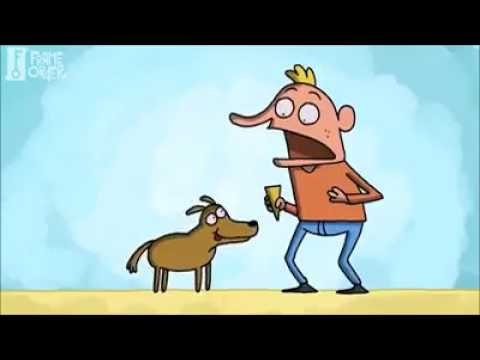

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('EsceiAe1B6w')

Can use later as a 
Reference : https://colab.research.google.com/drive/1l09j_Yv3H016EqHyrJUe_0mNah1M80qf


Some good articles:
Simple code to ope drive files in colab
https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674

STREAM SELECTION                                                 
       By default, ffmpeg includes only one stream of each type  
       (video, audio, subtitle) present in the input files and   
       adds them to each output file.  It picks the "best" of    
       each based upon the following criteria: for video, it is  
       the stream with the highest resolution, for audio, it is  
       the stream with the most channels, for subtitles, it is   
       the first subtitle stream. In the case where several      
       streams of the same type rate equally, the stream with the
       lowest index is chosen.

r_frame_rate is "the lowest framerate with which all timestamps can be represented accurately (it is the least common multiple of all framerates in the stream)."

avg_frame_rate is just that: total duration / total # of frames

You can just specify -r 30000/1001 to maintain the average rate (near-abouts). You don't specify which format you're outputting to, but for MP4, ffmpeg defaults to constant-frame rate, where it picks r_frame_rate as the value. It will then duplicate or drop frames to keep that rate. Use -vsync vfr to keep the variable rate.

https://stackoverflow.com/questions/42798634/extracting-keyframes-python-opencv

In [ ]:
import cv2
import numpy as np

video_path = "/Users/anmoluppal/Downloads/SampleVideo_1280x720_1mb.mp4"
p_frame_thresh = 300000 # You may need to adjust this threshold

cap = cv2.VideoCapture(video_path)
# Read the first frame.
ret, prev_frame = cap.read()

while ret:
    ret, curr_frame = cap.read()

    if ret:
        diff = cv2.absdiff(curr_frame, prev_frame)
        non_zero_count = np.count_nonzero(diff)
        if non_zero_count > p_frame_thresh:
            print "Got P-Frame"
        prev_frame = curr_frame

#Text preprocessing


In [ ]:
import pandas as pd


In [ ]:
def load_csv(file_name):
  drive_path=Path("/content/drive/My Drive")
  corpus_file=drive_path.joinpath(file_name)
  if(corpus_file.is_file()):
    corpus_df=pd.read_csv(str(corpus_file))
  else:
    uploaded=files.upload()
    corpus_df=pd.read_csv(io.BytesIO(uploaded[file_name]))
    corpus_df.to_csv(corpus_file)
  return corpus_df

In [ ]:
annotations=load_csv('video_corpus.csv')

In [ ]:
english_ants=annotations[annotations['Language']=='English']
english_ants=english_ants.drop(columns='Unnamed: 0')

In [ ]:
cols = ['VideoID', 'Start', 'End']
print(english_ants.groupby(by=cols)['Description'].count()) #Total number of corpus text for each video chunk
print(english_ants.groupby(by='VideoID')['Description'].count() )

VideoID      Start  End
-4wsuPCjDBc  5      15     29
-7KMZQEsJW4  205    208    42
-8rBYNP0UKM  50     82     52
             194    201    56
-8y1Q0rA3n8  95     102    27
                           ..
zulPFoY64wE  26     33     34
zv2RIbUsnSw  159    162    25
             335    341    28
zxB4dFJhHR8  1      9      53
zzit5b_-ukg  5      20     41
Name: Description, Length: 2088, dtype: int64
VideoID
-4wsuPCjDBc     29
-7KMZQEsJW4     42
-8rBYNP0UKM    108
-8y1Q0rA3n8     59
-9CUm-2cui8     28
              ... 
zuYZ5kPatJE     45
zulPFoY64wE     34
zv2RIbUsnSw     53
zxB4dFJhHR8     53
zzit5b_-ukg     41
Name: Description, Length: 1586, dtype: int64


In [ ]:
def merge_rows(cols,df):
  df=df.assign(AnnotationID=df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1))
  return df

In [ ]:
english_ants=merge_rows(cols,english_ants)
corpusVideoIds=english_ants['AnnotationID'].unique()
len(corpusVideoIds)

2088